# Capstone Project 2: Model building

We have cleaned the data. Now it is the time to build models.

We will test different modeling methods and compare them.

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.
The modeling method can be logistic regression, random forest, gradient boosting, and SVM...
And compare them and pick the best performance one for prediction

In [76]:
!pip install xgboost

### STEP1: Load the tools

In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
#from xgboost import XBGRegressor
from sklearn.linear_model import ElasticNet
import lightgbm as lgb
from catboost import CatBoostRegressor


import pickle

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the dataset

In [78]:
# load the data for training validate and the model
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [79]:
X_train = X_train.drop(columns=['Unnamed: 0']).values
X_test = X_test.drop(columns=['Unnamed: 0']).values

In [80]:
y_train = y_train.drop(columns=['Unnamed: 0']).values
y_test = y_test.drop(columns=['Unnamed: 0']).values

### STEP5: Modeling

In [81]:
### this dictionary will be used to save all the RMSE scores of using different regression method.
score = {}

#### 5.1 Logistic regression

In [82]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [83]:
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.6861941384072454
MSE score is 1607625937.1583333
RMSE score is 40095.21090053441


In [84]:
score['logistic'] = RMSE
print (score)

{'logistic': 40095.21090053441}


#### 5.2 Ridge regression

##### For the Ridge method, alpha is a parameter needed to be tuned. I am using the GridSearch method to find the best alpha for this modeling

In [85]:
rr = Ridge()
param = {'alpha': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 8, 10, 15, 20]}
rr_cv = GridSearchCV(rr, param, cv=5)
rr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 8, 10, 15,
                                   20]})

In [86]:
print("Best Score:" + str(rr_cv.best_score_))
print("Best Parameters: " + str(rr_cv.best_params_))

Best Score:0.8596310495142314
Best Parameters: {'alpha': 15}


In [87]:
y_pred = rr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8062513475239872
MSE score is 992573425.5854505
RMSE score is 31505.13332118197


In [88]:
score['ridge'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197}


#### 5.3 Lasso regression

In [89]:
lr = Lasso()
param = {'alpha': 600+10*np.arange(10)}
lr_cv = GridSearchCV(lr, param, cv=5)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([600, 610, 620, 630, 640, 650, 660, 670, 680, 690])})

##### I tuned the alpha parameter to get the best socre.

In [90]:
print("Best Score:" + str(lr_cv.best_score_))
print("Best Parameters: " + str(lr_cv.best_params_))

Best Score:0.8622923855972326
Best Parameters: {'alpha': 690}


In [91]:
y_pred = lr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8069771170853558
MSE score is 988855311.5727483
RMSE score is 31446.069890731153


In [92]:
score['lasso'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153}


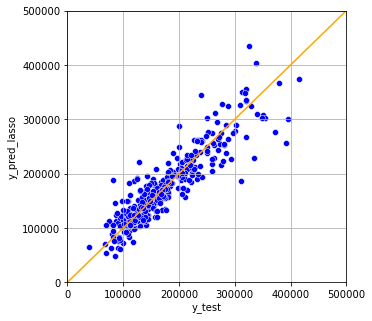

In [93]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred, color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

#### From the above plot, we can see the prediction results is pretty good. 

#### 5.4. SVR

In [94]:
svr = SVR()
params = {'C': 200000+50000*(1+np.arange(10)), 'epsilon': 200*(1+np.arange(10))}
svr_cv = GridSearchCV(svr, params, cv=5)
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000,
       650000, 700000]),
                         'epsilon': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])})

In [95]:
print("Best Score:" + str(svr_cv.best_score_))
print("Best Parameters: " + str(svr_cv.best_params_))

Best Score:0.7898382929517856
Best Parameters: {'C': 300000, 'epsilon': 2000}


In [96]:
y_pred = svr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8047774778686757
MSE score is 1000124052.8230784
RMSE score is 31624.737988212302


In [97]:
score['svr'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153, 'svr': 31624.737988212302}


#### 5.5. Random Forest

In [98]:
rfr = RandomForestRegressor()
params = {'n_estimators': 650+ 10*(1+np.arange(10))}
rfr_cv = GridSearchCV(rfr, params, cv=5)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': array([660, 670, 680, 690, 700, 710, 720, 730, 740, 750])})

In [99]:
print("Best Score:" + str(rfr_cv.best_score_))
print("Best Parameters: " + str(rfr_cv.best_params_))

Best Score:0.8528498331015569
Best Parameters: {'n_estimators': 690}


In [100]:
y_pred = rfr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8407173358297348
MSE score is 816004331.3407335
RMSE score is 28565.789527697874


In [101]:
score['random_forest'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153, 'svr': 31624.737988212302, 'random_forest': 28565.789527697874}


#### 5.6 XGBoost

In [102]:
xgbr = xgboost.XGBRegressor(objective='reg:linear')
params = {'n_estimators': 10*(1+np.arange(10))}
xgbr_cv = GridSearchCV(xgbr, params, cv=5)
xgbr_cv.fit(X_train, y_train)

[01:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:17

[01:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [103]:
print("Best Score:" + str(xgbr_cv.best_score_))
print("Best Parameters: " + str(xgbr_cv.best_params_))

Best Score:0.8373544847881748
Best Parameters: {'n_estimators': 30}


In [104]:
y_pred = xgbr_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8210094541733863
MSE score is 916967715.3781862
RMSE score is 30281.47478869195


In [105]:
score['xgboost'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153, 'svr': 31624.737988212302, 'random_forest': 28565.789527697874, 'xgboost': 30281.47478869195}


##### Next we are goign to test another way of using XGBoost. Firstly we need to convert the data to dmatrix by xgboost.DMatrix

In [106]:
# convert the train and test data to dmatrix
train_dmatrix = xgboost.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgboost.DMatrix(data=X_test, label=y_test)

param = {'booster': 'gblinear', 'objective': 'reg:linear'}

xg_score=[]
for i in range(1, 10):
    xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=i)
    y_pred = xgb_r.predict(test_dmatrix)
    #R2 = r2_score(y_test, y_pred)
    #MSE = mean_squared_error(y_test, y_pred, squared=True)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    xg_score.append(RMSE)    
    
print(xg_score)
    
#print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

[01:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:17

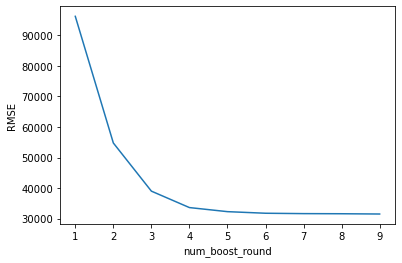

In [107]:
plt.plot(np.arange(1, 10), xg_score)
plt.xlabel('num_boost_round')
plt.ylabel('RMSE')
plt.show()

The best 'num_boost_round' is 5

In [129]:
xgb_r = xgboost.train(params=param, dtrain=train_dmatrix, num_boost_round=6)
y_pred = xgb_r.predict(test_dmatrix)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

[01:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 score is 0.7998419176860398
MSE score is 1025408904.175882
RMSE score is 32022.006560736976


In [130]:
score['xgboost_dmatrix'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153, 'svr': 31624.737988212302, 'random_forest': 28565.789527697874, 'xgboost': 30281.47478869195, 'xgboost_dmatrix': 32022.006560736976, 'ElasticNet': 31458.44135469616, 'lightgbm': 29007.808763559166, 'catboost': 27732.309267803448}


### 5.7 ElasticNet

In [110]:
en = ElasticNet()
params = {'alpha': [650, 700, 750], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}
en_cv = GridSearchCV(en, params, cv=5)
en_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [650, 700, 750],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]})

###### The best l1_ratio is 1. So l2 norm is used for the penalty term. I guess it should be similar as Ridge method. 

In [111]:
print("Best Score:" + str(en_cv.best_score_))
print("Best Parameters: " + str(en_cv.best_params_))

Best Score:0.8623312933055785
Best Parameters: {'alpha': 750, 'l1_ratio': 1}


In [112]:
y_pred = en_cv.predict(X_test)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.8068252096841745
MSE score is 989633532.4668574
RMSE score is 31458.44135469616


In [113]:
score['ElasticNet'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153, 'svr': 31624.737988212302, 'random_forest': 28565.789527697874, 'xgboost': 30281.47478869195, 'xgboost_dmatrix': 32341.399814392407, 'ElasticNet': 31458.44135469616}


#### 5.8 LightGBM

In [114]:
# specify your configurations as a dict

params1={
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'verbose': 0,
    "max_depth": -1,
    "n_estimators": 100000,
    'learning_rate': 0.01 # [0.01, 0.03, 0.05]
}

params = {  
    'reg_alpha': [100000]
}

In [115]:
gbm = lgb.LGBMRegressor(**params1)
gbm_cv = GridSearchCV(gbm, params, cv=5)
gbm_cv.fit(X_train, y_train, 
       eval_set=[(X_test, y_test)],
       eval_metric='l1',
       early_stopping_rounds=1000)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l1: 55112.1	valid_0's l2: 5.05544e+09
Training until validation scores don't improve for 1000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l1: 54682.9	valid_0's l2: 4.98139e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l1: 54258.1	valid_0's l2: 4.90884e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l1: 53844.5	valid_0's l2: 4.83908e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l1: 53428	valid_0's l2: 4.76942e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l1: 53023.6	valid_0's l2: 4.70249e+09
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	valid_0's l1: 31998.4	valid_0's l2: 1.95215e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	valid_0's l1: 31817	valid_0's l2: 1.93464e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	valid_0's l1: 31653.7	valid_0's l2: 1.91844e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	valid_0's l1: 31484.5	valid_0's l2: 1.90272e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 31328.8	valid_0's l2: 1.88672e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's l1: 31164.8	valid_0's l2: 1.87168e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's l1: 31003.3	valid_0's l2: 1.85691e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's l1: 30854.2	vali

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's l1: 24441.1	valid_0's l2: 1.2489e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[151]	valid_0's l1: 24371.9	valid_0's l2: 1.24346e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[152]	valid_0's l1: 24299.6	valid_0's l2: 1.23633e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[153]	valid_0's l1: 24231.1	valid_0's l2: 1.23107e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[154]	valid_0's l1: 24153.2	valid_0's l2: 1.2241e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	valid_0's l1: 24089.2	valid_0's l2: 1.21901e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	valid_0's l1: 24019.5	valid_0's l2: 1.21225e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[157]	valid_0's l1: 2395

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[221]	valid_0's l1: 21273.9	valid_0's l2: 9.7733e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[222]	valid_0's l1: 21245.7	valid_0's l2: 9.74862e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[223]	valid_0's l1: 21223.5	valid_0's l2: 9.73006e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[224]	valid_0's l1: 21195.9	valid_0's l2: 9.70626e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[225]	valid_0's l1: 21180	valid_0's l2: 9.69267e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	valid_0's l1: 21152.4	valid_0's l2: 9.66963e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[227]	valid_0's l1: 21139.4	valid_0's l2: 9.65728e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[228]	valid_0's l1: 21118

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[317]	valid_0's l1: 20167	valid_0's l2: 8.69494e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[318]	valid_0's l1: 20165.4	valid_0's l2: 8.6941e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[319]	valid_0's l1: 20163.6	valid_0's l2: 8.68803e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	valid_0's l1: 20156.7	valid_0's l2: 8.68174e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[321]	valid_0's l1: 20156.8	valid_0's l2: 8.68043e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[322]	valid_0's l1: 20147.9	valid_0's l2: 8.66893e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[323]	valid_0's l1: 20146.6	valid_0's l2: 8.66724e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[324]	valid_0's l1: 20143

[407]	valid_0's l1: 20101.3	valid_0's l2: 8.34456e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[408]	valid_0's l1: 20102.7	valid_0's l2: 8.34021e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[409]	valid_0's l1: 20098.6	valid_0's l2: 8.33459e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[410]	valid_0's l1: 20101.7	valid_0's l2: 8.33598e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[411]	valid_0's l1: 20097.9	valid_0's l2: 8.33035e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[412]	valid_0's l1: 20102.7	valid_0's l2: 8.33187e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[413]	valid_0's l1: 20100.6	valid_0's l2: 8.32704e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[414]	valid_0's l1: 20102.6	valid_0's l2: 8.3274e+08
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[504]	valid_0's l1: 20114.7	valid_0's l2: 8.20466e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[505]	valid_0's l1: 20113.8	valid_0's l2: 8.20339e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[506]	valid_0's l1: 20118.9	valid_0's l2: 8.20642e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[507]	valid_0's l1: 20117.2	valid_0's l2: 8.20428e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[508]	valid_0's l1: 20121.8	valid_0's l2: 8.20728e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[509]	valid_0's l1: 20117.4	valid_0's l2: 8.20441e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[510]	valid_0's l1: 20117.2	valid_0's l2: 8.20293e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[511]	valid_0's l1: 20

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[591]	valid_0's l1: 20065.1	valid_0's l2: 8.13253e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[592]	valid_0's l1: 20070.3	valid_0's l2: 8.13535e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[593]	valid_0's l1: 20067.2	valid_0's l2: 8.13262e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[594]	valid_0's l1: 20063.7	valid_0's l2: 8.13041e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[595]	valid_0's l1: 20067.7	valid_0's l2: 8.13226e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[596]	valid_0's l1: 20064.7	valid_0's l2: 8.12958e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[597]	valid_0's l1: 20069.8	valid_0's l2: 8.13236e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[598]	valid_0's l1: 20

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[682]	valid_0's l1: 20135.2	valid_0's l2: 8.10576e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[683]	valid_0's l1: 20132.4	valid_0's l2: 8.10355e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[684]	valid_0's l1: 20133.3	valid_0's l2: 8.1029e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[685]	valid_0's l1: 20135.9	valid_0's l2: 8.10425e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[686]	valid_0's l1: 20138.5	valid_0's l2: 8.10457e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[687]	valid_0's l1: 20140.7	valid_0's l2: 8.10549e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[688]	valid_0's l1: 20141.6	valid_0's l2: 8.10543e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[689]	valid_0's l1: 201

[782]	valid_0's l1: 20251.3	valid_0's l2: 8.10429e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[783]	valid_0's l1: 20253.1	valid_0's l2: 8.10568e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[784]	valid_0's l1: 20253.8	valid_0's l2: 8.10582e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[785]	valid_0's l1: 20254.6	valid_0's l2: 8.10644e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[786]	valid_0's l1: 20255.7	valid_0's l2: 8.1057e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[787]	valid_0's l1: 20256.9	valid_0's l2: 8.10695e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[788]	valid_0's l1: 20257.2	valid_0's l2: 8.10647e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[789]	valid_0's l1: 20258.6	valid_0's l2: 8.10773e+08
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[881]	valid_0's l1: 20291.1	valid_0's l2: 8.09937e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[882]	valid_0's l1: 20290.4	valid_0's l2: 8.09899e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[883]	valid_0's l1: 20289.8	valid_0's l2: 8.09862e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[884]	valid_0's l1: 20291.8	valid_0's l2: 8.1002e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[885]	valid_0's l1: 20292.5	valid_0's l2: 8.10057e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[886]	valid_0's l1: 20293.1	valid_0's l2: 8.10038e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[887]	valid_0's l1: 20291.6	valid_0's l2: 8.09963e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[888]	valid_0's l1: 202

[978]	valid_0's l1: 20421.6	valid_0's l2: 8.15473e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[979]	valid_0's l1: 20425.4	valid_0's l2: 8.1564e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[980]	valid_0's l1: 20426.1	valid_0's l2: 8.15706e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[981]	valid_0's l1: 20425.6	valid_0's l2: 8.15654e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[982]	valid_0's l1: 20425.7	valid_0's l2: 8.15619e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[983]	valid_0's l1: 20429.5	valid_0's l2: 8.15785e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[984]	valid_0's l1: 20429.2	valid_0's l2: 8.15702e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[985]	valid_0's l1: 20428.8	valid_0's l2: 8.15707e+08
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1073]	valid_0's l1: 20453.5	valid_0's l2: 8.19595e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1074]	valid_0's l1: 20452.6	valid_0's l2: 8.19571e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1075]	valid_0's l1: 20454.2	valid_0's l2: 8.19763e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1076]	valid_0's l1: 20454.7	valid_0's l2: 8.19819e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1077]	valid_0's l1: 20454.4	valid_0's l2: 8.19798e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1078]	valid_0's l1: 20455.6	valid_0's l2: 8.19825e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1079]	valid_0's l1: 20454.9	valid_0's l2: 8.19848e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1080]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1169]	valid_0's l1: 20494.2	valid_0's l2: 8.23182e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1170]	valid_0's l1: 20494.2	valid_0's l2: 8.23132e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1171]	valid_0's l1: 20494.9	valid_0's l2: 8.23184e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1172]	valid_0's l1: 20495.5	valid_0's l2: 8.23236e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1173]	valid_0's l1: 20495.7	valid_0's l2: 8.23194e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1174]	valid_0's l1: 20497	valid_0's l2: 8.23235e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1175]	valid_0's l1: 20497.1	valid_0's l2: 8.23255e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1176]	valid_0's 

[1269]	valid_0's l1: 20549.8	valid_0's l2: 8.27261e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1270]	valid_0's l1: 20548.7	valid_0's l2: 8.27172e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1271]	valid_0's l1: 20549.9	valid_0's l2: 8.27333e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1272]	valid_0's l1: 20549.9	valid_0's l2: 8.27332e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1273]	valid_0's l1: 20551.3	valid_0's l2: 8.27503e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1274]	valid_0's l1: 20551.4	valid_0's l2: 8.27513e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1275]	valid_0's l1: 20553	valid_0's l2: 8.27603e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1276]	valid_0's l1: 20553.7	valid_0's l2: 8.27623e+08
[LightGBM] [Warning] No further split

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l1: 54798.5	valid_0's l2: 5.0495e+09
Training until validation scores don't improve for 1000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l1: 54368.2	valid_0's l2: 4.97591e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l1: 53937	valid_0's l2: 4.90202e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l1: 53520.9	valid_0's l2: 4.83137e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l1: 53098.9	valid_0's l2: 4.7603e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l1: 52681.1	valid_0's l2: 4.69065e+09
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 30318.5	valid_0's l2: 1.77296e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's l1: 30155.3	valid_0's l2: 1.75696e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's l1: 30002	valid_0's l2: 1.74248e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's l1: 29851.4	valid_0's l2: 1.7272e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's l1: 29703.6	valid_0's l2: 1.71302e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's l1: 29562.3	valid_0's l2: 1.69925e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	valid_0's l1: 29415.3	valid_0's l2: 1.68468e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's l1: 29271.7	valid

[167]	valid_0's l1: 23569.6	valid_0's l2: 1.13962e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[168]	valid_0's l1: 23526.8	valid_0's l2: 1.13506e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[169]	valid_0's l1: 23489.6	valid_0's l2: 1.13175e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	valid_0's l1: 23448.6	valid_0's l2: 1.12739e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[171]	valid_0's l1: 23411.3	valid_0's l2: 1.12409e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[172]	valid_0's l1: 23373.4	valid_0's l2: 1.12015e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[173]	valid_0's l1: 23331.7	valid_0's l2: 1.11633e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	valid_0's l1: 23300.8	valid_0's l2: 1.11339e+09
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[255]	valid_0's l1: 21638.2	valid_0's l2: 9.58435e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[256]	valid_0's l1: 21630.5	valid_0's l2: 9.57564e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[257]	valid_0's l1: 21620.8	valid_0's l2: 9.5673e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[258]	valid_0's l1: 21611.7	valid_0's l2: 9.55856e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[259]	valid_0's l1: 21602	valid_0's l2: 9.54884e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[260]	valid_0's l1: 21595	valid_0's l2: 9.54119e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's l1: 21586.4	valid_0's l2: 9.53295e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[262]	valid_0's l1: 21577.9

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[335]	valid_0's l1: 21169.7	valid_0's l2: 9.08957e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[336]	valid_0's l1: 21170	valid_0's l2: 9.08866e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[337]	valid_0's l1: 21163.6	valid_0's l2: 9.0835e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[338]	valid_0's l1: 21164.6	valid_0's l2: 9.0816e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[339]	valid_0's l1: 21158.1	valid_0's l2: 9.07742e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[340]	valid_0's l1: 21158.8	valid_0's l2: 9.07542e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[341]	valid_0's l1: 21155.8	valid_0's l2: 9.07405e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[342]	valid_0's l1: 21150.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[416]	valid_0's l1: 21089.5	valid_0's l2: 8.88281e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[417]	valid_0's l1: 21088	valid_0's l2: 8.88216e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[418]	valid_0's l1: 21095.4	valid_0's l2: 8.88339e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[419]	valid_0's l1: 21093.9	valid_0's l2: 8.88185e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[420]	valid_0's l1: 21096.1	valid_0's l2: 8.87857e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[421]	valid_0's l1: 21103.4	valid_0's l2: 8.87984e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[422]	valid_0's l1: 21101.5	valid_0's l2: 8.87843e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[423]	valid_0's l1: 2109

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[488]	valid_0's l1: 21194.7	valid_0's l2: 8.84227e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[489]	valid_0's l1: 21201.3	valid_0's l2: 8.84555e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[490]	valid_0's l1: 21201.7	valid_0's l2: 8.84361e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[491]	valid_0's l1: 21206.7	valid_0's l2: 8.84614e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[492]	valid_0's l1: 21205.3	valid_0's l2: 8.8459e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[493]	valid_0's l1: 21204.5	valid_0's l2: 8.8432e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[494]	valid_0's l1: 21209.7	valid_0's l2: 8.84574e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[495]	valid_0's l1: 2120

[563]	valid_0's l1: 21281.5	valid_0's l2: 8.8646e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[564]	valid_0's l1: 21284.9	valid_0's l2: 8.86669e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's l1: 21286.7	valid_0's l2: 8.86873e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's l1: 21287.6	valid_0's l2: 8.86803e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[567]	valid_0's l1: 21289	valid_0's l2: 8.8696e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's l1: 21287.1	valid_0's l2: 8.86778e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[569]	valid_0's l1: 21287.5	valid_0's l2: 8.86895e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[570]	valid_0's l1: 21286.3	valid_0's l2: 8.86742e+08
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[629]	valid_0's l1: 21309	valid_0's l2: 8.86416e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[630]	valid_0's l1: 21314.2	valid_0's l2: 8.86668e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[631]	valid_0's l1: 21313.8	valid_0's l2: 8.86543e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[632]	valid_0's l1: 21316.8	valid_0's l2: 8.86757e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[633]	valid_0's l1: 21316.4	valid_0's l2: 8.86633e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[634]	valid_0's l1: 21315.1	valid_0's l2: 8.86386e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[635]	valid_0's l1: 21318	valid_0's l2: 8.86601e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[636]	valid_0's l1: 21317.

[707]	valid_0's l1: 21423.4	valid_0's l2: 8.89784e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[708]	valid_0's l1: 21424.1	valid_0's l2: 8.89696e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[709]	valid_0's l1: 21425.6	valid_0's l2: 8.89883e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[710]	valid_0's l1: 21424.9	valid_0's l2: 8.89656e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[711]	valid_0's l1: 21425.8	valid_0's l2: 8.89731e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[712]	valid_0's l1: 21424.3	valid_0's l2: 8.89545e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[713]	valid_0's l1: 21425.7	valid_0's l2: 8.89731e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[714]	valid_0's l1: 21431.4	valid_0's l2: 8.90025e+08
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[799]	valid_0's l1: 21561.1	valid_0's l2: 8.94191e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	valid_0's l1: 21562.7	valid_0's l2: 8.94288e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[801]	valid_0's l1: 21563	valid_0's l2: 8.94215e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[802]	valid_0's l1: 21566.9	valid_0's l2: 8.94511e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[803]	valid_0's l1: 21567.3	valid_0's l2: 8.94466e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[804]	valid_0's l1: 21569	valid_0's l2: 8.94647e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[805]	valid_0's l1: 21570.2	valid_0's l2: 8.94616e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[806]	valid_0's l1: 21570.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[863]	valid_0's l1: 21626.2	valid_0's l2: 8.97741e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[864]	valid_0's l1: 21626.9	valid_0's l2: 8.9772e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[865]	valid_0's l1: 21628.8	valid_0's l2: 8.97888e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[866]	valid_0's l1: 21630.1	valid_0's l2: 8.9794e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[867]	valid_0's l1: 21631.1	valid_0's l2: 8.97911e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[868]	valid_0's l1: 21634	valid_0's l2: 8.98142e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[869]	valid_0's l1: 21633.6	valid_0's l2: 8.9802e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[870]	valid_0's l1: 21635.5

[957]	valid_0's l1: 21720.7	valid_0's l2: 9.0278e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[958]	valid_0's l1: 21722.7	valid_0's l2: 9.02916e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[959]	valid_0's l1: 21723	valid_0's l2: 9.02923e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[960]	valid_0's l1: 21723.3	valid_0's l2: 9.02949e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[961]	valid_0's l1: 21726.2	valid_0's l2: 9.0316e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[962]	valid_0's l1: 21727	valid_0's l2: 9.03351e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[963]	valid_0's l1: 21727.4	valid_0's l2: 9.03363e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[964]	valid_0's l1: 21729.4	valid_0's l2: 9.03501e+08
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1057]	valid_0's l1: 21776	valid_0's l2: 9.06812e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1058]	valid_0's l1: 21778.2	valid_0's l2: 9.07012e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1059]	valid_0's l1: 21777.1	valid_0's l2: 9.06954e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1060]	valid_0's l1: 21776.5	valid_0's l2: 9.06869e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1061]	valid_0's l1: 21778.6	valid_0's l2: 9.07118e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1062]	valid_0's l1: 21780.8	valid_0's l2: 9.07317e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1063]	valid_0's l1: 21781.8	valid_0's l2: 9.07369e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1064]	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1154]	valid_0's l1: 21838.6	valid_0's l2: 9.10612e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1155]	valid_0's l1: 21841.3	valid_0's l2: 9.10875e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1156]	valid_0's l1: 21841.7	valid_0's l2: 9.10906e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1157]	valid_0's l1: 21841.6	valid_0's l2: 9.1088e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1158]	valid_0's l1: 21844.3	valid_0's l2: 9.11143e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1159]	valid_0's l1: 21843.7	valid_0's l2: 9.11148e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1160]	valid_0's l1: 21841.8	valid_0's l2: 9.10991e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1161]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1257]	valid_0's l1: 21902.7	valid_0's l2: 9.14983e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1258]	valid_0's l1: 21901.9	valid_0's l2: 9.14961e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1259]	valid_0's l1: 21901.7	valid_0's l2: 9.1486e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1260]	valid_0's l1: 21904	valid_0's l2: 9.15082e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1261]	valid_0's l1: 21903.9	valid_0's l2: 9.15032e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1262]	valid_0's l1: 21906.2	valid_0's l2: 9.15255e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1263]	valid_0's l1: 21906.4	valid_0's l2: 9.15258e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1264]	valid_0's l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1356]	valid_0's l1: 21952.9	valid_0's l2: 9.19754e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1357]	valid_0's l1: 21952.3	valid_0's l2: 9.19732e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1358]	valid_0's l1: 21954.4	valid_0's l2: 9.19934e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1359]	valid_0's l1: 21955	valid_0's l2: 9.19969e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1360]	valid_0's l1: 21953.4	valid_0's l2: 9.19719e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1361]	valid_0's l1: 21955.1	valid_0's l2: 9.199e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1362]	valid_0's l1: 21955.4	valid_0's l2: 9.19946e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1363]	valid_0's l1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[18]	valid_0's l1: 48768.9	valid_0's l2: 3.99584e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[19]	valid_0's l1: 48410.9	valid_0's l2: 3.9403e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l1: 48054.9	valid_0's l2: 3.88896e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[21]	valid_0's l1: 47705.7	valid_0's l2: 3.83542e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[22]	valid_0's l1: 47349.4	valid_0's l2: 3.78119e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[23]	valid_0's l1: 46985.1	valid_0's l2: 3.72835e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[24]	valid_0's l1: 46648.6	valid_0's l2: 3.67753e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[25]	valid_0's l1: 46290.6	val

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[112]	valid_0's l1: 27513.4	valid_0's l2: 1.5221e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[113]	valid_0's l1: 27387.9	valid_0's l2: 1.51014e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	valid_0's l1: 27258.8	valid_0's l2: 1.50059e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	valid_0's l1: 27138	valid_0's l2: 1.49151e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	valid_0's l1: 27018.7	valid_0's l2: 1.4802e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	valid_0's l1: 26905.5	valid_0's l2: 1.47146e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's l1: 26794.9	valid_0's l2: 1.46332e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's l1: 26691.

[210]	valid_0's l1: 22095.4	valid_0's l2: 1.04493e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[211]	valid_0's l1: 22070.3	valid_0's l2: 1.04252e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[212]	valid_0's l1: 22045.2	valid_0's l2: 1.0406e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[213]	valid_0's l1: 22032.2	valid_0's l2: 1.03957e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[214]	valid_0's l1: 21994.3	valid_0's l2: 1.03673e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[215]	valid_0's l1: 21971.2	valid_0's l2: 1.03485e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[216]	valid_0's l1: 21957.3	valid_0's l2: 1.03375e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[217]	valid_0's l1: 21919.1	valid_0's l2: 1.03097e+09
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[310]	valid_0's l1: 20805.3	valid_0's l2: 9.45371e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[311]	valid_0's l1: 20796.5	valid_0's l2: 9.44548e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[312]	valid_0's l1: 20797.4	valid_0's l2: 9.44604e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[313]	valid_0's l1: 20795	valid_0's l2: 9.4448e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[314]	valid_0's l1: 20787.1	valid_0's l2: 9.43671e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[315]	valid_0's l1: 20786.7	valid_0's l2: 9.43676e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[316]	valid_0's l1: 20784.7	valid_0's l2: 9.42922e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[317]	valid_0's l1: 20782

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[406]	valid_0's l1: 20644.6	valid_0's l2: 9.24357e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[407]	valid_0's l1: 20647.8	valid_0's l2: 9.24759e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[408]	valid_0's l1: 20644.5	valid_0's l2: 9.24352e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[409]	valid_0's l1: 20650.6	valid_0's l2: 9.24302e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[410]	valid_0's l1: 20649.9	valid_0's l2: 9.23918e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[411]	valid_0's l1: 20653.5	valid_0's l2: 9.24346e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[412]	valid_0's l1: 20651.3	valid_0's l2: 9.23921e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[413]	valid_0's l1: 20

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[499]	valid_0's l1: 20705.2	valid_0's l2: 9.15722e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's l1: 20706.3	valid_0's l2: 9.15995e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[501]	valid_0's l1: 20705.5	valid_0's l2: 9.15704e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[502]	valid_0's l1: 20703.4	valid_0's l2: 9.15235e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[503]	valid_0's l1: 20706.8	valid_0's l2: 9.15594e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[504]	valid_0's l1: 20705.9	valid_0's l2: 9.15306e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[505]	valid_0's l1: 20706	valid_0's l2: 9.15354e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[506]	valid_0's l1: 2070

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[594]	valid_0's l1: 20775.5	valid_0's l2: 9.12701e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[595]	valid_0's l1: 20779.6	valid_0's l2: 9.13035e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[596]	valid_0's l1: 20778.8	valid_0's l2: 9.12823e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[597]	valid_0's l1: 20779.9	valid_0's l2: 9.12976e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[598]	valid_0's l1: 20780	valid_0's l2: 9.12617e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[599]	valid_0's l1: 20784.1	valid_0's l2: 9.13006e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	valid_0's l1: 20783.8	valid_0's l2: 9.12929e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[601]	valid_0's l1: 2078

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[685]	valid_0's l1: 20875.7	valid_0's l2: 9.16666e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[686]	valid_0's l1: 20873.4	valid_0's l2: 9.16472e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[687]	valid_0's l1: 20872.9	valid_0's l2: 9.16099e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[688]	valid_0's l1: 20874.5	valid_0's l2: 9.16372e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[689]	valid_0's l1: 20874.1	valid_0's l2: 9.16258e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[690]	valid_0's l1: 20876.3	valid_0's l2: 9.16475e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[691]	valid_0's l1: 20875	valid_0's l2: 9.16037e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[692]	valid_0's l1: 2087

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[778]	valid_0's l1: 20967.8	valid_0's l2: 9.17854e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[779]	valid_0's l1: 20972.7	valid_0's l2: 9.18268e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[780]	valid_0's l1: 20971.6	valid_0's l2: 9.18157e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[781]	valid_0's l1: 20972.3	valid_0's l2: 9.17944e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[782]	valid_0's l1: 20975	valid_0's l2: 9.18122e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[783]	valid_0's l1: 20978.5	valid_0's l2: 9.18445e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[784]	valid_0's l1: 20977.7	valid_0's l2: 9.18184e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[785]	valid_0's l1: 2098

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[873]	valid_0's l1: 21075.1	valid_0's l2: 9.19293e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[874]	valid_0's l1: 21077.1	valid_0's l2: 9.19423e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[875]	valid_0's l1: 21081.3	valid_0's l2: 9.1978e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[876]	valid_0's l1: 21080.5	valid_0's l2: 9.19708e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[877]	valid_0's l1: 21082.6	valid_0's l2: 9.19693e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[878]	valid_0's l1: 21080.9	valid_0's l2: 9.19586e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[879]	valid_0's l1: 21080.4	valid_0's l2: 9.19356e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[880]	valid_0's l1: 210

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[974]	valid_0's l1: 21156.2	valid_0's l2: 9.16621e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[975]	valid_0's l1: 21155.1	valid_0's l2: 9.16527e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[976]	valid_0's l1: 21153.6	valid_0's l2: 9.16256e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[977]	valid_0's l1: 21156.3	valid_0's l2: 9.1643e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[978]	valid_0's l1: 21155.6	valid_0's l2: 9.16345e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[979]	valid_0's l1: 21156.5	valid_0's l2: 9.16428e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[980]	valid_0's l1: 21153.7	valid_0's l2: 9.16145e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[981]	valid_0's l1: 211

[1071]	valid_0's l1: 21239.3	valid_0's l2: 9.19022e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1072]	valid_0's l1: 21238.8	valid_0's l2: 9.18865e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1073]	valid_0's l1: 21240.1	valid_0's l2: 9.18942e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1074]	valid_0's l1: 21240.1	valid_0's l2: 9.19032e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1075]	valid_0's l1: 21243	valid_0's l2: 9.19234e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1076]	valid_0's l1: 21242.1	valid_0's l2: 9.19019e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1077]	valid_0's l1: 21243.9	valid_0's l2: 9.19141e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1078]	valid_0's l1: 21242.9	valid_0's l2: 9.19105e+08
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1171]	valid_0's l1: 21306.7	valid_0's l2: 9.22971e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1172]	valid_0's l1: 21307.8	valid_0's l2: 9.23068e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1173]	valid_0's l1: 21309.9	valid_0's l2: 9.23265e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1174]	valid_0's l1: 21310.9	valid_0's l2: 9.2336e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1175]	valid_0's l1: 21312	valid_0's l2: 9.23463e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1176]	valid_0's l1: 21313.2	valid_0's l2: 9.23518e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1177]	valid_0's l1: 21314.3	valid_0's l2: 9.23622e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1178]	valid_0's l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1266]	valid_0's l1: 21366	valid_0's l2: 9.25404e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1267]	valid_0's l1: 21365.8	valid_0's l2: 9.25238e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1268]	valid_0's l1: 21365.7	valid_0's l2: 9.25261e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1269]	valid_0's l1: 21365.6	valid_0's l2: 9.25096e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1270]	valid_0's l1: 21365.5	valid_0's l2: 9.25119e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1271]	valid_0's l1: 21366.1	valid_0's l2: 9.25195e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1272]	valid_0's l1: 21366.6	valid_0's l2: 9.25171e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1273]	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1364]	valid_0's l1: 21411.1	valid_0's l2: 9.26308e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1365]	valid_0's l1: 21411.2	valid_0's l2: 9.26308e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1366]	valid_0's l1: 21411.1	valid_0's l2: 9.26235e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1367]	valid_0's l1: 21411.2	valid_0's l2: 9.26236e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1368]	valid_0's l1: 21410.3	valid_0's l2: 9.26062e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1369]	valid_0's l1: 21410.6	valid_0's l2: 9.26066e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1370]	valid_0's l1: 21411.3	valid_0's l2: 9.26077e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1371]	valid_0'

[45]	valid_0's l1: 40019.5	valid_0's l2: 2.77643e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[46]	valid_0's l1: 39743.6	valid_0's l2: 2.74411e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[47]	valid_0's l1: 39467.3	valid_0's l2: 2.70968e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	valid_0's l1: 39200.1	valid_0's l2: 2.67906e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[49]	valid_0's l1: 38927.7	valid_0's l2: 2.64579e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's l1: 38663.1	valid_0's l2: 2.61632e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	valid_0's l1: 38405	valid_0's l2: 2.58732e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's l1: 38146.9	valid_0's l2: 2.55898e+09
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[129]	valid_0's l1: 25264.5	valid_0's l2: 1.30732e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's l1: 25177.8	valid_0's l2: 1.30047e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[131]	valid_0's l1: 25086.3	valid_0's l2: 1.29349e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[132]	valid_0's l1: 25006.6	valid_0's l2: 1.28708e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[133]	valid_0's l1: 24919.8	valid_0's l2: 1.27998e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[134]	valid_0's l1: 24830.7	valid_0's l2: 1.27328e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[135]	valid_0's l1: 24760.1	valid_0's l2: 1.26715e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[136]	valid_0's l1: 24

[220]	valid_0's l1: 21427.6	valid_0's l2: 9.8424e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[221]	valid_0's l1: 21415.9	valid_0's l2: 9.83447e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[222]	valid_0's l1: 21395.3	valid_0's l2: 9.81636e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[223]	valid_0's l1: 21383.9	valid_0's l2: 9.8082e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[224]	valid_0's l1: 21366	valid_0's l2: 9.78867e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[225]	valid_0's l1: 21352.9	valid_0's l2: 9.78005e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[226]	valid_0's l1: 21335.7	valid_0's l2: 9.76099e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[227]	valid_0's l1: 21314.1	valid_0's l2: 9.74334e+08
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[318]	valid_0's l1: 20685.1	valid_0's l2: 9.17151e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[319]	valid_0's l1: 20678.4	valid_0's l2: 9.16736e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	valid_0's l1: 20679.6	valid_0's l2: 9.16688e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[321]	valid_0's l1: 20681.7	valid_0's l2: 9.1659e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[322]	valid_0's l1: 20681.7	valid_0's l2: 9.16336e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[323]	valid_0's l1: 20675.1	valid_0's l2: 9.15947e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[324]	valid_0's l1: 20674.3	valid_0's l2: 9.15655e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[325]	valid_0's l1: 206

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[414]	valid_0's l1: 20569.3	valid_0's l2: 8.97548e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[415]	valid_0's l1: 20572.1	valid_0's l2: 8.97546e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[416]	valid_0's l1: 20569.9	valid_0's l2: 8.97241e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[417]	valid_0's l1: 20571.6	valid_0's l2: 8.97211e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[418]	valid_0's l1: 20568.6	valid_0's l2: 8.96645e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[419]	valid_0's l1: 20571.6	valid_0's l2: 8.96769e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[420]	valid_0's l1: 20572.3	valid_0's l2: 8.96662e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[421]	valid_0's l1: 20

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[512]	valid_0's l1: 20690.7	valid_0's l2: 8.93125e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[513]	valid_0's l1: 20693.4	valid_0's l2: 8.93298e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[514]	valid_0's l1: 20692.8	valid_0's l2: 8.9298e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[515]	valid_0's l1: 20693.7	valid_0's l2: 8.93012e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[516]	valid_0's l1: 20693.8	valid_0's l2: 8.92839e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[517]	valid_0's l1: 20698.5	valid_0's l2: 8.93065e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[518]	valid_0's l1: 20698.1	valid_0's l2: 8.92928e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[519]	valid_0's l1: 207

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[607]	valid_0's l1: 20810.7	valid_0's l2: 8.98809e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[608]	valid_0's l1: 20811.2	valid_0's l2: 8.98709e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[609]	valid_0's l1: 20811.2	valid_0's l2: 8.98653e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[610]	valid_0's l1: 20815.4	valid_0's l2: 8.98884e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[611]	valid_0's l1: 20816.8	valid_0's l2: 8.98939e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[612]	valid_0's l1: 20819.2	valid_0's l2: 8.99081e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[613]	valid_0's l1: 20819.8	valid_0's l2: 8.98951e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[614]	valid_0's l1: 20

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[699]	valid_0's l1: 20904.6	valid_0's l2: 8.99648e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's l1: 20907.9	valid_0's l2: 8.99796e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[701]	valid_0's l1: 20905	valid_0's l2: 8.99634e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[702]	valid_0's l1: 20908.2	valid_0's l2: 8.99817e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[703]	valid_0's l1: 20906.4	valid_0's l2: 8.99607e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[704]	valid_0's l1: 20903.8	valid_0's l2: 8.99427e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[705]	valid_0's l1: 20906.2	valid_0's l2: 8.9956e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[706]	valid_0's l1: 20907

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[772]	valid_0's l1: 20993.7	valid_0's l2: 9.01946e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[773]	valid_0's l1: 20994.6	valid_0's l2: 9.01952e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[774]	valid_0's l1: 20997.6	valid_0's l2: 9.02187e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[775]	valid_0's l1: 20999.4	valid_0's l2: 9.02169e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[776]	valid_0's l1: 21001.7	valid_0's l2: 9.02305e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[777]	valid_0's l1: 21002.5	valid_0's l2: 9.0229e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[778]	valid_0's l1: 21005.5	valid_0's l2: 9.02429e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[779]	valid_0's l1: 210

[846]	valid_0's l1: 21100.8	valid_0's l2: 9.0664e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[847]	valid_0's l1: 21102.4	valid_0's l2: 9.06786e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[848]	valid_0's l1: 21104.3	valid_0's l2: 9.06908e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[849]	valid_0's l1: 21104.6	valid_0's l2: 9.06843e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[850]	valid_0's l1: 21105.4	valid_0's l2: 9.06868e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[851]	valid_0's l1: 21107.2	valid_0's l2: 9.06978e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[852]	valid_0's l1: 21107.5	valid_0's l2: 9.06911e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[853]	valid_0's l1: 21109.8	valid_0's l2: 9.07076e+08
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[929]	valid_0's l1: 21245.5	valid_0's l2: 9.13882e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[930]	valid_0's l1: 21246	valid_0's l2: 9.13853e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[931]	valid_0's l1: 21246.5	valid_0's l2: 9.13907e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[932]	valid_0's l1: 21247.9	valid_0's l2: 9.14111e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[933]	valid_0's l1: 21249.4	valid_0's l2: 9.14115e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[934]	valid_0's l1: 21250.6	valid_0's l2: 9.14143e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[935]	valid_0's l1: 21255.2	valid_0's l2: 9.14424e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's l1: 2125

[999]	valid_0's l1: 21340.1	valid_0's l2: 9.1784e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1000]	valid_0's l1: 21341.3	valid_0's l2: 9.18042e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1001]	valid_0's l1: 21341.5	valid_0's l2: 9.17905e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1002]	valid_0's l1: 21343.3	valid_0's l2: 9.17927e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1003]	valid_0's l1: 21344.2	valid_0's l2: 9.17956e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1004]	valid_0's l1: 21345.4	valid_0's l2: 9.18158e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1005]	valid_0's l1: 21346.6	valid_0's l2: 9.18196e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1006]	valid_0's l1: 21348	valid_0's l2: 9.18281e+08
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1090]	valid_0's l1: 21425.7	valid_0's l2: 9.22129e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1091]	valid_0's l1: 21424.9	valid_0's l2: 9.21971e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1092]	valid_0's l1: 21425.9	valid_0's l2: 9.21992e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1093]	valid_0's l1: 21428.7	valid_0's l2: 9.22204e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1094]	valid_0's l1: 21429.3	valid_0's l2: 9.22349e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1095]	valid_0's l1: 21430.3	valid_0's l2: 9.22369e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1096]	valid_0's l1: 21429.8	valid_0's l2: 9.22227e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1097]	valid_0'

[1178]	valid_0's l1: 21498.2	valid_0's l2: 9.23383e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1179]	valid_0's l1: 21498.3	valid_0's l2: 9.23295e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1180]	valid_0's l1: 21500.5	valid_0's l2: 9.23308e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1181]	valid_0's l1: 21502	valid_0's l2: 9.2342e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1182]	valid_0's l1: 21502.5	valid_0's l2: 9.2349e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1183]	valid_0's l1: 21502.5	valid_0's l2: 9.23403e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1184]	valid_0's l1: 21502.6	valid_0's l2: 9.23333e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1185]	valid_0's l1: 21503.6	valid_0's l2: 9.23344e+08
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1250]	valid_0's l1: 21551.2	valid_0's l2: 9.23872e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1251]	valid_0's l1: 21550.7	valid_0's l2: 9.23801e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1252]	valid_0's l1: 21550.8	valid_0's l2: 9.23814e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1253]	valid_0's l1: 21553.2	valid_0's l2: 9.23982e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1254]	valid_0's l1: 21552.7	valid_0's l2: 9.23911e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1255]	valid_0's l1: 21552.8	valid_0's l2: 9.23932e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1256]	valid_0's l1: 21552.5	valid_0's l2: 9.23908e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1257]	valid_0'

[1323]	valid_0's l1: 21581.8	valid_0's l2: 9.24902e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1324]	valid_0's l1: 21581.4	valid_0's l2: 9.2485e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1325]	valid_0's l1: 21581.7	valid_0's l2: 9.24925e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1326]	valid_0's l1: 21581.5	valid_0's l2: 9.24883e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1327]	valid_0's l1: 21582.5	valid_0's l2: 9.24956e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1328]	valid_0's l1: 21582.8	valid_0's l2: 9.25002e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1329]	valid_0's l1: 21582.8	valid_0's l2: 9.24963e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1330]	valid_0's l1: 21583.2	valid_0's l2: 9.25047e+08
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1407]	valid_0's l1: 21629.6	valid_0's l2: 9.2668e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1408]	valid_0's l1: 21628.8	valid_0's l2: 9.26588e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1409]	valid_0's l1: 21630.2	valid_0's l2: 9.26639e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1410]	valid_0's l1: 21630.8	valid_0's l2: 9.26644e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1411]	valid_0's l1: 21630.2	valid_0's l2: 9.26559e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1412]	valid_0's l1: 21629.6	valid_0's l2: 9.26475e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1413]	valid_0's l1: 21630.2	valid_0's l2: 9.26528e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1414]	valid_0's

[89]	valid_0's l1: 31140.8	valid_0's l2: 1.84342e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's l1: 30962.7	valid_0's l2: 1.82717e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	valid_0's l1: 30784.9	valid_0's l2: 1.81159e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's l1: 30624.2	valid_0's l2: 1.79543e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	valid_0's l1: 30456.9	valid_0's l2: 1.78013e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's l1: 30294.5	valid_0's l2: 1.76546e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's l1: 30136.7	valid_0's l2: 1.74988e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	valid_0's l1: 29979.5	valid_0's l2: 1.73551e+09
[LightGBM] [Warning] No further splits with positiv

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[178]	valid_0's l1: 22945.1	valid_0's l2: 1.12576e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	valid_0's l1: 22897.4	valid_0's l2: 1.12188e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's l1: 22853.4	valid_0's l2: 1.11761e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	valid_0's l1: 22811.2	valid_0's l2: 1.11388e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[182]	valid_0's l1: 22779.9	valid_0's l2: 1.11092e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	valid_0's l1: 22739.7	valid_0's l2: 1.10687e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[184]	valid_0's l1: 22701.4	valid_0's l2: 1.10333e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[185]	valid_0's l1: 22

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[260]	valid_0's l1: 21072.7	valid_0's l2: 9.50019e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's l1: 21062.2	valid_0's l2: 9.48821e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[262]	valid_0's l1: 21054.1	valid_0's l2: 9.47982e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's l1: 21045.3	valid_0's l2: 9.46867e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[264]	valid_0's l1: 21043	valid_0's l2: 9.46359e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[265]	valid_0's l1: 21032.9	valid_0's l2: 9.45243e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[266]	valid_0's l1: 21026.1	valid_0's l2: 9.44538e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's l1: 2101

[335]	valid_0's l1: 20694.1	valid_0's l2: 9.01518e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[336]	valid_0's l1: 20690	valid_0's l2: 9.01209e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[337]	valid_0's l1: 20691.1	valid_0's l2: 9.01123e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[338]	valid_0's l1: 20686.4	valid_0's l2: 9.00257e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[339]	valid_0's l1: 20683.4	valid_0's l2: 9.00147e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[340]	valid_0's l1: 20676.9	valid_0's l2: 8.99814e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[341]	valid_0's l1: 20675.7	valid_0's l2: 8.99644e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[342]	valid_0's l1: 20679.4	valid_0's l2: 8.99368e+08
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[409]	valid_0's l1: 20555.2	valid_0's l2: 8.77696e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[410]	valid_0's l1: 20554.7	valid_0's l2: 8.77366e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[411]	valid_0's l1: 20557.2	valid_0's l2: 8.7752e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[412]	valid_0's l1: 20549.9	valid_0's l2: 8.76909e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[413]	valid_0's l1: 20552.7	valid_0's l2: 8.77062e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[414]	valid_0's l1: 20549.9	valid_0's l2: 8.7641e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[415]	valid_0's l1: 20548.4	valid_0's l2: 8.76009e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[416]	valid_0's l1: 2055

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[496]	valid_0's l1: 20526.2	valid_0's l2: 8.63746e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[497]	valid_0's l1: 20527.2	valid_0's l2: 8.63378e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[498]	valid_0's l1: 20525	valid_0's l2: 8.63083e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[499]	valid_0's l1: 20527.4	valid_0's l2: 8.63269e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's l1: 20528.9	valid_0's l2: 8.63376e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[501]	valid_0's l1: 20526.7	valid_0's l2: 8.63086e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[502]	valid_0's l1: 20529.6	valid_0's l2: 8.6333e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[503]	valid_0's l1: 20531

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[578]	valid_0's l1: 20587.5	valid_0's l2: 8.57605e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[579]	valid_0's l1: 20589.4	valid_0's l2: 8.57779e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[580]	valid_0's l1: 20589.3	valid_0's l2: 8.57597e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[581]	valid_0's l1: 20588.8	valid_0's l2: 8.57325e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[582]	valid_0's l1: 20591.7	valid_0's l2: 8.5745e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[583]	valid_0's l1: 20591.8	valid_0's l2: 8.5717e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[584]	valid_0's l1: 20594.3	valid_0's l2: 8.57365e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[585]	valid_0's l1: 2059

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[651]	valid_0's l1: 20652.6	valid_0's l2: 8.52793e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[652]	valid_0's l1: 20656	valid_0's l2: 8.53021e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[653]	valid_0's l1: 20655.9	valid_0's l2: 8.52848e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[654]	valid_0's l1: 20656.2	valid_0's l2: 8.52952e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[655]	valid_0's l1: 20658.6	valid_0's l2: 8.52904e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[656]	valid_0's l1: 20661.3	valid_0's l2: 8.53068e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[657]	valid_0's l1: 20661.6	valid_0's l2: 8.52953e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[658]	valid_0's l1: 2066

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[740]	valid_0's l1: 20696	valid_0's l2: 8.48624e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[741]	valid_0's l1: 20695.2	valid_0's l2: 8.48431e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[742]	valid_0's l1: 20697.8	valid_0's l2: 8.48542e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[743]	valid_0's l1: 20698.4	valid_0's l2: 8.48437e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[744]	valid_0's l1: 20697.5	valid_0's l2: 8.4833e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[745]	valid_0's l1: 20698.6	valid_0's l2: 8.48388e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[746]	valid_0's l1: 20700.9	valid_0's l2: 8.48463e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[747]	valid_0's l1: 20700

[838]	valid_0's l1: 20755.9	valid_0's l2: 8.48278e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[839]	valid_0's l1: 20755.3	valid_0's l2: 8.48347e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[840]	valid_0's l1: 20757.9	valid_0's l2: 8.48487e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[841]	valid_0's l1: 20756.3	valid_0's l2: 8.48328e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[842]	valid_0's l1: 20757.4	valid_0's l2: 8.48378e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[843]	valid_0's l1: 20757.2	valid_0's l2: 8.48416e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[844]	valid_0's l1: 20759.8	valid_0's l2: 8.48552e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[845]	valid_0's l1: 20758.2	valid_0's l2: 8.48396e+08
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[932]	valid_0's l1: 20796.9	valid_0's l2: 8.49212e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[933]	valid_0's l1: 20800.6	valid_0's l2: 8.49435e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[934]	valid_0's l1: 20800.1	valid_0's l2: 8.49347e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[935]	valid_0's l1: 20801.2	valid_0's l2: 8.49408e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's l1: 20800.8	valid_0's l2: 8.49327e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[937]	valid_0's l1: 20800.9	valid_0's l2: 8.49278e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[938]	valid_0's l1: 20801.5	valid_0's l2: 8.49316e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[939]	valid_0's l1: 20

[1026]	valid_0's l1: 20850.6	valid_0's l2: 8.49533e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1027]	valid_0's l1: 20851	valid_0's l2: 8.49563e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1028]	valid_0's l1: 20853.3	valid_0's l2: 8.49756e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1029]	valid_0's l1: 20854	valid_0's l2: 8.49793e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1030]	valid_0's l1: 20855.6	valid_0's l2: 8.49851e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1031]	valid_0's l1: 20854.9	valid_0's l2: 8.49728e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1032]	valid_0's l1: 20857.1	valid_0's l2: 8.49815e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1033]	valid_0's l1: 20856.4	valid_0's l2: 8.49693e+08
[LightGBM] [Warning] No further splits 

[1124]	valid_0's l1: 20903.5	valid_0's l2: 8.51322e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1125]	valid_0's l1: 20903.1	valid_0's l2: 8.51245e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1126]	valid_0's l1: 20902.3	valid_0's l2: 8.51234e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1127]	valid_0's l1: 20902.8	valid_0's l2: 8.51312e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1128]	valid_0's l1: 20904	valid_0's l2: 8.51314e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1129]	valid_0's l1: 20903.2	valid_0's l2: 8.51231e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1130]	valid_0's l1: 20903.6	valid_0's l2: 8.51269e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1131]	valid_0's l1: 20902.8	valid_0's l2: 8.51187e+08
[LightGBM] [Warning] No further split

[1229]	valid_0's l1: 20936	valid_0's l2: 8.51788e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1230]	valid_0's l1: 20935.6	valid_0's l2: 8.51765e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1231]	valid_0's l1: 20935.5	valid_0's l2: 8.51735e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1232]	valid_0's l1: 20935.9	valid_0's l2: 8.51766e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1233]	valid_0's l1: 20936.9	valid_0's l2: 8.51821e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1234]	valid_0's l1: 20937.6	valid_0's l2: 8.51843e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1235]	valid_0's l1: 20938.3	valid_0's l2: 8.51879e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1236]	valid_0's l1: 20936.4	valid_0's l2: 8.51843e+08
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1329]	valid_0's l1: 20958.6	valid_0's l2: 8.52093e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1330]	valid_0's l1: 20959.5	valid_0's l2: 8.52142e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1331]	valid_0's l1: 20959.3	valid_0's l2: 8.5212e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1332]	valid_0's l1: 20959.9	valid_0's l2: 8.52169e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1333]	valid_0's l1: 20960.3	valid_0's l2: 8.52199e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1334]	valid_0's l1: 20964	valid_0's l2: 8.52432e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1335]	valid_0's l1: 20964	valid_0's l2: 8.52315e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1336]	valid_0's l1:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1438]	valid_0's l1: 20983.1	valid_0's l2: 8.5235e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1439]	valid_0's l1: 20983.2	valid_0's l2: 8.52284e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1440]	valid_0's l1: 20983.3	valid_0's l2: 8.52291e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1441]	valid_0's l1: 20983.1	valid_0's l2: 8.52289e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1442]	valid_0's l1: 20982.9	valid_0's l2: 8.52258e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1443]	valid_0's l1: 20983.3	valid_0's l2: 8.52308e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1444]	valid_0's l1: 20982.8	valid_0's l2: 8.52264e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1445]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[23]	valid_0's l1: 46909.3	valid_0's l2: 3.73149e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[24]	valid_0's l1: 46573	valid_0's l2: 3.68615e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[25]	valid_0's l1: 46232.8	valid_0's l2: 3.63899e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[26]	valid_0's l1: 45881.5	valid_0's l2: 3.58853e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[27]	valid_0's l1: 45556	valid_0's l2: 3.54355e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[28]	valid_0's l1: 45215.7	valid_0's l2: 3.49569e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[29]	valid_0's l1: 44897.6	valid_0's l2: 3.4534e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's l1: 44575.1	valid_0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[112]	valid_0's l1: 27562.9	valid_0's l2: 1.49955e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[113]	valid_0's l1: 27434.7	valid_0's l2: 1.48821e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	valid_0's l1: 27310.1	valid_0's l2: 1.47712e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	valid_0's l1: 27191.2	valid_0's l2: 1.46551e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	valid_0's l1: 27071.6	valid_0's l2: 1.45485e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	valid_0's l1: 26953	valid_0's l2: 1.44434e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	valid_0's l1: 26836.1	valid_0's l2: 1.43417e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's l1: 2672

[201]	valid_0's l1: 21672.3	valid_0's l2: 9.97354e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[202]	valid_0's l1: 21641.1	valid_0's l2: 9.95241e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[203]	valid_0's l1: 21619.2	valid_0's l2: 9.92897e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[204]	valid_0's l1: 21589.1	valid_0's l2: 9.909e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[205]	valid_0's l1: 21565.5	valid_0's l2: 9.88645e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[206]	valid_0's l1: 21541.5	valid_0's l2: 9.86866e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[207]	valid_0's l1: 21507.8	valid_0's l2: 9.84801e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[208]	valid_0's l1: 21483	valid_0's l2: 9.82502e+08
[LightGBM] [Warning] No further splits with pos

[291]	valid_0's l1: 20264.6	valid_0's l2: 8.772e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's l1: 20258.4	valid_0's l2: 8.76449e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's l1: 20251.6	valid_0's l2: 8.75804e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[294]	valid_0's l1: 20246.7	valid_0's l2: 8.74887e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[295]	valid_0's l1: 20246.3	valid_0's l2: 8.74719e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[296]	valid_0's l1: 20238.6	valid_0's l2: 8.73837e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's l1: 20232	valid_0's l2: 8.73278e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's l1: 20232.6	valid_0's l2: 8.73222e+08
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[378]	valid_0's l1: 20004.7	valid_0's l2: 8.45166e+08
[379]	valid_0's l1: 20005.1	valid_0's l2: 8.45145e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[380]	valid_0's l1: 20000.9	valid_0's l2: 8.4488e+08
[381]	valid_0's l1: 20001.7	valid_0's l2: 8.44858e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[382]	valid_0's l1: 19998.9	valid_0's l2: 8.44346e+08
[383]	valid_0's l1: 19993.4	valid_0's l2: 8.44033e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[384]	valid_0's l1: 19995.1	valid_0's l2: 8.4396e+08
[385]	valid_0's l1: 19995.7	valid_0's l2: 8.43949e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[386]	valid_0's l1: 19992.8	valid_0's l2: 8.43637e+08
[387]	valid_0's l1: 19993.7	valid_0's l2: 8.43391e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[388]	valid_

[551]	valid_0's l1: 20190.4	valid_0's l2: 8.39332e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[552]	valid_0's l1: 20188.8	valid_0's l2: 8.39245e+08
[553]	valid_0's l1: 20193.8	valid_0's l2: 8.39387e+08
[554]	valid_0's l1: 20198.6	valid_0's l2: 8.39566e+08
[555]	valid_0's l1: 20198.3	valid_0's l2: 8.39402e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[556]	valid_0's l1: 20196.8	valid_0's l2: 8.39318e+08
[557]	valid_0's l1: 20201.7	valid_0's l2: 8.39461e+08
[558]	valid_0's l1: 20202.9	valid_0's l2: 8.39544e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[559]	valid_0's l1: 20201.6	valid_0's l2: 8.39462e+08
[560]	valid_0's l1: 20207	valid_0's l2: 8.39714e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[561]	valid_0's l1: 20206.5	valid_0's l2: 8.3969e+08
[562]	valid_0's l1: 20211.5	valid_0's l2: 8.39835e+08
[563]	valid_0's l1: 20210.2	valid_0's l2: 8.39685e+08
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[680]	valid_0's l1: 20334.6	valid_0's l2: 8.44034e+08
[681]	valid_0's l1: 20334.8	valid_0's l2: 8.43976e+08
[682]	valid_0's l1: 20336	valid_0's l2: 8.43989e+08
[683]	valid_0's l1: 20336.5	valid_0's l2: 8.43996e+08
[684]	valid_0's l1: 20338.2	valid_0's l2: 8.44074e+08
[685]	valid_0's l1: 20336	valid_0's l2: 8.44033e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[686]	valid_0's l1: 20339.2	valid_0's l2: 8.44244e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[687]	valid_0's l1: 20338.6	valid_0's l2: 8.44227e+08
[688]	valid_0's l1: 20337.9	valid_0's l2: 8.4413e+08
[689]	valid_0's l1: 20340.4	valid_0's l2: 8.44358e+08
[690]	valid_0's l1: 20342.1	valid_0's l2: 8.44436e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[691]	valid_0's l1: 20341.6	valid_0's l2: 8.44422e+08
[692]	valid_0's l1: 20344.1	valid_0's l2: 8.4465e+08
[Lig

[776]	valid_0's l1: 20384.8	valid_0's l2: 8.4531e+08
[777]	valid_0's l1: 20385.3	valid_0's l2: 8.45288e+08
[778]	valid_0's l1: 20387.8	valid_0's l2: 8.45427e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[779]	valid_0's l1: 20387.9	valid_0's l2: 8.45465e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[780]	valid_0's l1: 20389.7	valid_0's l2: 8.45588e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[781]	valid_0's l1: 20388.2	valid_0's l2: 8.45354e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[782]	valid_0's l1: 20390.4	valid_0's l2: 8.45499e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[783]	valid_0's l1: 20390.6	valid_0's l2: 8.45535e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[784]	valid_0's l1: 20392.2	valid_0's l2: 8.45715e+08
[LightGBM] [Warning] No further splits with positive gain, best g

[879]	valid_0's l1: 20494	valid_0's l2: 8.50284e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[880]	valid_0's l1: 20498.5	valid_0's l2: 8.50611e+08
[881]	valid_0's l1: 20497.8	valid_0's l2: 8.5046e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[882]	valid_0's l1: 20498.9	valid_0's l2: 8.50376e+08
[883]	valid_0's l1: 20498.2	valid_0's l2: 8.50223e+08
[884]	valid_0's l1: 20501.7	valid_0's l2: 8.50524e+08
[885]	valid_0's l1: 20501.2	valid_0's l2: 8.50369e+08
[886]	valid_0's l1: 20502.5	valid_0's l2: 8.50281e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[887]	valid_0's l1: 20501.7	valid_0's l2: 8.50263e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[888]	valid_0's l1: 20500.5	valid_0's l2: 8.50269e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[889]	valid_0's l1: 20502.8	valid_0's l2: 8.50291e+08
[890]	valid_0's l1: 20504	valid_0'

[969]	valid_0's l1: 20631.2	valid_0's l2: 8.56315e+08
[970]	valid_0's l1: 20631.2	valid_0's l2: 8.56236e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[971]	valid_0's l1: 20629.9	valid_0's l2: 8.56173e+08
[972]	valid_0's l1: 20632.4	valid_0's l2: 8.5622e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[973]	valid_0's l1: 20635.2	valid_0's l2: 8.56297e+08
[974]	valid_0's l1: 20640.1	valid_0's l2: 8.56526e+08
[975]	valid_0's l1: 20643.9	valid_0's l2: 8.56683e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[976]	valid_0's l1: 20643.8	valid_0's l2: 8.56574e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[977]	valid_0's l1: 20646.6	valid_0's l2: 8.5665e+08
[978]	valid_0's l1: 20645.1	valid_0's l2: 8.56609e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[979]	valid_0's l1: 20644.6	valid_0's l2: 8.56702e+08
[980]	valid_0's l1: 20643.2	valid

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1062]	valid_0's l1: 20711.5	valid_0's l2: 8.60421e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1063]	valid_0's l1: 20714.3	valid_0's l2: 8.60608e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1064]	valid_0's l1: 20712.9	valid_0's l2: 8.60572e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1065]	valid_0's l1: 20714.2	valid_0's l2: 8.60587e+08
[1066]	valid_0's l1: 20713.5	valid_0's l2: 8.60545e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1067]	valid_0's l1: 20712.4	valid_0's l2: 8.60518e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1068]	valid_0's l1: 20714.6	valid_0's l2: 8.60613e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1069]	valid_0's l1: 20713.5	valid_0's l2: 8.60587e+08
[LightGBM] [Warning] No further spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1151]	valid_0's l1: 20727.4	valid_0's l2: 8.63873e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1152]	valid_0's l1: 20728	valid_0's l2: 8.63836e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1153]	valid_0's l1: 20729.2	valid_0's l2: 8.63978e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1154]	valid_0's l1: 20730.7	valid_0's l2: 8.64075e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1155]	valid_0's l1: 20729.7	valid_0's l2: 8.63996e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1156]	valid_0's l1: 20730.6	valid_0's l2: 8.641e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1157]	valid_0's l1: 20731.6	valid_0's l2: 8.64168e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1158]	valid_0's l1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1220]	valid_0's l1: 20765.9	valid_0's l2: 8.67293e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1221]	valid_0's l1: 20767	valid_0's l2: 8.67225e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1222]	valid_0's l1: 20767.7	valid_0's l2: 8.67212e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1223]	valid_0's l1: 20770.2	valid_0's l2: 8.67406e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1224]	valid_0's l1: 20769.8	valid_0's l2: 8.67392e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1225]	valid_0's l1: 20770.7	valid_0's l2: 8.67519e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1226]	valid_0's l1: 20771.8	valid_0's l2: 8.67645e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1227]	valid_0's 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1315]	valid_0's l1: 20817.2	valid_0's l2: 8.71765e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1316]	valid_0's l1: 20816.6	valid_0's l2: 8.71679e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1317]	valid_0's l1: 20817.2	valid_0's l2: 8.71664e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1318]	valid_0's l1: 20817.1	valid_0's l2: 8.71669e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1319]	valid_0's l1: 20817.6	valid_0's l2: 8.71724e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1320]	valid_0's l1: 20818.8	valid_0's l2: 8.71782e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1321]	valid_0's l1: 20818.6	valid_0's l2: 8.7179e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1322]	valid_0's

GridSearchCV(cv=5,
             estimator=LGBMRegressor(learning_rate=0.01, n_estimators=100000,
                                     objective='regression', verbose=0),
             param_grid={'reg_alpha': [100000]})

In [116]:
print("Best Score:" + str(gbm_cv.best_score_))
print("Best Parameters: " + str(gbm_cv.best_params_))

Best Score:0.8282825294566386
Best Parameters: {'reg_alpha': 100000}


In [117]:
y_pred = gbm_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.83574980478595
MSE score is 841452969.2632198
RMSE score is 29007.808763559166


In [118]:
score['lightgbm'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153, 'svr': 31624.737988212302, 'random_forest': 28565.789527697874, 'xgboost': 30281.47478869195, 'xgboost_dmatrix': 32341.399814392407, 'ElasticNet': 31458.44135469616, 'lightgbm': 29007.808763559166}


#### 5.9 Catboost

In [119]:
cb = CatBoostRegressor(iterations=3000, learning_rate=0.05, depth=5)
params = {'learning_rate': [0.01, 0.05]}
cb_cv = GridSearchCV(cb, params, cv=5)
cb_cv.fit(X_train, y_train)

0:	learn: 75464.0635709	total: 2.98ms	remaining: 8.93s
1:	learn: 75008.7782713	total: 5.16ms	remaining: 7.74s
2:	learn: 74540.1250870	total: 7.78ms	remaining: 7.77s
3:	learn: 74089.2603314	total: 10.3ms	remaining: 7.74s
4:	learn: 73636.9201590	total: 12.6ms	remaining: 7.55s
5:	learn: 73212.4894206	total: 15ms	remaining: 7.46s
6:	learn: 72755.4723986	total: 17.6ms	remaining: 7.51s
7:	learn: 72314.6193052	total: 19.9ms	remaining: 7.44s
8:	learn: 71915.1538764	total: 22.2ms	remaining: 7.37s
9:	learn: 71522.3126731	total: 24.1ms	remaining: 7.2s
10:	learn: 71155.8609185	total: 26.1ms	remaining: 7.1s
11:	learn: 70757.8571338	total: 27.7ms	remaining: 6.89s
12:	learn: 70365.4743355	total: 29.6ms	remaining: 6.8s
13:	learn: 69987.3245017	total: 31.5ms	remaining: 6.72s
14:	learn: 69610.9755567	total: 34.2ms	remaining: 6.8s
15:	learn: 69251.3625016	total: 36.3ms	remaining: 6.77s
16:	learn: 68873.2936973	total: 38.2ms	remaining: 6.7s
17:	learn: 68470.0711249	total: 40.1ms	remaining: 6.64s
18:	learn

175:	learn: 36725.6114264	total: 372ms	remaining: 5.98s
176:	learn: 36629.2499020	total: 374ms	remaining: 5.97s
177:	learn: 36541.0106231	total: 376ms	remaining: 5.97s
178:	learn: 36432.9827500	total: 379ms	remaining: 5.97s
179:	learn: 36354.5206432	total: 381ms	remaining: 5.97s
180:	learn: 36256.5919394	total: 383ms	remaining: 5.96s
181:	learn: 36143.6886904	total: 384ms	remaining: 5.95s
182:	learn: 36053.2053981	total: 386ms	remaining: 5.94s
183:	learn: 35966.4404896	total: 388ms	remaining: 5.94s
184:	learn: 35882.0378907	total: 390ms	remaining: 5.93s
185:	learn: 35808.0583342	total: 391ms	remaining: 5.92s
186:	learn: 35708.6740435	total: 393ms	remaining: 5.92s
187:	learn: 35635.2397940	total: 395ms	remaining: 5.91s
188:	learn: 35562.7924123	total: 396ms	remaining: 5.9s
189:	learn: 35470.4897111	total: 398ms	remaining: 5.89s
190:	learn: 35373.4284795	total: 399ms	remaining: 5.87s
191:	learn: 35290.4009795	total: 401ms	remaining: 5.86s
192:	learn: 35213.8330412	total: 402ms	remaining:

323:	learn: 28579.2759539	total: 610ms	remaining: 5.04s
324:	learn: 28558.9016493	total: 612ms	remaining: 5.03s
325:	learn: 28528.3012093	total: 613ms	remaining: 5.03s
326:	learn: 28496.2898434	total: 615ms	remaining: 5.03s
327:	learn: 28463.8631069	total: 616ms	remaining: 5.02s
328:	learn: 28438.4856185	total: 618ms	remaining: 5.02s
329:	learn: 28407.5746449	total: 619ms	remaining: 5.01s
330:	learn: 28381.2432528	total: 621ms	remaining: 5s
331:	learn: 28343.8370639	total: 622ms	remaining: 5s
332:	learn: 28313.0023968	total: 624ms	remaining: 4.99s
333:	learn: 28291.7535783	total: 625ms	remaining: 4.99s
334:	learn: 28265.7321330	total: 626ms	remaining: 4.98s
335:	learn: 28241.0827878	total: 628ms	remaining: 4.98s
336:	learn: 28209.6940084	total: 629ms	remaining: 4.97s
337:	learn: 28183.1036063	total: 631ms	remaining: 4.97s
338:	learn: 28156.8286510	total: 633ms	remaining: 4.96s
339:	learn: 28129.7924340	total: 634ms	remaining: 4.96s
340:	learn: 28102.2763628	total: 636ms	remaining: 4.96

496:	learn: 25262.7849711	total: 917ms	remaining: 4.62s
497:	learn: 25247.6145165	total: 919ms	remaining: 4.62s
498:	learn: 25233.6620487	total: 921ms	remaining: 4.61s
499:	learn: 25223.7130813	total: 922ms	remaining: 4.61s
500:	learn: 25212.8693385	total: 923ms	remaining: 4.6s
501:	learn: 25199.7913798	total: 924ms	remaining: 4.6s
502:	learn: 25195.1257282	total: 926ms	remaining: 4.59s
503:	learn: 25185.6775600	total: 927ms	remaining: 4.59s
504:	learn: 25175.9022632	total: 929ms	remaining: 4.59s
505:	learn: 25164.7555045	total: 930ms	remaining: 4.58s
506:	learn: 25151.7194381	total: 931ms	remaining: 4.58s
507:	learn: 25141.9399499	total: 933ms	remaining: 4.58s
508:	learn: 25133.9643595	total: 934ms	remaining: 4.57s
509:	learn: 25120.2698527	total: 936ms	remaining: 4.57s
510:	learn: 25107.6797793	total: 938ms	remaining: 4.57s
511:	learn: 25099.7090711	total: 939ms	remaining: 4.57s
512:	learn: 25090.1414337	total: 941ms	remaining: 4.56s
513:	learn: 25080.4799001	total: 943ms	remaining: 

673:	learn: 23761.6960670	total: 1.22s	remaining: 4.22s
674:	learn: 23757.9256123	total: 1.22s	remaining: 4.21s
675:	learn: 23746.7486581	total: 1.23s	remaining: 4.22s
676:	learn: 23739.1883149	total: 1.23s	remaining: 4.22s
677:	learn: 23725.6159201	total: 1.23s	remaining: 4.21s
678:	learn: 23717.5385180	total: 1.23s	remaining: 4.21s
679:	learn: 23709.9556849	total: 1.24s	remaining: 4.21s
680:	learn: 23702.7303240	total: 1.24s	remaining: 4.21s
681:	learn: 23697.5659245	total: 1.24s	remaining: 4.21s
682:	learn: 23692.3380487	total: 1.24s	remaining: 4.21s
683:	learn: 23686.2505345	total: 1.24s	remaining: 4.21s
684:	learn: 23682.8750018	total: 1.25s	remaining: 4.21s
685:	learn: 23679.2092318	total: 1.25s	remaining: 4.21s
686:	learn: 23672.0023120	total: 1.25s	remaining: 4.21s
687:	learn: 23664.7290720	total: 1.25s	remaining: 4.2s
688:	learn: 23654.6889065	total: 1.25s	remaining: 4.2s
689:	learn: 23642.1087217	total: 1.25s	remaining: 4.2s
690:	learn: 23636.4070492	total: 1.25s	remaining: 4

838:	learn: 22679.1238468	total: 1.53s	remaining: 3.93s
839:	learn: 22678.0384131	total: 1.53s	remaining: 3.93s
840:	learn: 22674.1082811	total: 1.53s	remaining: 3.93s
841:	learn: 22665.8651744	total: 1.53s	remaining: 3.92s
842:	learn: 22660.0534982	total: 1.53s	remaining: 3.92s
843:	learn: 22650.9363671	total: 1.53s	remaining: 3.92s
844:	learn: 22648.0094609	total: 1.53s	remaining: 3.92s
845:	learn: 22644.0919981	total: 1.54s	remaining: 3.92s
846:	learn: 22634.8199508	total: 1.54s	remaining: 3.91s
847:	learn: 22625.6784356	total: 1.54s	remaining: 3.91s
848:	learn: 22622.0235090	total: 1.54s	remaining: 3.91s
849:	learn: 22614.9579947	total: 1.54s	remaining: 3.91s
850:	learn: 22607.8454494	total: 1.54s	remaining: 3.9s
851:	learn: 22599.3586126	total: 1.55s	remaining: 3.9s
852:	learn: 22592.6953674	total: 1.55s	remaining: 3.9s
853:	learn: 22586.0980761	total: 1.55s	remaining: 3.9s
854:	learn: 22577.6255491	total: 1.55s	remaining: 3.9s
855:	learn: 22571.2892085	total: 1.55s	remaining: 3.8

995:	learn: 21723.7201462	total: 1.82s	remaining: 3.67s
996:	learn: 21719.7150294	total: 1.83s	remaining: 3.67s
997:	learn: 21711.3364819	total: 1.83s	remaining: 3.67s
998:	learn: 21707.2136520	total: 1.83s	remaining: 3.67s
999:	learn: 21702.4909545	total: 1.83s	remaining: 3.66s
1000:	learn: 21696.6685921	total: 1.83s	remaining: 3.66s
1001:	learn: 21691.0720950	total: 1.83s	remaining: 3.66s
1002:	learn: 21688.2589102	total: 1.84s	remaining: 3.66s
1003:	learn: 21682.7472976	total: 1.84s	remaining: 3.65s
1004:	learn: 21678.5466241	total: 1.84s	remaining: 3.65s
1005:	learn: 21673.0512242	total: 1.84s	remaining: 3.65s
1006:	learn: 21670.0070962	total: 1.84s	remaining: 3.65s
1007:	learn: 21656.7587165	total: 1.85s	remaining: 3.65s
1008:	learn: 21648.0879243	total: 1.85s	remaining: 3.65s
1009:	learn: 21641.1520957	total: 1.85s	remaining: 3.64s
1010:	learn: 21636.9803026	total: 1.85s	remaining: 3.64s
1011:	learn: 21631.5556802	total: 1.85s	remaining: 3.64s
1012:	learn: 21627.1637423	total: 1.

1167:	learn: 20761.5456789	total: 2.13s	remaining: 3.35s
1168:	learn: 20753.3940336	total: 2.13s	remaining: 3.34s
1169:	learn: 20749.1788755	total: 2.14s	remaining: 3.34s
1170:	learn: 20744.9868128	total: 2.14s	remaining: 3.34s
1171:	learn: 20738.9509929	total: 2.14s	remaining: 3.34s
1172:	learn: 20733.7767193	total: 2.14s	remaining: 3.33s
1173:	learn: 20729.0623218	total: 2.14s	remaining: 3.33s
1174:	learn: 20725.2712044	total: 2.15s	remaining: 3.33s
1175:	learn: 20720.5485957	total: 2.15s	remaining: 3.33s
1176:	learn: 20712.7892987	total: 2.15s	remaining: 3.33s
1177:	learn: 20708.6547334	total: 2.15s	remaining: 3.33s
1178:	learn: 20700.4006224	total: 2.15s	remaining: 3.32s
1179:	learn: 20696.2875445	total: 2.15s	remaining: 3.32s
1180:	learn: 20693.7813166	total: 2.15s	remaining: 3.32s
1181:	learn: 20686.9492890	total: 2.15s	remaining: 3.32s
1182:	learn: 20682.9651305	total: 2.16s	remaining: 3.31s
1183:	learn: 20675.2036010	total: 2.16s	remaining: 3.31s
1184:	learn: 20671.1198349	tota

1319:	learn: 19967.4913027	total: 2.37s	remaining: 3.02s
1320:	learn: 19965.5723568	total: 2.37s	remaining: 3.02s
1321:	learn: 19959.1723634	total: 2.38s	remaining: 3.02s
1322:	learn: 19954.4734698	total: 2.38s	remaining: 3.01s
1323:	learn: 19949.2548990	total: 2.38s	remaining: 3.01s
1324:	learn: 19947.2893756	total: 2.38s	remaining: 3.01s
1325:	learn: 19945.1827363	total: 2.38s	remaining: 3.01s
1326:	learn: 19941.7848454	total: 2.38s	remaining: 3s
1327:	learn: 19936.8784940	total: 2.38s	remaining: 3s
1328:	learn: 19931.2910806	total: 2.39s	remaining: 3s
1329:	learn: 19928.0627093	total: 2.39s	remaining: 3s
1330:	learn: 19917.7974198	total: 2.39s	remaining: 3s
1331:	learn: 19910.2126908	total: 2.39s	remaining: 2.99s
1332:	learn: 19907.8481219	total: 2.39s	remaining: 2.99s
1333:	learn: 19901.3916817	total: 2.39s	remaining: 2.99s
1334:	learn: 19896.8667885	total: 2.39s	remaining: 2.99s
1335:	learn: 19890.5809610	total: 2.4s	remaining: 2.98s
1336:	learn: 19885.7855239	total: 2.4s	remainin

1503:	learn: 19121.4203567	total: 2.65s	remaining: 2.64s
1504:	learn: 19117.9649997	total: 2.65s	remaining: 2.63s
1505:	learn: 19113.5809917	total: 2.65s	remaining: 2.63s
1506:	learn: 19107.1231231	total: 2.65s	remaining: 2.63s
1507:	learn: 19100.6394047	total: 2.66s	remaining: 2.63s
1508:	learn: 19097.2286150	total: 2.66s	remaining: 2.63s
1509:	learn: 19090.7578913	total: 2.66s	remaining: 2.62s
1510:	learn: 19086.2521573	total: 2.66s	remaining: 2.62s
1511:	learn: 19085.2428479	total: 2.66s	remaining: 2.62s
1512:	learn: 19078.5905812	total: 2.66s	remaining: 2.62s
1513:	learn: 19078.0658669	total: 2.66s	remaining: 2.62s
1514:	learn: 19077.4376098	total: 2.67s	remaining: 2.61s
1515:	learn: 19075.9035282	total: 2.67s	remaining: 2.61s
1516:	learn: 19070.3600006	total: 2.67s	remaining: 2.61s
1517:	learn: 19066.5450505	total: 2.67s	remaining: 2.61s
1518:	learn: 19057.7232142	total: 2.67s	remaining: 2.6s
1519:	learn: 19054.3523447	total: 2.67s	remaining: 2.6s
1520:	learn: 19053.1368821	total:

1665:	learn: 18436.4175696	total: 2.9s	remaining: 2.32s
1666:	learn: 18430.2124556	total: 2.9s	remaining: 2.32s
1667:	learn: 18426.8209395	total: 2.9s	remaining: 2.31s
1668:	learn: 18422.1863748	total: 2.9s	remaining: 2.31s
1669:	learn: 18418.4880530	total: 2.9s	remaining: 2.31s
1670:	learn: 18412.9027211	total: 2.9s	remaining: 2.31s
1671:	learn: 18407.5763341	total: 2.91s	remaining: 2.31s
1672:	learn: 18399.4216221	total: 2.91s	remaining: 2.31s
1673:	learn: 18395.9763641	total: 2.91s	remaining: 2.31s
1674:	learn: 18390.1421242	total: 2.91s	remaining: 2.3s
1675:	learn: 18389.3250939	total: 2.91s	remaining: 2.3s
1676:	learn: 18388.5164796	total: 2.92s	remaining: 2.3s
1677:	learn: 18383.2015792	total: 2.92s	remaining: 2.3s
1678:	learn: 18376.7138480	total: 2.92s	remaining: 2.3s
1679:	learn: 18368.8264634	total: 2.92s	remaining: 2.29s
1680:	learn: 18367.5758297	total: 2.92s	remaining: 2.29s
1681:	learn: 18362.7532974	total: 2.92s	remaining: 2.29s
1682:	learn: 18356.7540533	total: 2.92s	re

1826:	learn: 17744.7649782	total: 3.2s	remaining: 2.06s
1827:	learn: 17740.3647562	total: 3.2s	remaining: 2.05s
1828:	learn: 17735.5775632	total: 3.21s	remaining: 2.05s
1829:	learn: 17734.3956369	total: 3.21s	remaining: 2.05s
1830:	learn: 17730.1253939	total: 3.21s	remaining: 2.05s
1831:	learn: 17728.0969827	total: 3.21s	remaining: 2.05s
1832:	learn: 17722.4852707	total: 3.21s	remaining: 2.04s
1833:	learn: 17719.8355506	total: 3.21s	remaining: 2.04s
1834:	learn: 17719.1267159	total: 3.22s	remaining: 2.04s
1835:	learn: 17715.7973917	total: 3.22s	remaining: 2.04s
1836:	learn: 17710.7432299	total: 3.22s	remaining: 2.04s
1837:	learn: 17710.4648370	total: 3.22s	remaining: 2.04s
1838:	learn: 17704.0711879	total: 3.23s	remaining: 2.04s
1839:	learn: 17699.1182866	total: 3.23s	remaining: 2.03s
1840:	learn: 17695.8392912	total: 3.23s	remaining: 2.03s
1841:	learn: 17691.7676419	total: 3.23s	remaining: 2.03s
1842:	learn: 17690.5188867	total: 3.23s	remaining: 2.03s
1843:	learn: 17687.9550464	total:

1989:	learn: 17146.7776080	total: 3.51s	remaining: 1.78s
1990:	learn: 17141.9275001	total: 3.51s	remaining: 1.78s
1991:	learn: 17139.3579041	total: 3.52s	remaining: 1.78s
1992:	learn: 17131.5602229	total: 3.52s	remaining: 1.78s
1993:	learn: 17126.9679532	total: 3.52s	remaining: 1.77s
1994:	learn: 17122.7251346	total: 3.52s	remaining: 1.77s
1995:	learn: 17119.1629971	total: 3.52s	remaining: 1.77s
1996:	learn: 17116.8093817	total: 3.52s	remaining: 1.77s
1997:	learn: 17111.9911035	total: 3.52s	remaining: 1.77s
1998:	learn: 17107.7997506	total: 3.53s	remaining: 1.77s
1999:	learn: 17103.9426747	total: 3.53s	remaining: 1.76s
2000:	learn: 17099.0148298	total: 3.53s	remaining: 1.76s
2001:	learn: 17093.5405135	total: 3.53s	remaining: 1.76s
2002:	learn: 17090.9153689	total: 3.53s	remaining: 1.76s
2003:	learn: 17089.7334125	total: 3.54s	remaining: 1.76s
2004:	learn: 17087.5711101	total: 3.54s	remaining: 1.75s
2005:	learn: 17082.1544726	total: 3.54s	remaining: 1.75s
2006:	learn: 17078.6448456	tota

2142:	learn: 16643.8556903	total: 3.81s	remaining: 1.52s
2143:	learn: 16641.0550047	total: 3.81s	remaining: 1.52s
2144:	learn: 16639.1662785	total: 3.81s	remaining: 1.52s
2145:	learn: 16637.3539382	total: 3.81s	remaining: 1.52s
2146:	learn: 16634.4030669	total: 3.82s	remaining: 1.52s
2147:	learn: 16632.7225343	total: 3.82s	remaining: 1.51s
2148:	learn: 16632.4919240	total: 3.82s	remaining: 1.51s
2149:	learn: 16627.8340676	total: 3.82s	remaining: 1.51s
2150:	learn: 16623.0425802	total: 3.82s	remaining: 1.51s
2151:	learn: 16620.8806947	total: 3.82s	remaining: 1.51s
2152:	learn: 16616.2965388	total: 3.83s	remaining: 1.5s
2153:	learn: 16614.0087645	total: 3.83s	remaining: 1.5s
2154:	learn: 16611.0441556	total: 3.83s	remaining: 1.5s
2155:	learn: 16610.0865902	total: 3.83s	remaining: 1.5s
2156:	learn: 16609.1382322	total: 3.83s	remaining: 1.5s
2157:	learn: 16604.9118432	total: 3.83s	remaining: 1.5s
2158:	learn: 16602.5595825	total: 3.83s	remaining: 1.49s
2159:	learn: 16597.7366524	total: 3.8

2303:	learn: 16138.2467649	total: 4.05s	remaining: 1.22s
2304:	learn: 16135.8444883	total: 4.05s	remaining: 1.22s
2305:	learn: 16132.1279238	total: 4.06s	remaining: 1.22s
2306:	learn: 16129.9710032	total: 4.06s	remaining: 1.22s
2307:	learn: 16126.1412176	total: 4.06s	remaining: 1.22s
2308:	learn: 16122.9924451	total: 4.06s	remaining: 1.22s
2309:	learn: 16119.3294297	total: 4.06s	remaining: 1.21s
2310:	learn: 16117.0219519	total: 4.06s	remaining: 1.21s
2311:	learn: 16115.6686402	total: 4.07s	remaining: 1.21s
2312:	learn: 16114.7769895	total: 4.07s	remaining: 1.21s
2313:	learn: 16113.7306911	total: 4.07s	remaining: 1.21s
2314:	learn: 16108.4314803	total: 4.07s	remaining: 1.2s
2315:	learn: 16104.6455777	total: 4.07s	remaining: 1.2s
2316:	learn: 16100.8250614	total: 4.07s	remaining: 1.2s
2317:	learn: 16096.8640189	total: 4.07s	remaining: 1.2s
2318:	learn: 16094.5829351	total: 4.08s	remaining: 1.2s
2319:	learn: 16087.9557237	total: 4.08s	remaining: 1.2s
2320:	learn: 16082.7364981	total: 4.0

2449:	learn: 15700.7813622	total: 4.27s	remaining: 959ms
2450:	learn: 15695.3033522	total: 4.27s	remaining: 957ms
2451:	learn: 15693.7402484	total: 4.27s	remaining: 955ms
2452:	learn: 15691.9450627	total: 4.27s	remaining: 953ms
2453:	learn: 15690.8622807	total: 4.28s	remaining: 951ms
2454:	learn: 15686.6464145	total: 4.28s	remaining: 949ms
2455:	learn: 15681.9393060	total: 4.28s	remaining: 948ms
2456:	learn: 15678.7489605	total: 4.28s	remaining: 946ms
2457:	learn: 15675.9021010	total: 4.28s	remaining: 944ms
2458:	learn: 15674.3510784	total: 4.28s	remaining: 942ms
2459:	learn: 15672.0326312	total: 4.28s	remaining: 940ms
2460:	learn: 15671.6514688	total: 4.28s	remaining: 938ms
2461:	learn: 15666.7966877	total: 4.29s	remaining: 937ms
2462:	learn: 15662.1716394	total: 4.29s	remaining: 935ms
2463:	learn: 15658.5030814	total: 4.29s	remaining: 933ms
2464:	learn: 15654.5758048	total: 4.29s	remaining: 931ms
2465:	learn: 15652.1705869	total: 4.29s	remaining: 929ms
2466:	learn: 15646.7163303	tota

2601:	learn: 15245.4213451	total: 4.49s	remaining: 687ms
2602:	learn: 15242.9157756	total: 4.49s	remaining: 685ms
2603:	learn: 15238.5421462	total: 4.49s	remaining: 683ms
2604:	learn: 15235.8645719	total: 4.49s	remaining: 681ms
2605:	learn: 15232.0768887	total: 4.5s	remaining: 680ms
2606:	learn: 15231.0788170	total: 4.5s	remaining: 678ms
2607:	learn: 15228.9951624	total: 4.5s	remaining: 676ms
2608:	learn: 15225.6051814	total: 4.5s	remaining: 674ms
2609:	learn: 15223.3890693	total: 4.5s	remaining: 672ms
2610:	learn: 15220.0969547	total: 4.5s	remaining: 671ms
2611:	learn: 15215.5841100	total: 4.5s	remaining: 669ms
2612:	learn: 15214.8320072	total: 4.5s	remaining: 667ms
2613:	learn: 15213.9426902	total: 4.5s	remaining: 665ms
2614:	learn: 15210.2733541	total: 4.51s	remaining: 664ms
2615:	learn: 15207.0345712	total: 4.51s	remaining: 662ms
2616:	learn: 15203.3260652	total: 4.51s	remaining: 660ms
2617:	learn: 15200.4143726	total: 4.51s	remaining: 658ms
2618:	learn: 15197.6078551	total: 4.51s	

2759:	learn: 14824.0150920	total: 4.73s	remaining: 411ms
2760:	learn: 14822.5831814	total: 4.73s	remaining: 410ms
2761:	learn: 14818.2538507	total: 4.74s	remaining: 408ms
2762:	learn: 14817.2827807	total: 4.74s	remaining: 406ms
2763:	learn: 14812.6364181	total: 4.74s	remaining: 405ms
2764:	learn: 14811.8782573	total: 4.74s	remaining: 403ms
2765:	learn: 14809.7361833	total: 4.74s	remaining: 401ms
2766:	learn: 14807.1435103	total: 4.74s	remaining: 399ms
2767:	learn: 14803.0279883	total: 4.75s	remaining: 398ms
2768:	learn: 14800.1894014	total: 4.75s	remaining: 396ms
2769:	learn: 14793.0224881	total: 4.75s	remaining: 394ms
2770:	learn: 14791.7232586	total: 4.75s	remaining: 393ms
2771:	learn: 14787.1505779	total: 4.75s	remaining: 391ms
2772:	learn: 14785.6931619	total: 4.75s	remaining: 389ms
2773:	learn: 14783.0031302	total: 4.75s	remaining: 387ms
2774:	learn: 14778.5041230	total: 4.76s	remaining: 386ms
2775:	learn: 14774.4990026	total: 4.76s	remaining: 384ms
2776:	learn: 14772.0147460	tota

2909:	learn: 14431.2719870	total: 4.98s	remaining: 154ms
2910:	learn: 14428.4090268	total: 4.98s	remaining: 152ms
2911:	learn: 14427.0266980	total: 4.98s	remaining: 151ms
2912:	learn: 14426.0938786	total: 4.98s	remaining: 149ms
2913:	learn: 14423.0471487	total: 4.99s	remaining: 147ms
2914:	learn: 14422.5065397	total: 4.99s	remaining: 145ms
2915:	learn: 14420.1313633	total: 4.99s	remaining: 144ms
2916:	learn: 14416.3647950	total: 4.99s	remaining: 142ms
2917:	learn: 14415.8149532	total: 4.99s	remaining: 140ms
2918:	learn: 14413.1647735	total: 4.99s	remaining: 139ms
2919:	learn: 14410.9964025	total: 5s	remaining: 137ms
2920:	learn: 14409.2905286	total: 5s	remaining: 135ms
2921:	learn: 14405.5966781	total: 5s	remaining: 133ms
2922:	learn: 14403.6831713	total: 5s	remaining: 132ms
2923:	learn: 14401.2241584	total: 5s	remaining: 130ms
2924:	learn: 14398.5406540	total: 5s	remaining: 128ms
2925:	learn: 14393.8567459	total: 5s	remaining: 127ms
2926:	learn: 14388.9447668	total: 5.01s	remaining: 1

87:	learn: 48735.3158023	total: 162ms	remaining: 5.37s
88:	learn: 48520.6720765	total: 164ms	remaining: 5.36s
89:	learn: 48332.8578560	total: 166ms	remaining: 5.37s
90:	learn: 48147.4992810	total: 168ms	remaining: 5.36s
91:	learn: 47964.7730150	total: 170ms	remaining: 5.36s
92:	learn: 47762.1166866	total: 172ms	remaining: 5.37s
93:	learn: 47601.9064523	total: 173ms	remaining: 5.36s
94:	learn: 47403.4955451	total: 175ms	remaining: 5.36s
95:	learn: 47230.5662618	total: 177ms	remaining: 5.36s
96:	learn: 47025.2353254	total: 179ms	remaining: 5.35s
97:	learn: 46854.2360079	total: 180ms	remaining: 5.34s
98:	learn: 46664.5371434	total: 182ms	remaining: 5.33s
99:	learn: 46474.3255491	total: 184ms	remaining: 5.34s
100:	learn: 46267.7676096	total: 186ms	remaining: 5.34s
101:	learn: 46087.2991095	total: 188ms	remaining: 5.33s
102:	learn: 45894.6937665	total: 190ms	remaining: 5.33s
103:	learn: 45733.5900253	total: 192ms	remaining: 5.34s
104:	learn: 45558.1197408	total: 194ms	remaining: 5.34s
105:	

284:	learn: 29914.1519920	total: 476ms	remaining: 4.54s
285:	learn: 29879.3825693	total: 478ms	remaining: 4.53s
286:	learn: 29844.0643014	total: 479ms	remaining: 4.53s
287:	learn: 29796.3936607	total: 480ms	remaining: 4.52s
288:	learn: 29758.5030714	total: 482ms	remaining: 4.52s
289:	learn: 29718.0598245	total: 483ms	remaining: 4.51s
290:	learn: 29680.7239218	total: 484ms	remaining: 4.51s
291:	learn: 29636.8288162	total: 486ms	remaining: 4.5s
292:	learn: 29595.1316154	total: 487ms	remaining: 4.5s
293:	learn: 29562.1287937	total: 489ms	remaining: 4.5s
294:	learn: 29518.1138107	total: 490ms	remaining: 4.49s
295:	learn: 29476.4991456	total: 492ms	remaining: 4.49s
296:	learn: 29438.6712137	total: 493ms	remaining: 4.49s
297:	learn: 29405.3168174	total: 495ms	remaining: 4.49s
298:	learn: 29358.0644936	total: 496ms	remaining: 4.48s
299:	learn: 29320.1221952	total: 498ms	remaining: 4.48s
300:	learn: 29284.8579217	total: 499ms	remaining: 4.47s
301:	learn: 29249.6353353	total: 501ms	remaining: 4

431:	learn: 26171.0683872	total: 696ms	remaining: 4.13s
432:	learn: 26152.1806879	total: 698ms	remaining: 4.14s
433:	learn: 26134.7867211	total: 700ms	remaining: 4.14s
434:	learn: 26116.6860787	total: 701ms	remaining: 4.13s
435:	learn: 26096.1441442	total: 702ms	remaining: 4.13s
436:	learn: 26081.7886557	total: 704ms	remaining: 4.13s
437:	learn: 26065.8950166	total: 705ms	remaining: 4.13s
438:	learn: 26055.6497745	total: 707ms	remaining: 4.12s
439:	learn: 26033.9914160	total: 708ms	remaining: 4.12s
440:	learn: 26019.2021140	total: 710ms	remaining: 4.12s
441:	learn: 26002.7064061	total: 711ms	remaining: 4.12s
442:	learn: 25991.7747343	total: 713ms	remaining: 4.11s
443:	learn: 25974.4790145	total: 714ms	remaining: 4.11s
444:	learn: 25960.7241787	total: 716ms	remaining: 4.11s
445:	learn: 25944.3720994	total: 717ms	remaining: 4.11s
446:	learn: 25923.2898834	total: 719ms	remaining: 4.11s
447:	learn: 25910.7982127	total: 721ms	remaining: 4.11s
448:	learn: 25892.9162727	total: 722ms	remaining

580:	learn: 24288.9969083	total: 950ms	remaining: 3.95s
581:	learn: 24281.1794951	total: 951ms	remaining: 3.95s
582:	learn: 24269.9746467	total: 952ms	remaining: 3.95s
583:	learn: 24262.3237300	total: 954ms	remaining: 3.95s
584:	learn: 24253.8537474	total: 955ms	remaining: 3.94s
585:	learn: 24246.4720330	total: 957ms	remaining: 3.94s
586:	learn: 24238.2788196	total: 959ms	remaining: 3.94s
587:	learn: 24232.2186254	total: 960ms	remaining: 3.94s
588:	learn: 24225.0400131	total: 961ms	remaining: 3.93s
589:	learn: 24216.2566045	total: 962ms	remaining: 3.93s
590:	learn: 24205.4819865	total: 964ms	remaining: 3.93s
591:	learn: 24198.2160023	total: 966ms	remaining: 3.93s
592:	learn: 24186.7085728	total: 967ms	remaining: 3.93s
593:	learn: 24176.8142947	total: 969ms	remaining: 3.92s
594:	learn: 24168.7437184	total: 970ms	remaining: 3.92s
595:	learn: 24159.2682055	total: 972ms	remaining: 3.92s
596:	learn: 24153.6910807	total: 974ms	remaining: 3.92s
597:	learn: 24139.2220662	total: 975ms	remaining

774:	learn: 22701.3271377	total: 1.25s	remaining: 3.6s
775:	learn: 22695.4848741	total: 1.25s	remaining: 3.6s
776:	learn: 22686.9491559	total: 1.25s	remaining: 3.59s
777:	learn: 22677.3173669	total: 1.26s	remaining: 3.59s
778:	learn: 22670.5407247	total: 1.26s	remaining: 3.59s
779:	learn: 22660.4367648	total: 1.26s	remaining: 3.59s
780:	learn: 22652.4738051	total: 1.26s	remaining: 3.58s
781:	learn: 22642.3818619	total: 1.26s	remaining: 3.58s
782:	learn: 22636.4433327	total: 1.26s	remaining: 3.58s
783:	learn: 22627.1829723	total: 1.26s	remaining: 3.58s
784:	learn: 22619.5545509	total: 1.27s	remaining: 3.58s
785:	learn: 22612.7300893	total: 1.27s	remaining: 3.57s
786:	learn: 22608.2463812	total: 1.27s	remaining: 3.57s
787:	learn: 22594.3314029	total: 1.27s	remaining: 3.57s
788:	learn: 22589.7369012	total: 1.27s	remaining: 3.57s
789:	learn: 22586.2496301	total: 1.27s	remaining: 3.56s
790:	learn: 22573.1925589	total: 1.27s	remaining: 3.56s
791:	learn: 22569.7785191	total: 1.28s	remaining: 

925:	learn: 21617.8994097	total: 1.48s	remaining: 3.31s
926:	learn: 21607.3886889	total: 1.48s	remaining: 3.31s
927:	learn: 21600.7870764	total: 1.48s	remaining: 3.31s
928:	learn: 21592.4976675	total: 1.48s	remaining: 3.31s
929:	learn: 21585.3163192	total: 1.48s	remaining: 3.3s
930:	learn: 21575.1061459	total: 1.49s	remaining: 3.3s
931:	learn: 21570.4094463	total: 1.49s	remaining: 3.3s
932:	learn: 21564.1562937	total: 1.49s	remaining: 3.3s
933:	learn: 21558.7582479	total: 1.49s	remaining: 3.29s
934:	learn: 21551.3455293	total: 1.49s	remaining: 3.29s
935:	learn: 21548.2553824	total: 1.49s	remaining: 3.29s
936:	learn: 21546.3642831	total: 1.49s	remaining: 3.29s
937:	learn: 21539.9642974	total: 1.49s	remaining: 3.29s
938:	learn: 21533.9202512	total: 1.5s	remaining: 3.28s
939:	learn: 21532.2165097	total: 1.5s	remaining: 3.28s
940:	learn: 21526.7552087	total: 1.5s	remaining: 3.28s
941:	learn: 21522.4511805	total: 1.5s	remaining: 3.28s
942:	learn: 21516.4294911	total: 1.5s	remaining: 3.27s
9

1088:	learn: 20730.0541338	total: 1.72s	remaining: 3.01s
1089:	learn: 20722.5380663	total: 1.72s	remaining: 3.01s
1090:	learn: 20715.8921019	total: 1.72s	remaining: 3.01s
1091:	learn: 20711.2051074	total: 1.72s	remaining: 3s
1092:	learn: 20703.3522366	total: 1.72s	remaining: 3s
1093:	learn: 20696.4636314	total: 1.72s	remaining: 3s
1094:	learn: 20691.1103587	total: 1.72s	remaining: 3s
1095:	learn: 20688.0765871	total: 1.73s	remaining: 3s
1096:	learn: 20684.0399856	total: 1.73s	remaining: 3s
1097:	learn: 20678.9304590	total: 1.73s	remaining: 3s
1098:	learn: 20674.2509012	total: 1.73s	remaining: 2.99s
1099:	learn: 20667.9998713	total: 1.73s	remaining: 2.99s
1100:	learn: 20660.6307946	total: 1.73s	remaining: 2.99s
1101:	learn: 20656.7085207	total: 1.74s	remaining: 2.99s
1102:	learn: 20653.1491486	total: 1.74s	remaining: 2.99s
1103:	learn: 20648.3170064	total: 1.74s	remaining: 2.98s
1104:	learn: 20642.5300421	total: 1.74s	remaining: 2.98s
1105:	learn: 20640.8088142	total: 1.74s	remaining: 2

1278:	learn: 19714.2148576	total: 2.03s	remaining: 2.73s
1279:	learn: 19711.4266522	total: 2.03s	remaining: 2.73s
1280:	learn: 19703.7751951	total: 2.03s	remaining: 2.73s
1281:	learn: 19697.4699055	total: 2.03s	remaining: 2.73s
1282:	learn: 19693.0959426	total: 2.04s	remaining: 2.72s
1283:	learn: 19686.8816815	total: 2.04s	remaining: 2.72s
1284:	learn: 19681.2349911	total: 2.04s	remaining: 2.72s
1285:	learn: 19677.6401843	total: 2.04s	remaining: 2.72s
1286:	learn: 19673.4950066	total: 2.04s	remaining: 2.72s
1287:	learn: 19667.8839057	total: 2.05s	remaining: 2.72s
1288:	learn: 19662.2884086	total: 2.05s	remaining: 2.72s
1289:	learn: 19658.6158848	total: 2.05s	remaining: 2.72s
1290:	learn: 19652.3432687	total: 2.05s	remaining: 2.72s
1291:	learn: 19649.5689658	total: 2.06s	remaining: 2.72s
1292:	learn: 19646.8292438	total: 2.06s	remaining: 2.72s
1293:	learn: 19641.8803750	total: 2.06s	remaining: 2.71s
1294:	learn: 19638.4916872	total: 2.06s	remaining: 2.71s
1295:	learn: 19630.6441698	tota

1444:	learn: 18940.8718738	total: 2.33s	remaining: 2.51s
1445:	learn: 18935.6406772	total: 2.34s	remaining: 2.51s
1446:	learn: 18932.0254628	total: 2.34s	remaining: 2.51s
1447:	learn: 18927.3540570	total: 2.34s	remaining: 2.51s
1448:	learn: 18921.5489839	total: 2.34s	remaining: 2.51s
1449:	learn: 18916.4709821	total: 2.35s	remaining: 2.51s
1450:	learn: 18912.2416680	total: 2.35s	remaining: 2.5s
1451:	learn: 18907.2576564	total: 2.35s	remaining: 2.5s
1452:	learn: 18903.7859876	total: 2.35s	remaining: 2.5s
1453:	learn: 18898.9891832	total: 2.35s	remaining: 2.5s
1454:	learn: 18894.2451744	total: 2.35s	remaining: 2.5s
1455:	learn: 18889.9652283	total: 2.35s	remaining: 2.5s
1456:	learn: 18882.3154641	total: 2.36s	remaining: 2.5s
1457:	learn: 18877.5288551	total: 2.36s	remaining: 2.49s
1458:	learn: 18872.9950694	total: 2.36s	remaining: 2.49s
1459:	learn: 18868.0897522	total: 2.36s	remaining: 2.49s
1460:	learn: 18863.2241446	total: 2.36s	remaining: 2.49s
1461:	learn: 18854.6706564	total: 2.37

1609:	learn: 18216.0253040	total: 2.64s	remaining: 2.28s
1610:	learn: 18209.5398733	total: 2.64s	remaining: 2.28s
1611:	learn: 18203.7880288	total: 2.65s	remaining: 2.28s
1612:	learn: 18199.7339144	total: 2.65s	remaining: 2.28s
1613:	learn: 18195.7512342	total: 2.65s	remaining: 2.28s
1614:	learn: 18193.6671234	total: 2.65s	remaining: 2.27s
1615:	learn: 18189.9454217	total: 2.65s	remaining: 2.27s
1616:	learn: 18189.2862956	total: 2.66s	remaining: 2.27s
1617:	learn: 18184.4845871	total: 2.66s	remaining: 2.27s
1618:	learn: 18179.6465352	total: 2.66s	remaining: 2.27s
1619:	learn: 18178.4871454	total: 2.67s	remaining: 2.27s
1620:	learn: 18175.5434697	total: 2.67s	remaining: 2.27s
1621:	learn: 18174.8586487	total: 2.67s	remaining: 2.27s
1622:	learn: 18174.0391415	total: 2.67s	remaining: 2.27s
1623:	learn: 18168.7108955	total: 2.67s	remaining: 2.27s
1624:	learn: 18164.3249442	total: 2.68s	remaining: 2.26s
1625:	learn: 18160.2992894	total: 2.68s	remaining: 2.26s
1626:	learn: 18157.3553443	tota

1759:	learn: 17655.6361460	total: 2.95s	remaining: 2.08s
1760:	learn: 17651.7908678	total: 2.95s	remaining: 2.08s
1761:	learn: 17647.7538836	total: 2.95s	remaining: 2.07s
1762:	learn: 17641.6701348	total: 2.95s	remaining: 2.07s
1763:	learn: 17636.4727534	total: 2.96s	remaining: 2.07s
1764:	learn: 17635.4534201	total: 2.96s	remaining: 2.07s
1765:	learn: 17630.3460654	total: 2.96s	remaining: 2.07s
1766:	learn: 17627.2156273	total: 2.96s	remaining: 2.07s
1767:	learn: 17623.6683159	total: 2.96s	remaining: 2.06s
1768:	learn: 17623.2164835	total: 2.96s	remaining: 2.06s
1769:	learn: 17619.0908742	total: 2.97s	remaining: 2.06s
1770:	learn: 17613.2326919	total: 2.97s	remaining: 2.06s
1771:	learn: 17608.2240543	total: 2.97s	remaining: 2.06s
1772:	learn: 17607.5370942	total: 2.97s	remaining: 2.06s
1773:	learn: 17606.1554171	total: 2.98s	remaining: 2.06s
1774:	learn: 17603.1570349	total: 2.98s	remaining: 2.05s
1775:	learn: 17599.8358409	total: 2.98s	remaining: 2.05s
1776:	learn: 17597.1077270	tota

1943:	learn: 17016.8351027	total: 3.26s	remaining: 1.77s
1944:	learn: 17015.0969861	total: 3.26s	remaining: 1.77s
1945:	learn: 17012.0904888	total: 3.26s	remaining: 1.77s
1946:	learn: 17009.2901169	total: 3.26s	remaining: 1.76s
1947:	learn: 17008.2777761	total: 3.27s	remaining: 1.76s
1948:	learn: 17005.4020344	total: 3.27s	remaining: 1.76s
1949:	learn: 17001.5795871	total: 3.27s	remaining: 1.76s
1950:	learn: 16999.3412607	total: 3.27s	remaining: 1.76s
1951:	learn: 16993.6270972	total: 3.27s	remaining: 1.76s
1952:	learn: 16991.3250225	total: 3.27s	remaining: 1.76s
1953:	learn: 16985.9600364	total: 3.28s	remaining: 1.75s
1954:	learn: 16984.5782862	total: 3.28s	remaining: 1.75s
1955:	learn: 16977.8717333	total: 3.28s	remaining: 1.75s
1956:	learn: 16973.9206042	total: 3.28s	remaining: 1.75s
1957:	learn: 16970.1260610	total: 3.28s	remaining: 1.75s
1958:	learn: 16968.2643273	total: 3.29s	remaining: 1.75s
1959:	learn: 16964.4247104	total: 3.29s	remaining: 1.74s
1960:	learn: 16961.8156714	tota

2101:	learn: 16471.1215092	total: 3.56s	remaining: 1.52s
2102:	learn: 16469.1636000	total: 3.57s	remaining: 1.52s
2103:	learn: 16464.8628640	total: 3.57s	remaining: 1.52s
2104:	learn: 16460.0155509	total: 3.57s	remaining: 1.52s
2105:	learn: 16458.2769464	total: 3.57s	remaining: 1.52s
2106:	learn: 16454.5599191	total: 3.58s	remaining: 1.51s
2107:	learn: 16451.6672393	total: 3.58s	remaining: 1.51s
2108:	learn: 16450.1428796	total: 3.58s	remaining: 1.51s
2109:	learn: 16445.9510660	total: 3.58s	remaining: 1.51s
2110:	learn: 16440.1729591	total: 3.58s	remaining: 1.51s
2111:	learn: 16437.3658915	total: 3.59s	remaining: 1.51s
2112:	learn: 16433.8649934	total: 3.59s	remaining: 1.51s
2113:	learn: 16432.5472444	total: 3.59s	remaining: 1.5s
2114:	learn: 16431.1713732	total: 3.59s	remaining: 1.5s
2115:	learn: 16425.2251479	total: 3.59s	remaining: 1.5s
2116:	learn: 16420.4013814	total: 3.59s	remaining: 1.5s
2117:	learn: 16416.4175786	total: 3.6s	remaining: 1.5s
2118:	learn: 16415.0559436	total: 3.6

2272:	learn: 15960.5061697	total: 3.88s	remaining: 1.24s
2273:	learn: 15958.3346918	total: 3.88s	remaining: 1.24s
2274:	learn: 15954.3689007	total: 3.88s	remaining: 1.24s
2275:	learn: 15950.9448985	total: 3.88s	remaining: 1.23s
2276:	learn: 15946.7165632	total: 3.88s	remaining: 1.23s
2277:	learn: 15945.9525222	total: 3.89s	remaining: 1.23s
2278:	learn: 15942.7374409	total: 3.89s	remaining: 1.23s
2279:	learn: 15939.3862483	total: 3.89s	remaining: 1.23s
2280:	learn: 15934.5668923	total: 3.89s	remaining: 1.23s
2281:	learn: 15930.7166165	total: 3.89s	remaining: 1.23s
2282:	learn: 15926.6630081	total: 3.9s	remaining: 1.22s
2283:	learn: 15924.2409806	total: 3.9s	remaining: 1.22s
2284:	learn: 15921.5547685	total: 3.9s	remaining: 1.22s
2285:	learn: 15919.7407190	total: 3.9s	remaining: 1.22s
2286:	learn: 15915.7452685	total: 3.91s	remaining: 1.22s
2287:	learn: 15914.3756168	total: 3.91s	remaining: 1.22s
2288:	learn: 15911.9271702	total: 3.91s	remaining: 1.21s
2289:	learn: 15906.7618772	total: 3

2441:	learn: 15496.3769124	total: 4.18s	remaining: 955ms
2442:	learn: 15491.9638772	total: 4.18s	remaining: 954ms
2443:	learn: 15487.0596546	total: 4.18s	remaining: 952ms
2444:	learn: 15483.1802006	total: 4.19s	remaining: 950ms
2445:	learn: 15480.7694872	total: 4.19s	remaining: 949ms
2446:	learn: 15476.5622404	total: 4.19s	remaining: 947ms
2447:	learn: 15473.2430267	total: 4.19s	remaining: 945ms
2448:	learn: 15467.3201231	total: 4.19s	remaining: 943ms
2449:	learn: 15465.2782246	total: 4.19s	remaining: 942ms
2450:	learn: 15462.0966880	total: 4.2s	remaining: 940ms
2451:	learn: 15459.8627985	total: 4.2s	remaining: 938ms
2452:	learn: 15458.6345137	total: 4.2s	remaining: 937ms
2453:	learn: 15455.3692006	total: 4.2s	remaining: 935ms
2454:	learn: 15452.7765747	total: 4.2s	remaining: 933ms
2455:	learn: 15450.7521915	total: 4.21s	remaining: 932ms
2456:	learn: 15450.3196043	total: 4.21s	remaining: 930ms
2457:	learn: 15445.8762988	total: 4.21s	remaining: 928ms
2458:	learn: 15442.3590846	total: 4.

2610:	learn: 15042.4475583	total: 4.49s	remaining: 669ms
2611:	learn: 15040.1107700	total: 4.49s	remaining: 668ms
2612:	learn: 15037.3993504	total: 4.5s	remaining: 666ms
2613:	learn: 15034.2828443	total: 4.5s	remaining: 664ms
2614:	learn: 15031.1551362	total: 4.5s	remaining: 663ms
2615:	learn: 15028.3694329	total: 4.5s	remaining: 661ms
2616:	learn: 15028.0150678	total: 4.5s	remaining: 659ms
2617:	learn: 15024.2760906	total: 4.51s	remaining: 658ms
2618:	learn: 15020.3413445	total: 4.51s	remaining: 656ms
2619:	learn: 15018.8444354	total: 4.51s	remaining: 654ms
2620:	learn: 15015.9185778	total: 4.51s	remaining: 652ms
2621:	learn: 15012.9480875	total: 4.51s	remaining: 651ms
2622:	learn: 15009.8221567	total: 4.51s	remaining: 649ms
2623:	learn: 15006.9871934	total: 4.52s	remaining: 647ms
2624:	learn: 15005.8562083	total: 4.52s	remaining: 646ms
2625:	learn: 15004.5892516	total: 4.52s	remaining: 644ms
2626:	learn: 15002.5392619	total: 4.52s	remaining: 642ms
2627:	learn: 14999.2840113	total: 4.

2809:	learn: 14566.7294400	total: 4.8s	remaining: 325ms
2810:	learn: 14566.4569971	total: 4.8s	remaining: 323ms
2811:	learn: 14565.5194552	total: 4.81s	remaining: 321ms
2812:	learn: 14564.5391229	total: 4.81s	remaining: 320ms
2813:	learn: 14561.1129064	total: 4.81s	remaining: 318ms
2814:	learn: 14558.3244725	total: 4.81s	remaining: 316ms
2815:	learn: 14557.4476732	total: 4.81s	remaining: 314ms
2816:	learn: 14553.9325530	total: 4.81s	remaining: 313ms
2817:	learn: 14552.5680381	total: 4.82s	remaining: 311ms
2818:	learn: 14551.7737725	total: 4.82s	remaining: 309ms
2819:	learn: 14550.0680634	total: 4.82s	remaining: 308ms
2820:	learn: 14547.3659488	total: 4.82s	remaining: 306ms
2821:	learn: 14547.1032784	total: 4.82s	remaining: 304ms
2822:	learn: 14543.1750253	total: 4.82s	remaining: 302ms
2823:	learn: 14542.6303617	total: 4.82s	remaining: 301ms
2824:	learn: 14538.8615868	total: 4.83s	remaining: 299ms
2825:	learn: 14535.2895665	total: 4.83s	remaining: 297ms
2826:	learn: 14534.4529105	total:

0:	learn: 80102.0936716	total: 2.04ms	remaining: 6.13s
1:	learn: 79641.2625323	total: 3.72ms	remaining: 5.57s
2:	learn: 79128.2367489	total: 5.25ms	remaining: 5.24s
3:	learn: 78633.5913802	total: 6.96ms	remaining: 5.21s
4:	learn: 78229.4040770	total: 8.46ms	remaining: 5.07s
5:	learn: 77736.3909200	total: 10.1ms	remaining: 5.03s
6:	learn: 77287.3202740	total: 12ms	remaining: 5.11s
7:	learn: 76810.6503827	total: 13.4ms	remaining: 5s
8:	learn: 76358.4737190	total: 15.5ms	remaining: 5.16s
9:	learn: 75877.7937551	total: 17.8ms	remaining: 5.31s
10:	learn: 75409.1620999	total: 20.5ms	remaining: 5.57s
11:	learn: 74936.7020301	total: 22.3ms	remaining: 5.55s
12:	learn: 74467.8828717	total: 24.1ms	remaining: 5.53s
13:	learn: 74032.8623716	total: 25.9ms	remaining: 5.53s
14:	learn: 73596.4432272	total: 28.2ms	remaining: 5.6s
15:	learn: 73185.2873261	total: 29.8ms	remaining: 5.56s
16:	learn: 72728.0201867	total: 31.5ms	remaining: 5.52s
17:	learn: 72301.7717428	total: 32.9ms	remaining: 5.45s
18:	lear

172:	learn: 37464.4455619	total: 300ms	remaining: 4.9s
173:	learn: 37358.6516247	total: 302ms	remaining: 4.9s
174:	learn: 37272.5375875	total: 304ms	remaining: 4.91s
175:	learn: 37174.2097239	total: 306ms	remaining: 4.91s
176:	learn: 37074.2172775	total: 309ms	remaining: 4.92s
177:	learn: 36964.8089810	total: 311ms	remaining: 4.94s
178:	learn: 36856.8236685	total: 314ms	remaining: 4.94s
179:	learn: 36761.4618597	total: 316ms	remaining: 4.95s
180:	learn: 36675.5435757	total: 318ms	remaining: 4.95s
181:	learn: 36571.7250195	total: 320ms	remaining: 4.95s
182:	learn: 36469.7828175	total: 321ms	remaining: 4.95s
183:	learn: 36392.4164920	total: 323ms	remaining: 4.95s
184:	learn: 36294.0748949	total: 326ms	remaining: 4.96s
185:	learn: 36191.0621161	total: 328ms	remaining: 4.96s
186:	learn: 36108.4285344	total: 330ms	remaining: 4.96s
187:	learn: 36018.8823856	total: 332ms	remaining: 4.97s
188:	learn: 35932.6957191	total: 334ms	remaining: 4.97s
189:	learn: 35835.3864483	total: 336ms	remaining: 

380:	learn: 26778.6788154	total: 759ms	remaining: 5.22s
381:	learn: 26757.3762504	total: 761ms	remaining: 5.22s
382:	learn: 26737.2518256	total: 764ms	remaining: 5.22s
383:	learn: 26709.0334117	total: 766ms	remaining: 5.22s
384:	learn: 26686.7082809	total: 769ms	remaining: 5.22s
385:	learn: 26667.7802299	total: 772ms	remaining: 5.23s
386:	learn: 26646.7199855	total: 776ms	remaining: 5.24s
387:	learn: 26623.5441646	total: 779ms	remaining: 5.24s
388:	learn: 26602.7157283	total: 781ms	remaining: 5.24s
389:	learn: 26584.7219170	total: 783ms	remaining: 5.24s
390:	learn: 26561.6036922	total: 786ms	remaining: 5.24s
391:	learn: 26539.5112976	total: 788ms	remaining: 5.24s
392:	learn: 26517.8308431	total: 790ms	remaining: 5.24s
393:	learn: 26493.3687664	total: 792ms	remaining: 5.24s
394:	learn: 26470.1233311	total: 794ms	remaining: 5.23s
395:	learn: 26451.5027406	total: 796ms	remaining: 5.23s
396:	learn: 26435.0295596	total: 798ms	remaining: 5.24s
397:	learn: 26413.5595918	total: 802ms	remaining

532:	learn: 24456.3387087	total: 1.06s	remaining: 4.93s
533:	learn: 24447.9858968	total: 1.07s	remaining: 4.93s
534:	learn: 24440.3954471	total: 1.07s	remaining: 4.92s
535:	learn: 24431.7764334	total: 1.07s	remaining: 4.92s
536:	learn: 24423.5891564	total: 1.07s	remaining: 4.92s
537:	learn: 24411.2221706	total: 1.07s	remaining: 4.91s
538:	learn: 24400.2291852	total: 1.07s	remaining: 4.91s
539:	learn: 24390.4803464	total: 1.08s	remaining: 4.91s
540:	learn: 24372.4518405	total: 1.08s	remaining: 4.91s
541:	learn: 24358.5314041	total: 1.08s	remaining: 4.91s
542:	learn: 24344.5060139	total: 1.08s	remaining: 4.9s
543:	learn: 24331.4743108	total: 1.08s	remaining: 4.9s
544:	learn: 24318.4118787	total: 1.09s	remaining: 4.9s
545:	learn: 24308.7257113	total: 1.09s	remaining: 4.91s
546:	learn: 24298.7706409	total: 1.09s	remaining: 4.91s
547:	learn: 24291.7115386	total: 1.1s	remaining: 4.91s
548:	learn: 24279.2936276	total: 1.1s	remaining: 4.9s
549:	learn: 24270.6235414	total: 1.1s	remaining: 4.9s


738:	learn: 22673.1115377	total: 1.52s	remaining: 4.67s
739:	learn: 22664.9193638	total: 1.53s	remaining: 4.67s
740:	learn: 22656.4681937	total: 1.53s	remaining: 4.66s
741:	learn: 22652.4522669	total: 1.53s	remaining: 4.66s
742:	learn: 22643.2669912	total: 1.53s	remaining: 4.66s
743:	learn: 22635.7195499	total: 1.53s	remaining: 4.66s
744:	learn: 22627.0650134	total: 1.54s	remaining: 4.65s
745:	learn: 22622.4084843	total: 1.54s	remaining: 4.65s
746:	learn: 22617.8557616	total: 1.54s	remaining: 4.64s
747:	learn: 22610.1047721	total: 1.54s	remaining: 4.64s
748:	learn: 22604.6603038	total: 1.54s	remaining: 4.64s
749:	learn: 22600.5914004	total: 1.54s	remaining: 4.64s
750:	learn: 22595.9694180	total: 1.55s	remaining: 4.64s
751:	learn: 22590.4455642	total: 1.55s	remaining: 4.63s
752:	learn: 22583.9926011	total: 1.55s	remaining: 4.63s
753:	learn: 22579.1394635	total: 1.55s	remaining: 4.63s
754:	learn: 22573.8112096	total: 1.55s	remaining: 4.63s
755:	learn: 22563.2109088	total: 1.56s	remaining

909:	learn: 21591.8234513	total: 1.83s	remaining: 4.21s
910:	learn: 21589.1170507	total: 1.83s	remaining: 4.21s
911:	learn: 21584.9101923	total: 1.84s	remaining: 4.2s
912:	learn: 21571.5762429	total: 1.84s	remaining: 4.2s
913:	learn: 21558.8627655	total: 1.84s	remaining: 4.2s
914:	learn: 21551.8560684	total: 1.84s	remaining: 4.2s
915:	learn: 21548.4774749	total: 1.84s	remaining: 4.19s
916:	learn: 21541.1662640	total: 1.84s	remaining: 4.19s
917:	learn: 21537.4957656	total: 1.85s	remaining: 4.19s
918:	learn: 21531.9190054	total: 1.85s	remaining: 4.18s
919:	learn: 21529.9031758	total: 1.85s	remaining: 4.18s
920:	learn: 21519.1003372	total: 1.85s	remaining: 4.18s
921:	learn: 21512.4282650	total: 1.85s	remaining: 4.18s
922:	learn: 21503.4002142	total: 1.85s	remaining: 4.17s
923:	learn: 21496.6036006	total: 1.86s	remaining: 4.17s
924:	learn: 21491.7478174	total: 1.86s	remaining: 4.17s
925:	learn: 21487.2928118	total: 1.86s	remaining: 4.17s
926:	learn: 21484.7470491	total: 1.86s	remaining: 4.

1108:	learn: 20325.4525744	total: 2.14s	remaining: 3.65s
1109:	learn: 20323.6253065	total: 2.14s	remaining: 3.65s
1110:	learn: 20320.8209281	total: 2.15s	remaining: 3.65s
1111:	learn: 20310.8654776	total: 2.15s	remaining: 3.65s
1112:	learn: 20305.3991991	total: 2.15s	remaining: 3.64s
1113:	learn: 20297.7852380	total: 2.15s	remaining: 3.64s
1114:	learn: 20289.9810612	total: 2.15s	remaining: 3.64s
1115:	learn: 20283.7297781	total: 2.15s	remaining: 3.63s
1116:	learn: 20278.9739929	total: 2.15s	remaining: 3.63s
1117:	learn: 20271.5273231	total: 2.16s	remaining: 3.63s
1118:	learn: 20264.7173840	total: 2.16s	remaining: 3.63s
1119:	learn: 20255.1356981	total: 2.16s	remaining: 3.63s
1120:	learn: 20252.0557656	total: 2.16s	remaining: 3.62s
1121:	learn: 20250.2282363	total: 2.16s	remaining: 3.62s
1122:	learn: 20243.1086936	total: 2.16s	remaining: 3.62s
1123:	learn: 20232.1849956	total: 2.17s	remaining: 3.61s
1124:	learn: 20223.5031160	total: 2.17s	remaining: 3.61s
1125:	learn: 20214.0597554	tota

1314:	learn: 19218.8059183	total: 2.45s	remaining: 3.14s
1315:	learn: 19213.8238892	total: 2.45s	remaining: 3.14s
1316:	learn: 19209.2893142	total: 2.45s	remaining: 3.14s
1317:	learn: 19208.0597538	total: 2.46s	remaining: 3.13s
1318:	learn: 19206.6510198	total: 2.46s	remaining: 3.13s
1319:	learn: 19202.5373820	total: 2.46s	remaining: 3.13s
1320:	learn: 19198.9097327	total: 2.46s	remaining: 3.13s
1321:	learn: 19193.8586423	total: 2.46s	remaining: 3.13s
1322:	learn: 19189.2398833	total: 2.46s	remaining: 3.12s
1323:	learn: 19182.9471105	total: 2.46s	remaining: 3.12s
1324:	learn: 19180.6193737	total: 2.47s	remaining: 3.12s
1325:	learn: 19175.9405015	total: 2.47s	remaining: 3.12s
1326:	learn: 19171.6844439	total: 2.47s	remaining: 3.11s
1327:	learn: 19170.4938563	total: 2.47s	remaining: 3.11s
1328:	learn: 19164.2900505	total: 2.47s	remaining: 3.11s
1329:	learn: 19158.3695212	total: 2.47s	remaining: 3.11s
1330:	learn: 19153.1116269	total: 2.48s	remaining: 3.1s
1331:	learn: 19147.3165786	total

1528:	learn: 18301.9189728	total: 2.76s	remaining: 2.65s
1529:	learn: 18298.9510281	total: 2.76s	remaining: 2.65s
1530:	learn: 18294.6815950	total: 2.76s	remaining: 2.65s
1531:	learn: 18294.1590156	total: 2.76s	remaining: 2.65s
1532:	learn: 18285.6473724	total: 2.76s	remaining: 2.64s
1533:	learn: 18281.7175354	total: 2.77s	remaining: 2.64s
1534:	learn: 18277.5304168	total: 2.77s	remaining: 2.64s
1535:	learn: 18273.4615352	total: 2.77s	remaining: 2.64s
1536:	learn: 18271.1050327	total: 2.77s	remaining: 2.64s
1537:	learn: 18268.1024993	total: 2.77s	remaining: 2.63s
1538:	learn: 18259.7152789	total: 2.77s	remaining: 2.63s
1539:	learn: 18254.3248450	total: 2.77s	remaining: 2.63s
1540:	learn: 18251.7738018	total: 2.78s	remaining: 2.63s
1541:	learn: 18245.8345877	total: 2.78s	remaining: 2.63s
1542:	learn: 18242.3728658	total: 2.78s	remaining: 2.62s
1543:	learn: 18240.4282127	total: 2.78s	remaining: 2.62s
1544:	learn: 18236.7351773	total: 2.78s	remaining: 2.62s
1545:	learn: 18231.7462574	tota

1743:	learn: 17476.3920515	total: 3.07s	remaining: 2.21s
1744:	learn: 17471.7883552	total: 3.07s	remaining: 2.21s
1745:	learn: 17466.7025205	total: 3.07s	remaining: 2.2s
1746:	learn: 17465.4170340	total: 3.07s	remaining: 2.2s
1747:	learn: 17462.3827638	total: 3.07s	remaining: 2.2s
1748:	learn: 17455.8265381	total: 3.07s	remaining: 2.2s
1749:	learn: 17451.0821028	total: 3.08s	remaining: 2.2s
1750:	learn: 17446.1897833	total: 3.08s	remaining: 2.19s
1751:	learn: 17441.5894440	total: 3.08s	remaining: 2.19s
1752:	learn: 17437.7101897	total: 3.08s	remaining: 2.19s
1753:	learn: 17437.2192087	total: 3.08s	remaining: 2.19s
1754:	learn: 17432.8202762	total: 3.08s	remaining: 2.19s
1755:	learn: 17427.0519595	total: 3.08s	remaining: 2.19s
1756:	learn: 17423.4396021	total: 3.09s	remaining: 2.18s
1757:	learn: 17419.4588674	total: 3.09s	remaining: 2.18s
1758:	learn: 17413.2036207	total: 3.09s	remaining: 2.18s
1759:	learn: 17407.0201823	total: 3.09s	remaining: 2.18s
1760:	learn: 17402.8436794	total: 3.

1923:	learn: 16855.7757355	total: 3.37s	remaining: 1.89s
1924:	learn: 16851.7139466	total: 3.38s	remaining: 1.89s
1925:	learn: 16851.5256983	total: 3.38s	remaining: 1.88s
1926:	learn: 16848.1271018	total: 3.38s	remaining: 1.88s
1927:	learn: 16845.4599211	total: 3.38s	remaining: 1.88s
1928:	learn: 16841.5942507	total: 3.38s	remaining: 1.88s
1929:	learn: 16838.4378980	total: 3.38s	remaining: 1.88s
1930:	learn: 16838.2473470	total: 3.38s	remaining: 1.87s
1931:	learn: 16837.3103241	total: 3.39s	remaining: 1.87s
1932:	learn: 16833.3000549	total: 3.39s	remaining: 1.87s
1933:	learn: 16829.5775324	total: 3.39s	remaining: 1.87s
1934:	learn: 16824.6626268	total: 3.39s	remaining: 1.87s
1935:	learn: 16821.6626899	total: 3.39s	remaining: 1.86s
1936:	learn: 16820.3716653	total: 3.4s	remaining: 1.86s
1937:	learn: 16816.3165935	total: 3.4s	remaining: 1.86s
1938:	learn: 16813.4660794	total: 3.4s	remaining: 1.86s
1939:	learn: 16808.4519696	total: 3.4s	remaining: 1.86s
1940:	learn: 16802.4913747	total: 3

2125:	learn: 16261.0844177	total: 3.68s	remaining: 1.51s
2126:	learn: 16257.1406160	total: 3.68s	remaining: 1.51s
2127:	learn: 16256.9603202	total: 3.68s	remaining: 1.51s
2128:	learn: 16253.3035088	total: 3.69s	remaining: 1.51s
2129:	learn: 16248.5094154	total: 3.69s	remaining: 1.51s
2130:	learn: 16244.5122214	total: 3.69s	remaining: 1.5s
2131:	learn: 16241.3822711	total: 3.69s	remaining: 1.5s
2132:	learn: 16237.6250292	total: 3.69s	remaining: 1.5s
2133:	learn: 16232.6025895	total: 3.69s	remaining: 1.5s
2134:	learn: 16226.7611724	total: 3.69s	remaining: 1.5s
2135:	learn: 16226.6030300	total: 3.7s	remaining: 1.5s
2136:	learn: 16222.2909673	total: 3.7s	remaining: 1.49s
2137:	learn: 16217.3480742	total: 3.7s	remaining: 1.49s
2138:	learn: 16213.4205890	total: 3.7s	remaining: 1.49s
2139:	learn: 16207.8583674	total: 3.7s	remaining: 1.49s
2140:	learn: 16207.4454292	total: 3.7s	remaining: 1.49s
2141:	learn: 16207.2883289	total: 3.71s	remaining: 1.48s
2142:	learn: 16206.6519907	total: 3.71s	rem

2295:	learn: 15778.3015419	total: 3.99s	remaining: 1.22s
2296:	learn: 15773.7868720	total: 3.99s	remaining: 1.22s
2297:	learn: 15770.5320344	total: 3.99s	remaining: 1.22s
2298:	learn: 15768.3277912	total: 3.99s	remaining: 1.22s
2299:	learn: 15766.1896365	total: 4s	remaining: 1.22s
2300:	learn: 15761.6587007	total: 4s	remaining: 1.21s
2301:	learn: 15758.2221708	total: 4s	remaining: 1.21s
2302:	learn: 15753.7169206	total: 4s	remaining: 1.21s
2303:	learn: 15751.3068669	total: 4s	remaining: 1.21s
2304:	learn: 15745.8915202	total: 4s	remaining: 1.21s
2305:	learn: 15741.2175079	total: 4s	remaining: 1.21s
2306:	learn: 15739.4847102	total: 4.01s	remaining: 1.2s
2307:	learn: 15736.2891888	total: 4.01s	remaining: 1.2s
2308:	learn: 15732.2639930	total: 4.01s	remaining: 1.2s
2309:	learn: 15731.9854159	total: 4.01s	remaining: 1.2s
2310:	learn: 15727.4189685	total: 4.01s	remaining: 1.2s
2311:	learn: 15725.5577992	total: 4.01s	remaining: 1.19s
2312:	learn: 15721.7912782	total: 4.02s	remaining: 1.19s


2468:	learn: 15311.0605548	total: 4.29s	remaining: 922ms
2469:	learn: 15305.3886377	total: 4.29s	remaining: 920ms
2470:	learn: 15302.0504287	total: 4.29s	remaining: 919ms
2471:	learn: 15300.7175842	total: 4.29s	remaining: 917ms
2472:	learn: 15297.3246637	total: 4.29s	remaining: 915ms
2473:	learn: 15295.8253462	total: 4.3s	remaining: 913ms
2474:	learn: 15295.7101881	total: 4.3s	remaining: 912ms
2475:	learn: 15291.0488275	total: 4.3s	remaining: 910ms
2476:	learn: 15290.9170818	total: 4.3s	remaining: 908ms
2477:	learn: 15290.1643250	total: 4.3s	remaining: 907ms
2478:	learn: 15289.9388258	total: 4.3s	remaining: 905ms
2479:	learn: 15289.6677633	total: 4.31s	remaining: 903ms
2480:	learn: 15289.4734720	total: 4.31s	remaining: 901ms
2481:	learn: 15286.8935376	total: 4.31s	remaining: 900ms
2482:	learn: 15286.5394482	total: 4.31s	remaining: 898ms
2483:	learn: 15286.3086877	total: 4.31s	remaining: 896ms
2484:	learn: 15286.0860306	total: 4.32s	remaining: 894ms
2485:	learn: 15285.8238051	total: 4.3

2646:	learn: 14870.9181746	total: 4.59s	remaining: 613ms
2647:	learn: 14868.0490974	total: 4.6s	remaining: 611ms
2648:	learn: 14865.4494785	total: 4.6s	remaining: 609ms
2649:	learn: 14865.1893853	total: 4.6s	remaining: 608ms
2650:	learn: 14863.1261149	total: 4.6s	remaining: 606ms
2651:	learn: 14860.0554568	total: 4.6s	remaining: 604ms
2652:	learn: 14857.7556449	total: 4.61s	remaining: 602ms
2653:	learn: 14855.5193072	total: 4.61s	remaining: 601ms
2654:	learn: 14853.8539920	total: 4.61s	remaining: 599ms
2655:	learn: 14853.5952032	total: 4.61s	remaining: 597ms
2656:	learn: 14851.8344317	total: 4.61s	remaining: 595ms
2657:	learn: 14848.3645939	total: 4.61s	remaining: 594ms
2658:	learn: 14844.9319331	total: 4.62s	remaining: 592ms
2659:	learn: 14843.1270795	total: 4.62s	remaining: 590ms
2660:	learn: 14841.3438587	total: 4.62s	remaining: 589ms
2661:	learn: 14838.0657511	total: 4.62s	remaining: 587ms
2662:	learn: 14834.1437911	total: 4.62s	remaining: 585ms
2663:	learn: 14830.0975462	total: 4.

2833:	learn: 14435.8760062	total: 4.89s	remaining: 287ms
2834:	learn: 14435.6334116	total: 4.9s	remaining: 285ms
2835:	learn: 14432.8262536	total: 4.9s	remaining: 283ms
2836:	learn: 14429.7128017	total: 4.9s	remaining: 281ms
2837:	learn: 14428.1620702	total: 4.9s	remaining: 280ms
2838:	learn: 14426.0559570	total: 4.9s	remaining: 278ms
2839:	learn: 14423.4639059	total: 4.9s	remaining: 276ms
2840:	learn: 14421.0553369	total: 4.91s	remaining: 275ms
2841:	learn: 14420.9475648	total: 4.91s	remaining: 273ms
2842:	learn: 14418.6574303	total: 4.91s	remaining: 271ms
2843:	learn: 14416.7789539	total: 4.91s	remaining: 269ms
2844:	learn: 14415.1511647	total: 4.91s	remaining: 268ms
2845:	learn: 14412.1186579	total: 4.91s	remaining: 266ms
2846:	learn: 14407.4390372	total: 4.91s	remaining: 264ms
2847:	learn: 14404.4489119	total: 4.92s	remaining: 262ms
2848:	learn: 14398.7782345	total: 4.92s	remaining: 261ms
2849:	learn: 14396.0995881	total: 4.92s	remaining: 259ms
2850:	learn: 14394.8327344	total: 4.9

0:	learn: 80094.5834574	total: 1.96ms	remaining: 5.88s
1:	learn: 79572.7870408	total: 3.66ms	remaining: 5.49s
2:	learn: 79062.3793204	total: 5.29ms	remaining: 5.29s
3:	learn: 78560.1521754	total: 6.86ms	remaining: 5.14s
4:	learn: 78058.5838832	total: 8.49ms	remaining: 5.08s
5:	learn: 77566.7555306	total: 9.95ms	remaining: 4.97s
6:	learn: 77083.9361363	total: 11.5ms	remaining: 4.9s
7:	learn: 76594.9292790	total: 12.9ms	remaining: 4.82s
8:	learn: 76118.5102732	total: 14.9ms	remaining: 4.96s
9:	learn: 75626.9880575	total: 16.8ms	remaining: 5.03s
10:	learn: 75139.0244002	total: 18.9ms	remaining: 5.14s
11:	learn: 74714.6561685	total: 20.6ms	remaining: 5.13s
12:	learn: 74251.7287801	total: 22.1ms	remaining: 5.09s
13:	learn: 73862.9562969	total: 23.8ms	remaining: 5.07s
14:	learn: 73473.5512380	total: 25.3ms	remaining: 5.04s
15:	learn: 73050.1804067	total: 27.4ms	remaining: 5.1s
16:	learn: 72606.6063311	total: 29.2ms	remaining: 5.12s
17:	learn: 72136.9025762	total: 30.9ms	remaining: 5.12s
18:	

198:	learn: 34693.7383663	total: 315ms	remaining: 4.43s
199:	learn: 34612.2128311	total: 317ms	remaining: 4.43s
200:	learn: 34526.2524607	total: 318ms	remaining: 4.43s
201:	learn: 34441.6470999	total: 320ms	remaining: 4.43s
202:	learn: 34368.2496089	total: 321ms	remaining: 4.42s
203:	learn: 34280.5868092	total: 323ms	remaining: 4.42s
204:	learn: 34200.4310309	total: 324ms	remaining: 4.42s
205:	learn: 34107.5705152	total: 325ms	remaining: 4.41s
206:	learn: 34034.8268724	total: 327ms	remaining: 4.41s
207:	learn: 33977.1069655	total: 329ms	remaining: 4.41s
208:	learn: 33900.2776569	total: 330ms	remaining: 4.41s
209:	learn: 33826.7385651	total: 332ms	remaining: 4.41s
210:	learn: 33760.7075764	total: 333ms	remaining: 4.4s
211:	learn: 33702.6207479	total: 335ms	remaining: 4.4s
212:	learn: 33638.4821996	total: 336ms	remaining: 4.39s
213:	learn: 33573.5475543	total: 338ms	remaining: 4.39s
214:	learn: 33489.2441204	total: 339ms	remaining: 4.39s
215:	learn: 33424.4936820	total: 341ms	remaining: 

414:	learn: 26196.9242269	total: 618ms	remaining: 3.85s
415:	learn: 26173.1485631	total: 620ms	remaining: 3.85s
416:	learn: 26162.7213575	total: 622ms	remaining: 3.85s
417:	learn: 26147.6966390	total: 624ms	remaining: 3.85s
418:	learn: 26131.6940224	total: 625ms	remaining: 3.85s
419:	learn: 26117.1446084	total: 627ms	remaining: 3.85s
420:	learn: 26102.3335573	total: 628ms	remaining: 3.85s
421:	learn: 26082.4448555	total: 630ms	remaining: 3.85s
422:	learn: 26064.8864003	total: 632ms	remaining: 3.85s
423:	learn: 26052.6139476	total: 634ms	remaining: 3.85s
424:	learn: 26036.8947771	total: 635ms	remaining: 3.85s
425:	learn: 26019.9065849	total: 637ms	remaining: 3.85s
426:	learn: 26004.2776481	total: 639ms	remaining: 3.85s
427:	learn: 25988.0500475	total: 641ms	remaining: 3.85s
428:	learn: 25966.0967063	total: 643ms	remaining: 3.85s
429:	learn: 25949.6415999	total: 645ms	remaining: 3.86s
430:	learn: 25936.1489552	total: 647ms	remaining: 3.86s
431:	learn: 25920.5958772	total: 649ms	remaining

577:	learn: 24208.0945908	total: 923ms	remaining: 3.87s
578:	learn: 24194.2859303	total: 925ms	remaining: 3.87s
579:	learn: 24185.0729175	total: 927ms	remaining: 3.87s
580:	learn: 24179.5204981	total: 929ms	remaining: 3.87s
581:	learn: 24172.9493929	total: 930ms	remaining: 3.87s
582:	learn: 24162.2521040	total: 932ms	remaining: 3.86s
583:	learn: 24152.4316132	total: 934ms	remaining: 3.86s
584:	learn: 24143.0395137	total: 936ms	remaining: 3.86s
585:	learn: 24136.1619859	total: 937ms	remaining: 3.86s
586:	learn: 24124.9444036	total: 940ms	remaining: 3.86s
587:	learn: 24120.6777441	total: 941ms	remaining: 3.86s
588:	learn: 24109.9121261	total: 943ms	remaining: 3.86s
589:	learn: 24105.0840660	total: 945ms	remaining: 3.86s
590:	learn: 24094.8146159	total: 946ms	remaining: 3.86s
591:	learn: 24081.5985609	total: 949ms	remaining: 3.86s
592:	learn: 24070.6038741	total: 951ms	remaining: 3.86s
593:	learn: 24060.9124711	total: 952ms	remaining: 3.86s
594:	learn: 24055.7794222	total: 954ms	remaining

777:	learn: 22681.2657571	total: 1.23s	remaining: 3.52s
778:	learn: 22678.2728984	total: 1.23s	remaining: 3.52s
779:	learn: 22667.4815497	total: 1.24s	remaining: 3.52s
780:	learn: 22662.3863599	total: 1.24s	remaining: 3.51s
781:	learn: 22656.5568903	total: 1.24s	remaining: 3.51s
782:	learn: 22650.8411688	total: 1.24s	remaining: 3.51s
783:	learn: 22645.1539918	total: 1.24s	remaining: 3.51s
784:	learn: 22636.3692618	total: 1.24s	remaining: 3.51s
785:	learn: 22629.7468982	total: 1.24s	remaining: 3.5s
786:	learn: 22624.5991519	total: 1.25s	remaining: 3.5s
787:	learn: 22622.3554099	total: 1.25s	remaining: 3.5s
788:	learn: 22612.9297975	total: 1.25s	remaining: 3.5s
789:	learn: 22604.5993472	total: 1.25s	remaining: 3.5s
790:	learn: 22595.9653410	total: 1.25s	remaining: 3.5s
791:	learn: 22588.1599733	total: 1.25s	remaining: 3.5s
792:	learn: 22586.0400117	total: 1.26s	remaining: 3.5s
793:	learn: 22578.9206673	total: 1.26s	remaining: 3.5s
794:	learn: 22574.8545157	total: 1.26s	remaining: 3.49s
7

996:	learn: 21340.6800385	total: 1.54s	remaining: 3.09s
997:	learn: 21338.1390571	total: 1.54s	remaining: 3.09s
998:	learn: 21330.0609494	total: 1.54s	remaining: 3.09s
999:	learn: 21324.2168060	total: 1.54s	remaining: 3.09s
1000:	learn: 21316.4231442	total: 1.54s	remaining: 3.08s
1001:	learn: 21309.5896431	total: 1.55s	remaining: 3.08s
1002:	learn: 21299.2568982	total: 1.55s	remaining: 3.08s
1003:	learn: 21291.2417130	total: 1.55s	remaining: 3.08s
1004:	learn: 21285.4187536	total: 1.55s	remaining: 3.08s
1005:	learn: 21275.5621317	total: 1.55s	remaining: 3.08s
1006:	learn: 21268.0815931	total: 1.55s	remaining: 3.07s
1007:	learn: 21260.6530069	total: 1.55s	remaining: 3.07s
1008:	learn: 21253.8386014	total: 1.56s	remaining: 3.07s
1009:	learn: 21249.8017206	total: 1.56s	remaining: 3.07s
1010:	learn: 21244.1712288	total: 1.56s	remaining: 3.07s
1011:	learn: 21239.3933719	total: 1.56s	remaining: 3.07s
1012:	learn: 21232.1351162	total: 1.56s	remaining: 3.06s
1013:	learn: 21227.6552428	total: 1

1215:	learn: 20134.5843348	total: 1.85s	remaining: 2.71s
1216:	learn: 20125.1071537	total: 1.85s	remaining: 2.71s
1217:	learn: 20115.8259287	total: 1.85s	remaining: 2.71s
1218:	learn: 20111.6341474	total: 1.85s	remaining: 2.71s
1219:	learn: 20109.2237837	total: 1.85s	remaining: 2.7s
1220:	learn: 20102.9443901	total: 1.85s	remaining: 2.7s
1221:	learn: 20101.6216684	total: 1.85s	remaining: 2.7s
1222:	learn: 20095.4216147	total: 1.86s	remaining: 2.7s
1223:	learn: 20093.7292901	total: 1.86s	remaining: 2.7s
1224:	learn: 20087.7158182	total: 1.86s	remaining: 2.69s
1225:	learn: 20082.8218175	total: 1.86s	remaining: 2.69s
1226:	learn: 20080.5475125	total: 1.86s	remaining: 2.69s
1227:	learn: 20073.6327017	total: 1.86s	remaining: 2.69s
1228:	learn: 20069.2295080	total: 1.87s	remaining: 2.69s
1229:	learn: 20067.3080102	total: 1.87s	remaining: 2.69s
1230:	learn: 20062.8574204	total: 1.87s	remaining: 2.69s
1231:	learn: 20059.9723783	total: 1.87s	remaining: 2.69s
1232:	learn: 20053.7848591	total: 1.

1399:	learn: 19201.0795616	total: 2.15s	remaining: 2.46s
1400:	learn: 19194.6286176	total: 2.16s	remaining: 2.46s
1401:	learn: 19186.1787530	total: 2.16s	remaining: 2.46s
1402:	learn: 19182.0577358	total: 2.16s	remaining: 2.46s
1403:	learn: 19179.6843501	total: 2.16s	remaining: 2.46s
1404:	learn: 19174.9564830	total: 2.16s	remaining: 2.46s
1405:	learn: 19167.7345657	total: 2.17s	remaining: 2.46s
1406:	learn: 19160.5418217	total: 2.17s	remaining: 2.45s
1407:	learn: 19155.1983081	total: 2.17s	remaining: 2.45s
1408:	learn: 19154.8916634	total: 2.17s	remaining: 2.45s
1409:	learn: 19146.9575661	total: 2.17s	remaining: 2.45s
1410:	learn: 19140.8202558	total: 2.18s	remaining: 2.45s
1411:	learn: 19136.1877432	total: 2.18s	remaining: 2.45s
1412:	learn: 19129.9777058	total: 2.18s	remaining: 2.45s
1413:	learn: 19127.7524505	total: 2.18s	remaining: 2.45s
1414:	learn: 19120.0104301	total: 2.19s	remaining: 2.45s
1415:	learn: 19117.8282177	total: 2.19s	remaining: 2.45s
1416:	learn: 19114.4754413	tota

1569:	learn: 18356.6209537	total: 2.46s	remaining: 2.24s
1570:	learn: 18350.4919397	total: 2.46s	remaining: 2.24s
1571:	learn: 18343.4168173	total: 2.46s	remaining: 2.24s
1572:	learn: 18336.0253916	total: 2.46s	remaining: 2.23s
1573:	learn: 18329.4612085	total: 2.46s	remaining: 2.23s
1574:	learn: 18326.2042362	total: 2.47s	remaining: 2.23s
1575:	learn: 18320.6622604	total: 2.47s	remaining: 2.23s
1576:	learn: 18315.8172941	total: 2.47s	remaining: 2.23s
1577:	learn: 18307.7361988	total: 2.47s	remaining: 2.23s
1578:	learn: 18301.4128254	total: 2.47s	remaining: 2.23s
1579:	learn: 18296.5325877	total: 2.48s	remaining: 2.23s
1580:	learn: 18296.2854674	total: 2.48s	remaining: 2.22s
1581:	learn: 18289.1248638	total: 2.48s	remaining: 2.22s
1582:	learn: 18279.2970314	total: 2.48s	remaining: 2.22s
1583:	learn: 18274.3433700	total: 2.48s	remaining: 2.22s
1584:	learn: 18270.8864501	total: 2.48s	remaining: 2.22s
1585:	learn: 18266.9779595	total: 2.49s	remaining: 2.22s
1586:	learn: 18262.7845969	tota

1735:	learn: 17607.9297863	total: 2.77s	remaining: 2.01s
1736:	learn: 17602.7945361	total: 2.77s	remaining: 2.01s
1737:	learn: 17599.5799117	total: 2.77s	remaining: 2.01s
1738:	learn: 17597.1341841	total: 2.77s	remaining: 2.01s
1739:	learn: 17591.7182373	total: 2.77s	remaining: 2.01s
1740:	learn: 17585.1422060	total: 2.77s	remaining: 2.01s
1741:	learn: 17580.7815131	total: 2.78s	remaining: 2s
1742:	learn: 17573.9498925	total: 2.78s	remaining: 2s
1743:	learn: 17570.1525606	total: 2.78s	remaining: 2s
1744:	learn: 17566.4700453	total: 2.78s	remaining: 2s
1745:	learn: 17563.6124305	total: 2.78s	remaining: 2s
1746:	learn: 17555.7734661	total: 2.78s	remaining: 2s
1747:	learn: 17555.0763921	total: 2.79s	remaining: 2s
1748:	learn: 17554.8132871	total: 2.79s	remaining: 1.99s
1749:	learn: 17547.2662427	total: 2.79s	remaining: 1.99s
1750:	learn: 17541.2061453	total: 2.79s	remaining: 1.99s
1751:	learn: 17540.5936626	total: 2.79s	remaining: 1.99s
1752:	learn: 17538.7331294	total: 2.79s	remaining: 1

1942:	learn: 16772.9815191	total: 3.08s	remaining: 1.67s
1943:	learn: 16771.6203406	total: 3.08s	remaining: 1.67s
1944:	learn: 16769.6620261	total: 3.08s	remaining: 1.67s
1945:	learn: 16766.7095323	total: 3.08s	remaining: 1.67s
1946:	learn: 16762.3532505	total: 3.08s	remaining: 1.67s
1947:	learn: 16755.2701584	total: 3.08s	remaining: 1.67s
1948:	learn: 16754.3708356	total: 3.08s	remaining: 1.66s
1949:	learn: 16747.3439528	total: 3.09s	remaining: 1.66s
1950:	learn: 16744.7587900	total: 3.09s	remaining: 1.66s
1951:	learn: 16742.1757917	total: 3.09s	remaining: 1.66s
1952:	learn: 16735.7094294	total: 3.09s	remaining: 1.66s
1953:	learn: 16731.3293995	total: 3.09s	remaining: 1.66s
1954:	learn: 16728.0001038	total: 3.1s	remaining: 1.65s
1955:	learn: 16723.9730460	total: 3.1s	remaining: 1.65s
1956:	learn: 16720.2915261	total: 3.1s	remaining: 1.65s
1957:	learn: 16717.3821190	total: 3.1s	remaining: 1.65s
1958:	learn: 16713.1055207	total: 3.1s	remaining: 1.65s
1959:	learn: 16710.8282497	total: 3.

2156:	learn: 16074.9294061	total: 3.38s	remaining: 1.32s
2157:	learn: 16071.1659157	total: 3.39s	remaining: 1.32s
2158:	learn: 16068.4975790	total: 3.39s	remaining: 1.32s
2159:	learn: 16065.6816052	total: 3.39s	remaining: 1.32s
2160:	learn: 16062.7010866	total: 3.39s	remaining: 1.32s
2161:	learn: 16060.9849740	total: 3.39s	remaining: 1.31s
2162:	learn: 16058.2680828	total: 3.39s	remaining: 1.31s
2163:	learn: 16056.8999594	total: 3.4s	remaining: 1.31s
2164:	learn: 16053.4725886	total: 3.4s	remaining: 1.31s
2165:	learn: 16050.6452791	total: 3.4s	remaining: 1.31s
2166:	learn: 16048.5675452	total: 3.4s	remaining: 1.31s
2167:	learn: 16045.4613131	total: 3.4s	remaining: 1.3s
2168:	learn: 16042.9095172	total: 3.4s	remaining: 1.3s
2169:	learn: 16040.9323189	total: 3.4s	remaining: 1.3s
2170:	learn: 16038.2435004	total: 3.41s	remaining: 1.3s
2171:	learn: 16035.5581928	total: 3.41s	remaining: 1.3s
2172:	learn: 16033.6018734	total: 3.41s	remaining: 1.3s
2173:	learn: 16031.0947193	total: 3.41s	rema

2367:	learn: 15460.2903145	total: 3.7s	remaining: 987ms
2368:	learn: 15457.5823815	total: 3.7s	remaining: 985ms
2369:	learn: 15455.0632384	total: 3.7s	remaining: 983ms
2370:	learn: 15451.6183551	total: 3.7s	remaining: 982ms
2371:	learn: 15447.8583270	total: 3.7s	remaining: 980ms
2372:	learn: 15445.8314653	total: 3.7s	remaining: 979ms
2373:	learn: 15444.2015916	total: 3.71s	remaining: 977ms
2374:	learn: 15442.2597962	total: 3.71s	remaining: 976ms
2375:	learn: 15438.6603821	total: 3.71s	remaining: 974ms
2376:	learn: 15436.8818507	total: 3.71s	remaining: 972ms
2377:	learn: 15434.4837324	total: 3.71s	remaining: 971ms
2378:	learn: 15430.3454181	total: 3.71s	remaining: 969ms
2379:	learn: 15427.9845626	total: 3.71s	remaining: 968ms
2380:	learn: 15424.9487032	total: 3.72s	remaining: 966ms
2381:	learn: 15418.7232579	total: 3.72s	remaining: 965ms
2382:	learn: 15415.7202032	total: 3.72s	remaining: 963ms
2383:	learn: 15413.6789689	total: 3.72s	remaining: 962ms
2384:	learn: 15411.7444385	total: 3.7

2581:	learn: 14867.5608862	total: 4.01s	remaining: 649ms
2582:	learn: 14866.0550261	total: 4.01s	remaining: 647ms
2583:	learn: 14863.8664690	total: 4.01s	remaining: 646ms
2584:	learn: 14859.8727699	total: 4.01s	remaining: 644ms
2585:	learn: 14858.6993739	total: 4.01s	remaining: 643ms
2586:	learn: 14855.1280049	total: 4.02s	remaining: 641ms
2587:	learn: 14851.9761804	total: 4.02s	remaining: 640ms
2588:	learn: 14849.7490600	total: 4.02s	remaining: 638ms
2589:	learn: 14845.5603337	total: 4.02s	remaining: 637ms
2590:	learn: 14842.2754949	total: 4.02s	remaining: 635ms
2591:	learn: 14838.2870366	total: 4.03s	remaining: 634ms
2592:	learn: 14835.4890010	total: 4.03s	remaining: 632ms
2593:	learn: 14832.0093347	total: 4.03s	remaining: 631ms
2594:	learn: 14829.4617104	total: 4.03s	remaining: 629ms
2595:	learn: 14826.6884179	total: 4.03s	remaining: 628ms
2596:	learn: 14823.6072520	total: 4.04s	remaining: 626ms
2597:	learn: 14822.1061170	total: 4.04s	remaining: 625ms
2598:	learn: 14821.0862811	tota

2773:	learn: 14405.2860444	total: 4.34s	remaining: 353ms
2774:	learn: 14402.9822606	total: 4.34s	remaining: 352ms
2775:	learn: 14402.0446677	total: 4.34s	remaining: 350ms
2776:	learn: 14399.2579560	total: 4.34s	remaining: 349ms
2777:	learn: 14397.4278894	total: 4.34s	remaining: 347ms
2778:	learn: 14395.5780940	total: 4.34s	remaining: 346ms
2779:	learn: 14394.3782615	total: 4.35s	remaining: 344ms
2780:	learn: 14393.0135839	total: 4.35s	remaining: 342ms
2781:	learn: 14390.3910701	total: 4.35s	remaining: 341ms
2782:	learn: 14390.0604831	total: 4.35s	remaining: 339ms
2783:	learn: 14388.0897427	total: 4.35s	remaining: 338ms
2784:	learn: 14385.8935634	total: 4.35s	remaining: 336ms
2785:	learn: 14383.0691037	total: 4.36s	remaining: 335ms
2786:	learn: 14380.7246814	total: 4.36s	remaining: 333ms
2787:	learn: 14377.4014755	total: 4.36s	remaining: 331ms
2788:	learn: 14374.7618082	total: 4.36s	remaining: 330ms
2789:	learn: 14372.3212099	total: 4.36s	remaining: 328ms
2790:	learn: 14370.4278673	tota

2984:	learn: 13929.3014007	total: 4.63s	remaining: 23.3ms
2985:	learn: 13926.6954527	total: 4.64s	remaining: 21.7ms
2986:	learn: 13924.5305023	total: 4.64s	remaining: 20.2ms
2987:	learn: 13922.9146747	total: 4.64s	remaining: 18.6ms
2988:	learn: 13920.5862850	total: 4.64s	remaining: 17.1ms
2989:	learn: 13916.4852015	total: 4.64s	remaining: 15.5ms
2990:	learn: 13915.2616026	total: 4.64s	remaining: 14ms
2991:	learn: 13915.0272905	total: 4.64s	remaining: 12.4ms
2992:	learn: 13911.6233603	total: 4.65s	remaining: 10.9ms
2993:	learn: 13909.1193099	total: 4.65s	remaining: 9.31ms
2994:	learn: 13905.1608099	total: 4.65s	remaining: 7.76ms
2995:	learn: 13901.9870779	total: 4.65s	remaining: 6.21ms
2996:	learn: 13900.4245337	total: 4.65s	remaining: 4.66ms
2997:	learn: 13899.5376619	total: 4.65s	remaining: 3.1ms
2998:	learn: 13897.8944010	total: 4.66s	remaining: 1.55ms
2999:	learn: 13895.7657448	total: 4.66s	remaining: 0us
0:	learn: 81517.9596097	total: 1.85ms	remaining: 5.56s
1:	learn: 80994.7598926

218:	learn: 33304.5946298	total: 376ms	remaining: 4.78s
219:	learn: 33236.8225463	total: 378ms	remaining: 4.78s
220:	learn: 33170.3418961	total: 380ms	remaining: 4.78s
221:	learn: 33096.2900405	total: 382ms	remaining: 4.78s
222:	learn: 33032.4665657	total: 383ms	remaining: 4.77s
223:	learn: 32975.1894119	total: 385ms	remaining: 4.77s
224:	learn: 32902.8765504	total: 386ms	remaining: 4.76s
225:	learn: 32840.2754016	total: 388ms	remaining: 4.76s
226:	learn: 32768.6460332	total: 389ms	remaining: 4.76s
227:	learn: 32693.5301587	total: 391ms	remaining: 4.76s
228:	learn: 32620.1772509	total: 394ms	remaining: 4.77s
229:	learn: 32531.4690858	total: 397ms	remaining: 4.78s
230:	learn: 32464.0179180	total: 399ms	remaining: 4.78s
231:	learn: 32387.3587710	total: 401ms	remaining: 4.78s
232:	learn: 32318.7847798	total: 402ms	remaining: 4.78s
233:	learn: 32246.2319035	total: 404ms	remaining: 4.78s
234:	learn: 32172.7991868	total: 406ms	remaining: 4.78s
235:	learn: 32102.8609252	total: 408ms	remaining

384:	learn: 26566.5760182	total: 684ms	remaining: 4.65s
385:	learn: 26549.9702762	total: 689ms	remaining: 4.67s
386:	learn: 26528.9614589	total: 692ms	remaining: 4.67s
387:	learn: 26510.2079418	total: 696ms	remaining: 4.68s
388:	learn: 26485.5734045	total: 698ms	remaining: 4.68s
389:	learn: 26465.5509881	total: 700ms	remaining: 4.68s
390:	learn: 26448.2724345	total: 702ms	remaining: 4.68s
391:	learn: 26431.0798310	total: 704ms	remaining: 4.68s
392:	learn: 26412.8782103	total: 705ms	remaining: 4.68s
393:	learn: 26390.8133126	total: 707ms	remaining: 4.67s
394:	learn: 26369.6503807	total: 708ms	remaining: 4.67s
395:	learn: 26344.7506830	total: 710ms	remaining: 4.67s
396:	learn: 26324.0574003	total: 712ms	remaining: 4.67s
397:	learn: 26296.1121686	total: 714ms	remaining: 4.67s
398:	learn: 26281.1657252	total: 716ms	remaining: 4.67s
399:	learn: 26264.1272775	total: 717ms	remaining: 4.66s
400:	learn: 26238.3491203	total: 719ms	remaining: 4.66s
401:	learn: 26225.1255676	total: 720ms	remaining

543:	learn: 24267.2784540	total: 988ms	remaining: 4.46s
544:	learn: 24255.4048967	total: 990ms	remaining: 4.46s
545:	learn: 24245.6529539	total: 992ms	remaining: 4.46s
546:	learn: 24237.6437226	total: 993ms	remaining: 4.45s
547:	learn: 24225.2918975	total: 995ms	remaining: 4.45s
548:	learn: 24214.6471736	total: 997ms	remaining: 4.45s
549:	learn: 24204.1604979	total: 998ms	remaining: 4.45s
550:	learn: 24196.9989878	total: 1s	remaining: 4.45s
551:	learn: 24189.1514039	total: 1s	remaining: 4.45s
552:	learn: 24182.8609251	total: 1s	remaining: 4.44s
553:	learn: 24171.4837065	total: 1s	remaining: 4.44s
554:	learn: 24160.9960265	total: 1.01s	remaining: 4.44s
555:	learn: 24149.4613317	total: 1.01s	remaining: 4.43s
556:	learn: 24141.2050728	total: 1.01s	remaining: 4.43s
557:	learn: 24133.3572333	total: 1.01s	remaining: 4.43s
558:	learn: 24125.7587047	total: 1.01s	remaining: 4.43s
559:	learn: 24119.2139995	total: 1.02s	remaining: 4.43s
560:	learn: 24111.6767757	total: 1.02s	remaining: 4.42s
561:

724:	learn: 22747.8830028	total: 1.3s	remaining: 4.08s
725:	learn: 22735.6162097	total: 1.3s	remaining: 4.09s
726:	learn: 22728.1216409	total: 1.31s	remaining: 4.09s
727:	learn: 22724.0140194	total: 1.31s	remaining: 4.08s
728:	learn: 22716.5209113	total: 1.31s	remaining: 4.09s
729:	learn: 22707.3965637	total: 1.31s	remaining: 4.09s
730:	learn: 22701.5024166	total: 1.32s	remaining: 4.09s
731:	learn: 22697.3610773	total: 1.32s	remaining: 4.09s
732:	learn: 22688.4572701	total: 1.32s	remaining: 4.09s
733:	learn: 22683.7186557	total: 1.32s	remaining: 4.09s
734:	learn: 22672.4622532	total: 1.33s	remaining: 4.09s
735:	learn: 22664.8098539	total: 1.33s	remaining: 4.09s
736:	learn: 22658.4758681	total: 1.33s	remaining: 4.09s
737:	learn: 22649.1294862	total: 1.33s	remaining: 4.09s
738:	learn: 22644.1826441	total: 1.34s	remaining: 4.09s
739:	learn: 22637.8871612	total: 1.34s	remaining: 4.08s
740:	learn: 22629.1553041	total: 1.34s	remaining: 4.08s
741:	learn: 22621.1095022	total: 1.34s	remaining: 

889:	learn: 21633.0649602	total: 1.6s	remaining: 3.8s
890:	learn: 21625.5637790	total: 1.6s	remaining: 3.8s
891:	learn: 21619.6283420	total: 1.61s	remaining: 3.8s
892:	learn: 21610.1537624	total: 1.61s	remaining: 3.79s
893:	learn: 21606.2966131	total: 1.61s	remaining: 3.79s
894:	learn: 21601.2610678	total: 1.61s	remaining: 3.79s
895:	learn: 21592.1243034	total: 1.61s	remaining: 3.79s
896:	learn: 21577.7337578	total: 1.61s	remaining: 3.78s
897:	learn: 21573.0599661	total: 1.61s	remaining: 3.78s
898:	learn: 21564.4140650	total: 1.62s	remaining: 3.78s
899:	learn: 21559.2535875	total: 1.62s	remaining: 3.78s
900:	learn: 21555.9794453	total: 1.62s	remaining: 3.77s
901:	learn: 21551.9045304	total: 1.62s	remaining: 3.77s
902:	learn: 21548.3430671	total: 1.62s	remaining: 3.77s
903:	learn: 21542.3700384	total: 1.63s	remaining: 3.77s
904:	learn: 21535.5262293	total: 1.63s	remaining: 3.77s
905:	learn: 21531.8617337	total: 1.63s	remaining: 3.76s
906:	learn: 21522.6303583	total: 1.63s	remaining: 3.7

1092:	learn: 20331.1556696	total: 1.91s	remaining: 3.34s
1093:	learn: 20320.8398581	total: 1.92s	remaining: 3.34s
1094:	learn: 20311.2111488	total: 1.92s	remaining: 3.34s
1095:	learn: 20305.4507885	total: 1.92s	remaining: 3.33s
1096:	learn: 20301.0350220	total: 1.92s	remaining: 3.33s
1097:	learn: 20294.6629207	total: 1.92s	remaining: 3.33s
1098:	learn: 20290.6198922	total: 1.93s	remaining: 3.33s
1099:	learn: 20280.7464225	total: 1.93s	remaining: 3.33s
1100:	learn: 20272.1256088	total: 1.93s	remaining: 3.33s
1101:	learn: 20265.1405416	total: 1.93s	remaining: 3.32s
1102:	learn: 20257.9396606	total: 1.93s	remaining: 3.32s
1103:	learn: 20250.6658034	total: 1.93s	remaining: 3.32s
1104:	learn: 20245.7497513	total: 1.93s	remaining: 3.32s
1105:	learn: 20238.2430864	total: 1.94s	remaining: 3.31s
1106:	learn: 20229.5957625	total: 1.94s	remaining: 3.31s
1107:	learn: 20227.6383089	total: 1.94s	remaining: 3.31s
1108:	learn: 20222.0307867	total: 1.94s	remaining: 3.31s
1109:	learn: 20213.2010035	tota

1300:	learn: 19332.6086673	total: 2.22s	remaining: 2.9s
1301:	learn: 19327.6844550	total: 2.22s	remaining: 2.9s
1302:	learn: 19320.5975334	total: 2.22s	remaining: 2.9s
1303:	learn: 19316.7714918	total: 2.23s	remaining: 2.9s
1304:	learn: 19308.3675503	total: 2.23s	remaining: 2.89s
1305:	learn: 19307.2425771	total: 2.23s	remaining: 2.89s
1306:	learn: 19306.1275150	total: 2.23s	remaining: 2.89s
1307:	learn: 19298.5954280	total: 2.23s	remaining: 2.89s
1308:	learn: 19293.7512316	total: 2.23s	remaining: 2.89s
1309:	learn: 19287.0628357	total: 2.23s	remaining: 2.88s
1310:	learn: 19280.9972868	total: 2.24s	remaining: 2.88s
1311:	learn: 19276.8002668	total: 2.24s	remaining: 2.88s
1312:	learn: 19275.2177092	total: 2.24s	remaining: 2.88s
1313:	learn: 19269.5596962	total: 2.24s	remaining: 2.88s
1314:	learn: 19265.3133008	total: 2.24s	remaining: 2.88s
1315:	learn: 19258.8551742	total: 2.25s	remaining: 2.87s
1316:	learn: 19252.7062502	total: 2.25s	remaining: 2.87s
1317:	learn: 19247.2651320	total: 2

1467:	learn: 18620.8518478	total: 2.53s	remaining: 2.64s
1468:	learn: 18615.3456196	total: 2.53s	remaining: 2.64s
1469:	learn: 18611.9231008	total: 2.53s	remaining: 2.63s
1470:	learn: 18609.4172590	total: 2.53s	remaining: 2.63s
1471:	learn: 18606.0971712	total: 2.54s	remaining: 2.63s
1472:	learn: 18602.1523668	total: 2.54s	remaining: 2.63s
1473:	learn: 18600.2535349	total: 2.54s	remaining: 2.63s
1474:	learn: 18598.0292936	total: 2.54s	remaining: 2.63s
1475:	learn: 18593.2079239	total: 2.54s	remaining: 2.63s
1476:	learn: 18591.8774304	total: 2.55s	remaining: 2.63s
1477:	learn: 18586.6746521	total: 2.55s	remaining: 2.62s
1478:	learn: 18580.9400250	total: 2.55s	remaining: 2.62s
1479:	learn: 18577.5880647	total: 2.55s	remaining: 2.62s
1480:	learn: 18573.6192094	total: 2.55s	remaining: 2.62s
1481:	learn: 18573.2674063	total: 2.56s	remaining: 2.62s
1482:	learn: 18569.1480393	total: 2.56s	remaining: 2.62s
1483:	learn: 18565.8321376	total: 2.56s	remaining: 2.61s
1484:	learn: 18559.2301691	tota

1615:	learn: 18013.8366273	total: 2.83s	remaining: 2.43s
1616:	learn: 18010.3321342	total: 2.83s	remaining: 2.42s
1617:	learn: 18005.7485173	total: 2.84s	remaining: 2.42s
1618:	learn: 18000.5422376	total: 2.84s	remaining: 2.42s
1619:	learn: 17996.8020243	total: 2.84s	remaining: 2.42s
1620:	learn: 17987.5420496	total: 2.84s	remaining: 2.42s
1621:	learn: 17983.8613140	total: 2.84s	remaining: 2.42s
1622:	learn: 17981.0943347	total: 2.85s	remaining: 2.41s
1623:	learn: 17975.3377057	total: 2.85s	remaining: 2.41s
1624:	learn: 17968.8844970	total: 2.85s	remaining: 2.41s
1625:	learn: 17960.5418192	total: 2.85s	remaining: 2.41s
1626:	learn: 17954.8175406	total: 2.85s	remaining: 2.41s
1627:	learn: 17950.5124473	total: 2.85s	remaining: 2.41s
1628:	learn: 17946.8177011	total: 2.86s	remaining: 2.4s
1629:	learn: 17942.5759601	total: 2.86s	remaining: 2.4s
1630:	learn: 17936.2408483	total: 2.86s	remaining: 2.4s
1631:	learn: 17933.8053340	total: 2.86s	remaining: 2.4s
1632:	learn: 17928.9460570	total: 2

1783:	learn: 17324.6620190	total: 3.14s	remaining: 2.14s
1784:	learn: 17323.1569213	total: 3.14s	remaining: 2.14s
1785:	learn: 17319.8618818	total: 3.15s	remaining: 2.14s
1786:	learn: 17317.6521814	total: 3.15s	remaining: 2.14s
1787:	learn: 17313.3596259	total: 3.15s	remaining: 2.13s
1788:	learn: 17313.0591062	total: 3.15s	remaining: 2.13s
1789:	learn: 17310.6549636	total: 3.15s	remaining: 2.13s
1790:	learn: 17308.5900907	total: 3.15s	remaining: 2.13s
1791:	learn: 17305.6253681	total: 3.16s	remaining: 2.13s
1792:	learn: 17301.9202484	total: 3.16s	remaining: 2.13s
1793:	learn: 17295.3450919	total: 3.16s	remaining: 2.13s
1794:	learn: 17291.3692205	total: 3.16s	remaining: 2.12s
1795:	learn: 17286.2112495	total: 3.17s	remaining: 2.12s
1796:	learn: 17284.7734523	total: 3.17s	remaining: 2.12s
1797:	learn: 17283.7834567	total: 3.17s	remaining: 2.12s
1798:	learn: 17282.3587114	total: 3.17s	remaining: 2.12s
1799:	learn: 17279.8471744	total: 3.17s	remaining: 2.12s
1800:	learn: 17274.3664707	tota

1960:	learn: 16726.3187897	total: 3.45s	remaining: 1.83s
1961:	learn: 16722.0115297	total: 3.45s	remaining: 1.82s
1962:	learn: 16720.6927870	total: 3.45s	remaining: 1.82s
1963:	learn: 16717.9082541	total: 3.45s	remaining: 1.82s
1964:	learn: 16717.0481209	total: 3.45s	remaining: 1.82s
1965:	learn: 16714.4039605	total: 3.45s	remaining: 1.82s
1966:	learn: 16712.8576314	total: 3.46s	remaining: 1.81s
1967:	learn: 16709.0572432	total: 3.46s	remaining: 1.81s
1968:	learn: 16707.0853766	total: 3.46s	remaining: 1.81s
1969:	learn: 16705.9832128	total: 3.46s	remaining: 1.81s
1970:	learn: 16703.7013900	total: 3.46s	remaining: 1.81s
1971:	learn: 16701.7448227	total: 3.46s	remaining: 1.81s
1972:	learn: 16699.2162634	total: 3.47s	remaining: 1.8s
1973:	learn: 16697.4605490	total: 3.47s	remaining: 1.8s
1974:	learn: 16694.5805233	total: 3.47s	remaining: 1.8s
1975:	learn: 16692.2662904	total: 3.47s	remaining: 1.8s
1976:	learn: 16688.8460700	total: 3.47s	remaining: 1.8s
1977:	learn: 16686.4171493	total: 3.

2154:	learn: 16136.6249058	total: 3.75s	remaining: 1.47s
2155:	learn: 16134.6355583	total: 3.75s	remaining: 1.47s
2156:	learn: 16129.7241226	total: 3.76s	remaining: 1.47s
2157:	learn: 16126.9267473	total: 3.76s	remaining: 1.47s
2158:	learn: 16125.7833180	total: 3.76s	remaining: 1.46s
2159:	learn: 16121.7458643	total: 3.76s	remaining: 1.46s
2160:	learn: 16118.4144187	total: 3.76s	remaining: 1.46s
2161:	learn: 16116.2341238	total: 3.76s	remaining: 1.46s
2162:	learn: 16113.4812720	total: 3.77s	remaining: 1.46s
2163:	learn: 16109.0038046	total: 3.77s	remaining: 1.46s
2164:	learn: 16105.5269621	total: 3.77s	remaining: 1.45s
2165:	learn: 16099.7390637	total: 3.77s	remaining: 1.45s
2166:	learn: 16097.5382567	total: 3.77s	remaining: 1.45s
2167:	learn: 16095.0395943	total: 3.77s	remaining: 1.45s
2168:	learn: 16090.5316421	total: 3.78s	remaining: 1.45s
2169:	learn: 16086.5932408	total: 3.78s	remaining: 1.44s
2170:	learn: 16084.9714046	total: 3.78s	remaining: 1.44s
2171:	learn: 16082.4562172	tota

2347:	learn: 15566.1187749	total: 4.06s	remaining: 1.13s
2348:	learn: 15565.1023431	total: 4.07s	remaining: 1.13s
2349:	learn: 15564.1554197	total: 4.07s	remaining: 1.13s
2350:	learn: 15562.9881293	total: 4.07s	remaining: 1.12s
2351:	learn: 15561.2387070	total: 4.07s	remaining: 1.12s
2352:	learn: 15558.7937687	total: 4.07s	remaining: 1.12s
2353:	learn: 15555.5032063	total: 4.07s	remaining: 1.12s
2354:	learn: 15552.3815749	total: 4.08s	remaining: 1.12s
2355:	learn: 15545.7451098	total: 4.08s	remaining: 1.11s
2356:	learn: 15544.5879344	total: 4.08s	remaining: 1.11s
2357:	learn: 15541.3952715	total: 4.08s	remaining: 1.11s
2358:	learn: 15536.8877529	total: 4.08s	remaining: 1.11s
2359:	learn: 15535.1880653	total: 4.08s	remaining: 1.11s
2360:	learn: 15534.4433928	total: 4.08s	remaining: 1.1s
2361:	learn: 15530.6690022	total: 4.09s	remaining: 1.1s
2362:	learn: 15527.1185539	total: 4.09s	remaining: 1.1s
2363:	learn: 15524.6240940	total: 4.09s	remaining: 1.1s
2364:	learn: 15519.8800375	total: 4

2533:	learn: 15074.0204849	total: 4.37s	remaining: 804ms
2534:	learn: 15070.9962999	total: 4.38s	remaining: 803ms
2535:	learn: 15070.7367352	total: 4.38s	remaining: 801ms
2536:	learn: 15068.6465457	total: 4.38s	remaining: 799ms
2537:	learn: 15065.7873666	total: 4.38s	remaining: 797ms
2538:	learn: 15064.1380405	total: 4.38s	remaining: 795ms
2539:	learn: 15060.3736633	total: 4.38s	remaining: 794ms
2540:	learn: 15058.3572848	total: 4.38s	remaining: 792ms
2541:	learn: 15055.7658456	total: 4.38s	remaining: 790ms
2542:	learn: 15053.1803894	total: 4.39s	remaining: 788ms
2543:	learn: 15050.7875972	total: 4.39s	remaining: 786ms
2544:	learn: 15049.7711706	total: 4.39s	remaining: 785ms
2545:	learn: 15047.6120618	total: 4.39s	remaining: 783ms
2546:	learn: 15045.8367107	total: 4.39s	remaining: 781ms
2547:	learn: 15042.9254381	total: 4.39s	remaining: 779ms
2548:	learn: 15041.1096694	total: 4.39s	remaining: 778ms
2549:	learn: 15037.7014255	total: 4.39s	remaining: 776ms
2550:	learn: 15035.5566782	tota

2744:	learn: 14570.2882459	total: 4.68s	remaining: 435ms
2745:	learn: 14566.9441801	total: 4.68s	remaining: 433ms
2746:	learn: 14566.2042732	total: 4.69s	remaining: 432ms
2747:	learn: 14564.2156899	total: 4.69s	remaining: 430ms
2748:	learn: 14562.7285187	total: 4.69s	remaining: 428ms
2749:	learn: 14560.4364268	total: 4.69s	remaining: 427ms
2750:	learn: 14555.2223584	total: 4.7s	remaining: 425ms
2751:	learn: 14551.2988475	total: 4.7s	remaining: 423ms
2752:	learn: 14548.8649119	total: 4.7s	remaining: 422ms
2753:	learn: 14547.1149682	total: 4.7s	remaining: 420ms
2754:	learn: 14546.4433785	total: 4.7s	remaining: 418ms
2755:	learn: 14542.5845757	total: 4.71s	remaining: 417ms
2756:	learn: 14540.9596700	total: 4.71s	remaining: 415ms
2757:	learn: 14539.3521935	total: 4.71s	remaining: 413ms
2758:	learn: 14539.0060114	total: 4.71s	remaining: 411ms
2759:	learn: 14538.1439285	total: 4.71s	remaining: 410ms
2760:	learn: 14535.2410733	total: 4.71s	remaining: 408ms
2761:	learn: 14533.0469304	total: 4.

2917:	learn: 14152.2858237	total: 4.99s	remaining: 140ms
2918:	learn: 14151.1278807	total: 4.99s	remaining: 139ms
2919:	learn: 14147.9658332	total: 4.99s	remaining: 137ms
2920:	learn: 14146.6278955	total: 5s	remaining: 135ms
2921:	learn: 14143.9290128	total: 5s	remaining: 133ms
2922:	learn: 14141.3360876	total: 5s	remaining: 132ms
2923:	learn: 14140.4382023	total: 5s	remaining: 130ms
2924:	learn: 14135.2896426	total: 5s	remaining: 128ms
2925:	learn: 14134.5128396	total: 5s	remaining: 127ms
2926:	learn: 14131.1976274	total: 5.01s	remaining: 125ms
2927:	learn: 14128.0808793	total: 5.01s	remaining: 123ms
2928:	learn: 14122.8007446	total: 5.01s	remaining: 121ms
2929:	learn: 14119.7225405	total: 5.01s	remaining: 120ms
2930:	learn: 14118.5388970	total: 5.01s	remaining: 118ms
2931:	learn: 14113.4878609	total: 5.02s	remaining: 116ms
2932:	learn: 14110.4447686	total: 5.02s	remaining: 115ms
2933:	learn: 14106.1353770	total: 5.02s	remaining: 113ms
2934:	learn: 14103.8131178	total: 5.02s	remaining

131:	learn: 24002.1352811	total: 230ms	remaining: 4.99s
132:	learn: 23981.3042128	total: 232ms	remaining: 4.99s
133:	learn: 23906.0416138	total: 234ms	remaining: 5s
134:	learn: 23845.1620521	total: 235ms	remaining: 4.99s
135:	learn: 23825.4838883	total: 237ms	remaining: 4.99s
136:	learn: 23793.6202629	total: 238ms	remaining: 4.98s
137:	learn: 23747.5768562	total: 240ms	remaining: 4.97s
138:	learn: 23689.0312888	total: 242ms	remaining: 4.97s
139:	learn: 23640.5365881	total: 243ms	remaining: 4.97s
140:	learn: 23606.6691159	total: 245ms	remaining: 4.96s
141:	learn: 23587.4854061	total: 246ms	remaining: 4.96s
142:	learn: 23550.0292998	total: 248ms	remaining: 4.95s
143:	learn: 23515.0435309	total: 251ms	remaining: 4.97s
144:	learn: 23486.8155418	total: 252ms	remaining: 4.97s
145:	learn: 23442.4799655	total: 254ms	remaining: 4.96s
146:	learn: 23404.4142238	total: 256ms	remaining: 4.97s
147:	learn: 23344.5540535	total: 258ms	remaining: 4.98s
148:	learn: 23314.5988810	total: 260ms	remaining: 4

295:	learn: 19119.9425833	total: 536ms	remaining: 4.9s
296:	learn: 19083.5250414	total: 540ms	remaining: 4.92s
297:	learn: 19054.4353002	total: 544ms	remaining: 4.93s
298:	learn: 19047.9926674	total: 547ms	remaining: 4.94s
299:	learn: 19042.8325795	total: 550ms	remaining: 4.95s
300:	learn: 19022.1981539	total: 552ms	remaining: 4.95s
301:	learn: 19019.4639137	total: 554ms	remaining: 4.95s
302:	learn: 18989.2526163	total: 557ms	remaining: 4.96s
303:	learn: 18966.8003572	total: 559ms	remaining: 4.96s
304:	learn: 18954.4577567	total: 562ms	remaining: 4.96s
305:	learn: 18941.4240123	total: 564ms	remaining: 4.97s
306:	learn: 18925.3361130	total: 566ms	remaining: 4.97s
307:	learn: 18918.2123938	total: 569ms	remaining: 4.97s
308:	learn: 18890.7999765	total: 572ms	remaining: 4.98s
309:	learn: 18855.9475082	total: 575ms	remaining: 4.99s
310:	learn: 18830.6573411	total: 577ms	remaining: 4.98s
311:	learn: 18806.1943751	total: 578ms	remaining: 4.98s
312:	learn: 18794.2353808	total: 580ms	remaining:

450:	learn: 16001.8560139	total: 840ms	remaining: 4.75s
451:	learn: 15968.7882253	total: 842ms	remaining: 4.74s
452:	learn: 15958.2840340	total: 844ms	remaining: 4.74s
453:	learn: 15946.8985347	total: 845ms	remaining: 4.74s
454:	learn: 15927.5118692	total: 847ms	remaining: 4.74s
455:	learn: 15900.4966356	total: 848ms	remaining: 4.73s
456:	learn: 15887.7489215	total: 850ms	remaining: 4.73s
457:	learn: 15877.5890526	total: 852ms	remaining: 4.73s
458:	learn: 15871.4136282	total: 854ms	remaining: 4.73s
459:	learn: 15860.2392125	total: 856ms	remaining: 4.73s
460:	learn: 15845.3632600	total: 858ms	remaining: 4.73s
461:	learn: 15835.8156161	total: 861ms	remaining: 4.73s
462:	learn: 15811.4014816	total: 863ms	remaining: 4.73s
463:	learn: 15792.6166671	total: 866ms	remaining: 4.73s
464:	learn: 15777.9663350	total: 867ms	remaining: 4.73s
465:	learn: 15763.4544379	total: 870ms	remaining: 4.73s
466:	learn: 15753.6633000	total: 872ms	remaining: 4.73s
467:	learn: 15745.0830057	total: 873ms	remaining

621:	learn: 13824.1137252	total: 1.15s	remaining: 4.39s
622:	learn: 13812.0782087	total: 1.15s	remaining: 4.39s
623:	learn: 13805.1314306	total: 1.15s	remaining: 4.39s
624:	learn: 13794.9967093	total: 1.15s	remaining: 4.39s
625:	learn: 13791.3200530	total: 1.16s	remaining: 4.38s
626:	learn: 13779.3982235	total: 1.16s	remaining: 4.38s
627:	learn: 13771.9329587	total: 1.16s	remaining: 4.38s
628:	learn: 13760.9211673	total: 1.17s	remaining: 4.43s
629:	learn: 13743.2543726	total: 1.18s	remaining: 4.43s
630:	learn: 13738.6478477	total: 1.18s	remaining: 4.43s
631:	learn: 13732.1929346	total: 1.18s	remaining: 4.43s
632:	learn: 13722.5844800	total: 1.18s	remaining: 4.42s
633:	learn: 13717.9658289	total: 1.19s	remaining: 4.42s
634:	learn: 13708.5937604	total: 1.19s	remaining: 4.42s
635:	learn: 13706.1355910	total: 1.19s	remaining: 4.42s
636:	learn: 13703.3803250	total: 1.19s	remaining: 4.42s
637:	learn: 13702.2788070	total: 1.19s	remaining: 4.42s
638:	learn: 13681.4944598	total: 1.19s	remaining

847:	learn: 11719.2451987	total: 1.62s	remaining: 4.11s
848:	learn: 11714.3239107	total: 1.62s	remaining: 4.11s
849:	learn: 11703.0163132	total: 1.62s	remaining: 4.11s
850:	learn: 11699.5770596	total: 1.63s	remaining: 4.1s
851:	learn: 11692.9174191	total: 1.63s	remaining: 4.1s
852:	learn: 11684.4391468	total: 1.63s	remaining: 4.1s
853:	learn: 11680.1756671	total: 1.63s	remaining: 4.1s
854:	learn: 11668.7732092	total: 1.63s	remaining: 4.09s
855:	learn: 11659.1676400	total: 1.63s	remaining: 4.09s
856:	learn: 11644.5140502	total: 1.64s	remaining: 4.09s
857:	learn: 11633.8167539	total: 1.64s	remaining: 4.09s
858:	learn: 11625.3646127	total: 1.64s	remaining: 4.08s
859:	learn: 11616.3906066	total: 1.64s	remaining: 4.08s
860:	learn: 11610.6164367	total: 1.64s	remaining: 4.08s
861:	learn: 11599.8676718	total: 1.64s	remaining: 4.08s
862:	learn: 11593.7220161	total: 1.64s	remaining: 4.07s
863:	learn: 11591.6236968	total: 1.65s	remaining: 4.07s
864:	learn: 11581.3083653	total: 1.65s	remaining: 4.

1028:	learn: 10441.0717076	total: 1.92s	remaining: 3.68s
1029:	learn: 10428.8995719	total: 1.92s	remaining: 3.68s
1030:	learn: 10427.2320905	total: 1.92s	remaining: 3.67s
1031:	learn: 10422.1008283	total: 1.93s	remaining: 3.67s
1032:	learn: 10409.1036836	total: 1.93s	remaining: 3.67s
1033:	learn: 10407.4117520	total: 1.93s	remaining: 3.67s
1034:	learn: 10393.9631315	total: 1.93s	remaining: 3.67s
1035:	learn: 10392.4648858	total: 1.93s	remaining: 3.67s
1036:	learn: 10391.0468181	total: 1.94s	remaining: 3.66s
1037:	learn: 10383.9579836	total: 1.94s	remaining: 3.66s
1038:	learn: 10371.7036402	total: 1.94s	remaining: 3.66s
1039:	learn: 10356.4091828	total: 1.94s	remaining: 3.66s
1040:	learn: 10349.7338846	total: 1.94s	remaining: 3.65s
1041:	learn: 10343.7103645	total: 1.94s	remaining: 3.65s
1042:	learn: 10338.2414888	total: 1.94s	remaining: 3.65s
1043:	learn: 10335.4213425	total: 1.95s	remaining: 3.65s
1044:	learn: 10331.2575626	total: 1.95s	remaining: 3.64s
1045:	learn: 10326.4506289	tota

1208:	learn: 9404.1428399	total: 2.23s	remaining: 3.3s
1209:	learn: 9396.6907058	total: 2.23s	remaining: 3.3s
1210:	learn: 9392.6076466	total: 2.23s	remaining: 3.29s
1211:	learn: 9386.4879912	total: 2.23s	remaining: 3.29s
1212:	learn: 9379.8948749	total: 2.23s	remaining: 3.29s
1213:	learn: 9374.7204863	total: 2.23s	remaining: 3.29s
1214:	learn: 9371.4750648	total: 2.24s	remaining: 3.29s
1215:	learn: 9364.8675092	total: 2.24s	remaining: 3.29s
1216:	learn: 9361.0805106	total: 2.24s	remaining: 3.28s
1217:	learn: 9360.4692403	total: 2.24s	remaining: 3.28s
1218:	learn: 9357.9050692	total: 2.24s	remaining: 3.28s
1219:	learn: 9353.6715238	total: 2.25s	remaining: 3.28s
1220:	learn: 9350.2489115	total: 2.25s	remaining: 3.27s
1221:	learn: 9336.7791714	total: 2.25s	remaining: 3.27s
1222:	learn: 9329.1147257	total: 2.25s	remaining: 3.27s
1223:	learn: 9322.7288397	total: 2.25s	remaining: 3.27s
1224:	learn: 9317.1997432	total: 2.25s	remaining: 3.27s
1225:	learn: 9310.1500419	total: 2.26s	remaining: 

1389:	learn: 8519.2018181	total: 2.53s	remaining: 2.93s
1390:	learn: 8512.5535066	total: 2.53s	remaining: 2.93s
1391:	learn: 8510.2055627	total: 2.53s	remaining: 2.93s
1392:	learn: 8508.0655402	total: 2.54s	remaining: 2.92s
1393:	learn: 8505.2801816	total: 2.54s	remaining: 2.92s
1394:	learn: 8497.8809618	total: 2.54s	remaining: 2.92s
1395:	learn: 8488.0730833	total: 2.54s	remaining: 2.92s
1396:	learn: 8484.4614127	total: 2.54s	remaining: 2.92s
1397:	learn: 8478.7523421	total: 2.54s	remaining: 2.91s
1398:	learn: 8476.6464553	total: 2.54s	remaining: 2.91s
1399:	learn: 8472.1806385	total: 2.55s	remaining: 2.91s
1400:	learn: 8470.5816662	total: 2.55s	remaining: 2.91s
1401:	learn: 8459.7731012	total: 2.55s	remaining: 2.91s
1402:	learn: 8455.2113712	total: 2.55s	remaining: 2.9s
1403:	learn: 8453.7732822	total: 2.55s	remaining: 2.9s
1404:	learn: 8453.3146686	total: 2.56s	remaining: 2.9s
1405:	learn: 8440.0653252	total: 2.56s	remaining: 2.9s
1406:	learn: 8435.6782319	total: 2.56s	remaining: 2.

1563:	learn: 7765.7069986	total: 2.84s	remaining: 2.6s
1564:	learn: 7762.4623753	total: 2.84s	remaining: 2.6s
1565:	learn: 7761.3016410	total: 2.84s	remaining: 2.6s
1566:	learn: 7757.7137070	total: 2.84s	remaining: 2.6s
1567:	learn: 7756.3310738	total: 2.84s	remaining: 2.6s
1568:	learn: 7747.5600141	total: 2.85s	remaining: 2.6s
1569:	learn: 7745.1700354	total: 2.85s	remaining: 2.59s
1570:	learn: 7740.9950705	total: 2.85s	remaining: 2.59s
1571:	learn: 7736.6396059	total: 2.85s	remaining: 2.59s
1572:	learn: 7733.5662574	total: 2.85s	remaining: 2.59s
1573:	learn: 7725.3875782	total: 2.85s	remaining: 2.58s
1574:	learn: 7723.1224595	total: 2.85s	remaining: 2.58s
1575:	learn: 7720.5610624	total: 2.86s	remaining: 2.58s
1576:	learn: 7716.9337415	total: 2.86s	remaining: 2.58s
1577:	learn: 7713.9386917	total: 2.86s	remaining: 2.58s
1578:	learn: 7711.2752230	total: 2.86s	remaining: 2.58s
1579:	learn: 7707.4913939	total: 2.86s	remaining: 2.57s
1580:	learn: 7703.4569056	total: 2.87s	remaining: 2.57

1771:	learn: 7083.4729750	total: 3.15s	remaining: 2.18s
1772:	learn: 7081.5965021	total: 3.15s	remaining: 2.18s
1773:	learn: 7078.9643855	total: 3.15s	remaining: 2.18s
1774:	learn: 7075.9509507	total: 3.15s	remaining: 2.18s
1775:	learn: 7069.0444739	total: 3.15s	remaining: 2.17s
1776:	learn: 7066.6528372	total: 3.16s	remaining: 2.17s
1777:	learn: 7062.2784399	total: 3.16s	remaining: 2.17s
1778:	learn: 7058.0670159	total: 3.16s	remaining: 2.17s
1779:	learn: 7055.1378981	total: 3.16s	remaining: 2.17s
1780:	learn: 7051.8175143	total: 3.16s	remaining: 2.17s
1781:	learn: 7049.4263862	total: 3.17s	remaining: 2.16s
1782:	learn: 7042.5059898	total: 3.17s	remaining: 2.16s
1783:	learn: 7041.0072021	total: 3.17s	remaining: 2.16s
1784:	learn: 7038.5561398	total: 3.17s	remaining: 2.16s
1785:	learn: 7035.3272321	total: 3.17s	remaining: 2.15s
1786:	learn: 7030.0105965	total: 3.17s	remaining: 2.15s
1787:	learn: 7028.2665368	total: 3.17s	remaining: 2.15s
1788:	learn: 7023.5019923	total: 3.17s	remaining

1954:	learn: 6486.8125113	total: 3.46s	remaining: 1.85s
1955:	learn: 6485.8357037	total: 3.46s	remaining: 1.84s
1956:	learn: 6484.1603160	total: 3.46s	remaining: 1.84s
1957:	learn: 6482.0818473	total: 3.46s	remaining: 1.84s
1958:	learn: 6477.8456129	total: 3.46s	remaining: 1.84s
1959:	learn: 6474.9507602	total: 3.46s	remaining: 1.84s
1960:	learn: 6472.0966307	total: 3.47s	remaining: 1.84s
1961:	learn: 6470.8539668	total: 3.47s	remaining: 1.83s
1962:	learn: 6468.7266462	total: 3.47s	remaining: 1.83s
1963:	learn: 6466.4393035	total: 3.47s	remaining: 1.83s
1964:	learn: 6460.5908894	total: 3.47s	remaining: 1.83s
1965:	learn: 6456.0419575	total: 3.47s	remaining: 1.83s
1966:	learn: 6451.7409321	total: 3.48s	remaining: 1.82s
1967:	learn: 6449.7932991	total: 3.48s	remaining: 1.82s
1968:	learn: 6440.6066825	total: 3.48s	remaining: 1.82s
1969:	learn: 6438.1126547	total: 3.48s	remaining: 1.82s
1970:	learn: 6436.7154323	total: 3.48s	remaining: 1.82s
1971:	learn: 6432.9899220	total: 3.48s	remaining

2136:	learn: 6003.3514230	total: 3.76s	remaining: 1.52s
2137:	learn: 6000.8249092	total: 3.77s	remaining: 1.52s
2138:	learn: 5997.2191416	total: 3.77s	remaining: 1.52s
2139:	learn: 5991.7411209	total: 3.77s	remaining: 1.51s
2140:	learn: 5989.7600285	total: 3.77s	remaining: 1.51s
2141:	learn: 5986.1430942	total: 3.77s	remaining: 1.51s
2142:	learn: 5983.8910386	total: 3.77s	remaining: 1.51s
2143:	learn: 5983.0059466	total: 3.77s	remaining: 1.51s
2144:	learn: 5980.4010556	total: 3.78s	remaining: 1.5s
2145:	learn: 5977.8230042	total: 3.78s	remaining: 1.5s
2146:	learn: 5973.7606006	total: 3.78s	remaining: 1.5s
2147:	learn: 5972.2207398	total: 3.78s	remaining: 1.5s
2148:	learn: 5971.0782651	total: 3.78s	remaining: 1.5s
2149:	learn: 5968.5201927	total: 3.79s	remaining: 1.5s
2150:	learn: 5964.6169140	total: 3.79s	remaining: 1.49s
2151:	learn: 5962.4720702	total: 3.79s	remaining: 1.49s
2152:	learn: 5960.5741262	total: 3.79s	remaining: 1.49s
2153:	learn: 5958.0783720	total: 3.79s	remaining: 1.49

2305:	learn: 5541.3619902	total: 4.07s	remaining: 1.23s
2306:	learn: 5537.9664365	total: 4.07s	remaining: 1.22s
2307:	learn: 5536.6774251	total: 4.08s	remaining: 1.22s
2308:	learn: 5533.0419631	total: 4.08s	remaining: 1.22s
2309:	learn: 5530.0721834	total: 4.08s	remaining: 1.22s
2310:	learn: 5528.0579970	total: 4.08s	remaining: 1.22s
2311:	learn: 5527.4750489	total: 4.08s	remaining: 1.22s
2312:	learn: 5525.0339331	total: 4.08s	remaining: 1.21s
2313:	learn: 5521.5685272	total: 4.09s	remaining: 1.21s
2314:	learn: 5520.4607933	total: 4.09s	remaining: 1.21s
2315:	learn: 5518.8914767	total: 4.09s	remaining: 1.21s
2316:	learn: 5517.4417410	total: 4.09s	remaining: 1.21s
2317:	learn: 5515.1287810	total: 4.09s	remaining: 1.2s
2318:	learn: 5511.8123845	total: 4.09s	remaining: 1.2s
2319:	learn: 5511.2144802	total: 4.09s	remaining: 1.2s
2320:	learn: 5510.6163983	total: 4.1s	remaining: 1.2s
2321:	learn: 5508.0534389	total: 4.1s	remaining: 1.2s
2322:	learn: 5505.6024491	total: 4.1s	remaining: 1.19s


2507:	learn: 5120.8733640	total: 4.38s	remaining: 860ms
2508:	learn: 5119.7101867	total: 4.38s	remaining: 858ms
2509:	learn: 5117.2293402	total: 4.38s	remaining: 856ms
2510:	learn: 5116.1841403	total: 4.39s	remaining: 854ms
2511:	learn: 5114.2794778	total: 4.39s	remaining: 852ms
2512:	learn: 5112.2266108	total: 4.39s	remaining: 851ms
2513:	learn: 5110.2969131	total: 4.39s	remaining: 849ms
2514:	learn: 5108.6867874	total: 4.39s	remaining: 847ms
2515:	learn: 5107.9084338	total: 4.39s	remaining: 845ms
2516:	learn: 5105.4002069	total: 4.39s	remaining: 844ms
2517:	learn: 5102.0374586	total: 4.4s	remaining: 842ms
2518:	learn: 5099.1571162	total: 4.4s	remaining: 840ms
2519:	learn: 5097.6798940	total: 4.4s	remaining: 838ms
2520:	learn: 5095.4085601	total: 4.4s	remaining: 836ms
2521:	learn: 5095.3370230	total: 4.4s	remaining: 835ms
2522:	learn: 5094.1425220	total: 4.41s	remaining: 833ms
2523:	learn: 5092.7034524	total: 4.41s	remaining: 831ms
2524:	learn: 5091.1842896	total: 4.41s	remaining: 829

2726:	learn: 4685.6840458	total: 4.69s	remaining: 470ms
2727:	learn: 4681.6017854	total: 4.7s	remaining: 468ms
2728:	learn: 4678.4655367	total: 4.7s	remaining: 466ms
2729:	learn: 4674.6168599	total: 4.7s	remaining: 465ms
2730:	learn: 4672.0778106	total: 4.7s	remaining: 463ms
2731:	learn: 4667.1825421	total: 4.7s	remaining: 461ms
2732:	learn: 4664.3349002	total: 4.7s	remaining: 459ms
2733:	learn: 4662.8718897	total: 4.7s	remaining: 458ms
2734:	learn: 4662.0129529	total: 4.71s	remaining: 456ms
2735:	learn: 4659.9364865	total: 4.71s	remaining: 454ms
2736:	learn: 4659.4185639	total: 4.71s	remaining: 452ms
2737:	learn: 4657.4414565	total: 4.71s	remaining: 451ms
2738:	learn: 4656.2455433	total: 4.71s	remaining: 449ms
2739:	learn: 4654.0501822	total: 4.71s	remaining: 447ms
2740:	learn: 4652.3174655	total: 4.71s	remaining: 445ms
2741:	learn: 4650.9747549	total: 4.71s	remaining: 444ms
2742:	learn: 4649.3243800	total: 4.72s	remaining: 442ms
2743:	learn: 4648.5701433	total: 4.72s	remaining: 440ms

2937:	learn: 4332.4900151	total: 5.01s	remaining: 106ms
2938:	learn: 4332.1479071	total: 5.02s	remaining: 104ms
2939:	learn: 4331.3622366	total: 5.02s	remaining: 102ms
2940:	learn: 4330.9258734	total: 5.02s	remaining: 101ms
2941:	learn: 4329.6718787	total: 5.03s	remaining: 99.1ms
2942:	learn: 4328.0346957	total: 5.03s	remaining: 97.4ms
2943:	learn: 4326.0824496	total: 5.03s	remaining: 95.7ms
2944:	learn: 4324.5309280	total: 5.03s	remaining: 94ms
2945:	learn: 4322.9370854	total: 5.03s	remaining: 92.3ms
2946:	learn: 4320.4153376	total: 5.04s	remaining: 90.6ms
2947:	learn: 4319.7203617	total: 5.04s	remaining: 88.8ms
2948:	learn: 4317.9749152	total: 5.04s	remaining: 87.1ms
2949:	learn: 4313.9065400	total: 5.04s	remaining: 85.4ms
2950:	learn: 4309.6865191	total: 5.04s	remaining: 83.7ms
2951:	learn: 4308.5975688	total: 5.04s	remaining: 82ms
2952:	learn: 4307.3766385	total: 5.04s	remaining: 80.3ms
2953:	learn: 4305.9088925	total: 5.04s	remaining: 78.6ms
2954:	learn: 4305.0373514	total: 5.05s	

93:	learn: 26067.6572716	total: 152ms	remaining: 4.71s
94:	learn: 25999.5492520	total: 154ms	remaining: 4.72s
95:	learn: 25936.8289994	total: 156ms	remaining: 4.72s
96:	learn: 25826.1818000	total: 158ms	remaining: 4.72s
97:	learn: 25755.6607015	total: 159ms	remaining: 4.72s
98:	learn: 25695.6577534	total: 161ms	remaining: 4.72s
99:	learn: 25645.2521622	total: 164ms	remaining: 4.75s
100:	learn: 25579.4520490	total: 166ms	remaining: 4.76s
101:	learn: 25526.3151356	total: 168ms	remaining: 4.77s
102:	learn: 25465.8506907	total: 170ms	remaining: 4.78s
103:	learn: 25387.9940391	total: 172ms	remaining: 4.79s
104:	learn: 25305.4222239	total: 174ms	remaining: 4.81s
105:	learn: 25267.1641243	total: 176ms	remaining: 4.81s
106:	learn: 25209.6561490	total: 189ms	remaining: 5.1s
107:	learn: 25191.7062222	total: 190ms	remaining: 5.1s
108:	learn: 25139.2788386	total: 192ms	remaining: 5.09s
109:	learn: 25092.1142000	total: 193ms	remaining: 5.08s
110:	learn: 25026.3576116	total: 195ms	remaining: 5.07s
1

296:	learn: 18887.4705247	total: 466ms	remaining: 4.24s
297:	learn: 18863.2997721	total: 468ms	remaining: 4.24s
298:	learn: 18830.7463789	total: 470ms	remaining: 4.25s
299:	learn: 18824.0519477	total: 472ms	remaining: 4.24s
300:	learn: 18788.0417041	total: 474ms	remaining: 4.25s
301:	learn: 18753.0882272	total: 475ms	remaining: 4.24s
302:	learn: 18730.4896957	total: 477ms	remaining: 4.24s
303:	learn: 18727.5945600	total: 479ms	remaining: 4.24s
304:	learn: 18701.9582301	total: 480ms	remaining: 4.24s
305:	learn: 18686.2431956	total: 482ms	remaining: 4.24s
306:	learn: 18679.7868816	total: 483ms	remaining: 4.24s
307:	learn: 18654.5275476	total: 485ms	remaining: 4.24s
308:	learn: 18625.0509035	total: 486ms	remaining: 4.23s
309:	learn: 18622.3716121	total: 488ms	remaining: 4.23s
310:	learn: 18593.6604933	total: 489ms	remaining: 4.23s
311:	learn: 18564.6619945	total: 491ms	remaining: 4.23s
312:	learn: 18543.0435149	total: 492ms	remaining: 4.22s
313:	learn: 18521.2269422	total: 494ms	remaining

501:	learn: 15392.1445236	total: 777ms	remaining: 3.87s
502:	learn: 15390.5721680	total: 779ms	remaining: 3.87s
503:	learn: 15375.9471643	total: 781ms	remaining: 3.87s
504:	learn: 15371.3961455	total: 783ms	remaining: 3.87s
505:	learn: 15361.5008443	total: 785ms	remaining: 3.87s
506:	learn: 15349.3074193	total: 786ms	remaining: 3.87s
507:	learn: 15337.6280831	total: 788ms	remaining: 3.87s
508:	learn: 15332.6839608	total: 790ms	remaining: 3.87s
509:	learn: 15321.4010056	total: 793ms	remaining: 3.87s
510:	learn: 15309.8121209	total: 794ms	remaining: 3.87s
511:	learn: 15300.2459314	total: 796ms	remaining: 3.87s
512:	learn: 15298.1705334	total: 797ms	remaining: 3.86s
513:	learn: 15283.8565329	total: 798ms	remaining: 3.86s
514:	learn: 15261.6991266	total: 801ms	remaining: 3.86s
515:	learn: 15252.3525250	total: 803ms	remaining: 3.86s
516:	learn: 15240.8538965	total: 804ms	remaining: 3.86s
517:	learn: 15223.4777882	total: 806ms	remaining: 3.86s
518:	learn: 15211.0790063	total: 808ms	remaining

704:	learn: 13183.3240877	total: 1.08s	remaining: 3.52s
705:	learn: 13176.8642694	total: 1.08s	remaining: 3.52s
706:	learn: 13163.9234938	total: 1.08s	remaining: 3.52s
707:	learn: 13153.6144452	total: 1.09s	remaining: 3.52s
708:	learn: 13140.7076027	total: 1.09s	remaining: 3.52s
709:	learn: 13128.5207737	total: 1.09s	remaining: 3.52s
710:	learn: 13122.7652918	total: 1.09s	remaining: 3.52s
711:	learn: 13120.7067375	total: 1.09s	remaining: 3.51s
712:	learn: 13111.4241106	total: 1.09s	remaining: 3.51s
713:	learn: 13103.2377437	total: 1.1s	remaining: 3.51s
714:	learn: 13097.1974706	total: 1.1s	remaining: 3.51s
715:	learn: 13092.9778238	total: 1.1s	remaining: 3.51s
716:	learn: 13077.2602931	total: 1.1s	remaining: 3.51s
717:	learn: 13068.7202466	total: 1.1s	remaining: 3.51s
718:	learn: 13061.5778192	total: 1.1s	remaining: 3.51s
719:	learn: 13056.7833038	total: 1.11s	remaining: 3.5s
720:	learn: 13050.0145192	total: 1.11s	remaining: 3.5s
721:	learn: 13041.1342766	total: 1.11s	remaining: 3.5s
7

880:	learn: 11729.8952330	total: 1.39s	remaining: 3.34s
881:	learn: 11728.6545629	total: 1.39s	remaining: 3.34s
882:	learn: 11718.0871070	total: 1.39s	remaining: 3.34s
883:	learn: 11712.4419977	total: 1.39s	remaining: 3.33s
884:	learn: 11710.7379682	total: 1.4s	remaining: 3.33s
885:	learn: 11701.3751411	total: 1.4s	remaining: 3.33s
886:	learn: 11689.4307137	total: 1.4s	remaining: 3.33s
887:	learn: 11670.5344202	total: 1.4s	remaining: 3.33s
888:	learn: 11661.6924874	total: 1.4s	remaining: 3.33s
889:	learn: 11656.4909164	total: 1.4s	remaining: 3.33s
890:	learn: 11652.5414602	total: 1.4s	remaining: 3.32s
891:	learn: 11647.4772448	total: 1.41s	remaining: 3.32s
892:	learn: 11640.2191294	total: 1.41s	remaining: 3.32s
893:	learn: 11639.4230699	total: 1.41s	remaining: 3.32s
894:	learn: 11635.3760782	total: 1.41s	remaining: 3.32s
895:	learn: 11634.9277218	total: 1.41s	remaining: 3.32s
896:	learn: 11632.4240659	total: 1.41s	remaining: 3.31s
897:	learn: 11626.3833377	total: 1.42s	remaining: 3.31s

1058:	learn: 10636.9172866	total: 1.7s	remaining: 3.11s
1059:	learn: 10629.4782724	total: 1.7s	remaining: 3.11s
1060:	learn: 10629.1421180	total: 1.7s	remaining: 3.1s
1061:	learn: 10628.8156291	total: 1.7s	remaining: 3.1s
1062:	learn: 10621.6434530	total: 1.7s	remaining: 3.1s
1063:	learn: 10610.5624478	total: 1.7s	remaining: 3.1s
1064:	learn: 10605.2247808	total: 1.71s	remaining: 3.1s
1065:	learn: 10604.8815119	total: 1.71s	remaining: 3.1s
1066:	learn: 10595.6464867	total: 1.71s	remaining: 3.09s
1067:	learn: 10589.6953302	total: 1.71s	remaining: 3.09s
1068:	learn: 10589.3888570	total: 1.71s	remaining: 3.09s
1069:	learn: 10582.5359091	total: 1.71s	remaining: 3.09s
1070:	learn: 10574.9104911	total: 1.71s	remaining: 3.09s
1071:	learn: 10568.4181789	total: 1.72s	remaining: 3.08s
1072:	learn: 10558.0924092	total: 1.72s	remaining: 3.08s
1073:	learn: 10556.2833700	total: 1.72s	remaining: 3.08s
1074:	learn: 10551.9973551	total: 1.72s	remaining: 3.08s
1075:	learn: 10543.1483503	total: 1.72s	rem

1274:	learn: 9551.8719171	total: 2s	remaining: 2.71s
1275:	learn: 9546.9770529	total: 2s	remaining: 2.71s
1276:	learn: 9538.2970098	total: 2.01s	remaining: 2.71s
1277:	learn: 9535.9938166	total: 2.01s	remaining: 2.71s
1278:	learn: 9533.0490223	total: 2.01s	remaining: 2.7s
1279:	learn: 9528.4375229	total: 2.01s	remaining: 2.7s
1280:	learn: 9522.9462808	total: 2.01s	remaining: 2.7s
1281:	learn: 9518.4161868	total: 2.01s	remaining: 2.7s
1282:	learn: 9518.2311013	total: 2.02s	remaining: 2.7s
1283:	learn: 9513.7133054	total: 2.02s	remaining: 2.69s
1284:	learn: 9513.1709559	total: 2.02s	remaining: 2.69s
1285:	learn: 9508.5341422	total: 2.02s	remaining: 2.69s
1286:	learn: 9506.7764401	total: 2.02s	remaining: 2.69s
1287:	learn: 9501.7679336	total: 2.02s	remaining: 2.69s
1288:	learn: 9499.4113978	total: 2.02s	remaining: 2.69s
1289:	learn: 9499.0278299	total: 2.03s	remaining: 2.69s
1290:	learn: 9494.7878205	total: 2.03s	remaining: 2.69s
1291:	learn: 9491.7116535	total: 2.03s	remaining: 2.68s
129

1460:	learn: 8725.0116747	total: 2.31s	remaining: 2.43s
1461:	learn: 8718.4108820	total: 2.31s	remaining: 2.43s
1462:	learn: 8710.3671225	total: 2.31s	remaining: 2.43s
1463:	learn: 8701.2118245	total: 2.31s	remaining: 2.43s
1464:	learn: 8695.7308958	total: 2.31s	remaining: 2.43s
1465:	learn: 8691.3911820	total: 2.32s	remaining: 2.42s
1466:	learn: 8686.0022979	total: 2.32s	remaining: 2.42s
1467:	learn: 8684.2927625	total: 2.32s	remaining: 2.42s
1468:	learn: 8677.7131192	total: 2.32s	remaining: 2.42s
1469:	learn: 8676.2021842	total: 2.32s	remaining: 2.42s
1470:	learn: 8674.1000692	total: 2.33s	remaining: 2.42s
1471:	learn: 8671.7968221	total: 2.33s	remaining: 2.42s
1472:	learn: 8666.0771319	total: 2.33s	remaining: 2.42s
1473:	learn: 8664.0827453	total: 2.33s	remaining: 2.41s
1474:	learn: 8661.4717577	total: 2.33s	remaining: 2.41s
1475:	learn: 8657.3450138	total: 2.33s	remaining: 2.41s
1476:	learn: 8653.3522628	total: 2.34s	remaining: 2.41s
1477:	learn: 8647.7641382	total: 2.34s	remaining

1624:	learn: 7995.7044992	total: 2.62s	remaining: 2.21s
1625:	learn: 7992.0032182	total: 2.62s	remaining: 2.21s
1626:	learn: 7987.6656252	total: 2.62s	remaining: 2.21s
1627:	learn: 7984.2275744	total: 2.62s	remaining: 2.21s
1628:	learn: 7978.5110500	total: 2.62s	remaining: 2.21s
1629:	learn: 7976.2939651	total: 2.63s	remaining: 2.21s
1630:	learn: 7973.1209475	total: 2.63s	remaining: 2.21s
1631:	learn: 7969.8986304	total: 2.63s	remaining: 2.2s
1632:	learn: 7967.8887598	total: 2.63s	remaining: 2.2s
1633:	learn: 7966.3825924	total: 2.63s	remaining: 2.2s
1634:	learn: 7963.5529447	total: 2.63s	remaining: 2.2s
1635:	learn: 7960.8603047	total: 2.63s	remaining: 2.2s
1636:	learn: 7953.5994022	total: 2.64s	remaining: 2.19s
1637:	learn: 7950.1334574	total: 2.64s	remaining: 2.19s
1638:	learn: 7944.6105143	total: 2.64s	remaining: 2.19s
1639:	learn: 7940.5637422	total: 2.64s	remaining: 2.19s
1640:	learn: 7937.9028673	total: 2.64s	remaining: 2.19s
1641:	learn: 7936.7206510	total: 2.65s	remaining: 2.1

1834:	learn: 7227.8614411	total: 2.93s	remaining: 1.86s
1835:	learn: 7225.7822695	total: 2.93s	remaining: 1.86s
1836:	learn: 7220.8061421	total: 2.93s	remaining: 1.86s
1837:	learn: 7218.0930082	total: 2.93s	remaining: 1.85s
1838:	learn: 7212.1226346	total: 2.94s	remaining: 1.85s
1839:	learn: 7205.4437380	total: 2.94s	remaining: 1.85s
1840:	learn: 7200.4450742	total: 2.94s	remaining: 1.85s
1841:	learn: 7199.3655021	total: 2.94s	remaining: 1.85s
1842:	learn: 7197.2027759	total: 2.94s	remaining: 1.85s
1843:	learn: 7195.7628003	total: 2.94s	remaining: 1.84s
1844:	learn: 7193.2300773	total: 2.95s	remaining: 1.84s
1845:	learn: 7187.8916794	total: 2.95s	remaining: 1.84s
1846:	learn: 7187.1912699	total: 2.95s	remaining: 1.84s
1847:	learn: 7184.3768016	total: 2.95s	remaining: 1.84s
1848:	learn: 7181.9031271	total: 2.95s	remaining: 1.84s
1849:	learn: 7180.1662523	total: 2.95s	remaining: 1.83s
1850:	learn: 7177.3999862	total: 2.95s	remaining: 1.83s
1851:	learn: 7171.4060631	total: 2.96s	remaining

2054:	learn: 6523.8632364	total: 3.24s	remaining: 1.49s
2055:	learn: 6519.9371090	total: 3.24s	remaining: 1.49s
2056:	learn: 6517.0609823	total: 3.24s	remaining: 1.49s
2057:	learn: 6514.9454371	total: 3.25s	remaining: 1.49s
2058:	learn: 6512.6745408	total: 3.25s	remaining: 1.48s
2059:	learn: 6511.8373116	total: 3.25s	remaining: 1.48s
2060:	learn: 6510.4292535	total: 3.25s	remaining: 1.48s
2061:	learn: 6508.6652584	total: 3.25s	remaining: 1.48s
2062:	learn: 6507.3706525	total: 3.25s	remaining: 1.48s
2063:	learn: 6503.7111897	total: 3.25s	remaining: 1.48s
2064:	learn: 6501.8299547	total: 3.26s	remaining: 1.47s
2065:	learn: 6498.2090781	total: 3.26s	remaining: 1.47s
2066:	learn: 6491.1632205	total: 3.26s	remaining: 1.47s
2067:	learn: 6488.9286691	total: 3.26s	remaining: 1.47s
2068:	learn: 6488.4989159	total: 3.26s	remaining: 1.47s
2069:	learn: 6484.3899166	total: 3.26s	remaining: 1.47s
2070:	learn: 6482.8441358	total: 3.27s	remaining: 1.46s
2071:	learn: 6479.1554157	total: 3.27s	remaining

2267:	learn: 5959.6134255	total: 3.55s	remaining: 1.14s
2268:	learn: 5958.1158593	total: 3.55s	remaining: 1.14s
2269:	learn: 5954.4408207	total: 3.55s	remaining: 1.14s
2270:	learn: 5950.6976832	total: 3.55s	remaining: 1.14s
2271:	learn: 5947.9924555	total: 3.55s	remaining: 1.14s
2272:	learn: 5945.7465610	total: 3.55s	remaining: 1.14s
2273:	learn: 5944.3568156	total: 3.56s	remaining: 1.14s
2274:	learn: 5942.7049632	total: 3.56s	remaining: 1.13s
2275:	learn: 5939.8438074	total: 3.56s	remaining: 1.13s
2276:	learn: 5936.7706059	total: 3.56s	remaining: 1.13s
2277:	learn: 5933.4461978	total: 3.56s	remaining: 1.13s
2278:	learn: 5932.0129003	total: 3.56s	remaining: 1.13s
2279:	learn: 5930.8045228	total: 3.56s	remaining: 1.13s
2280:	learn: 5929.3872739	total: 3.57s	remaining: 1.12s
2281:	learn: 5927.1458797	total: 3.57s	remaining: 1.12s
2282:	learn: 5923.4443396	total: 3.57s	remaining: 1.12s
2283:	learn: 5920.4214634	total: 3.57s	remaining: 1.12s
2284:	learn: 5918.7810894	total: 3.57s	remaining

2482:	learn: 5445.2533993	total: 3.86s	remaining: 803ms
2483:	learn: 5443.9827773	total: 3.86s	remaining: 801ms
2484:	learn: 5442.8802334	total: 3.86s	remaining: 800ms
2485:	learn: 5440.1084202	total: 3.86s	remaining: 798ms
2486:	learn: 5436.1513490	total: 3.86s	remaining: 797ms
2487:	learn: 5433.6612535	total: 3.86s	remaining: 795ms
2488:	learn: 5432.0146761	total: 3.86s	remaining: 793ms
2489:	learn: 5430.4602621	total: 3.87s	remaining: 792ms
2490:	learn: 5428.9017034	total: 3.87s	remaining: 790ms
2491:	learn: 5427.6472615	total: 3.87s	remaining: 789ms
2492:	learn: 5423.6887519	total: 3.87s	remaining: 787ms
2493:	learn: 5423.5925347	total: 3.87s	remaining: 786ms
2494:	learn: 5419.8657440	total: 3.87s	remaining: 784ms
2495:	learn: 5417.5574755	total: 3.88s	remaining: 783ms
2496:	learn: 5414.5480806	total: 3.88s	remaining: 781ms
2497:	learn: 5413.8854786	total: 3.88s	remaining: 780ms
2498:	learn: 5413.6025226	total: 3.88s	remaining: 778ms
2499:	learn: 5412.0605374	total: 3.88s	remaining

2668:	learn: 5067.1995866	total: 4.17s	remaining: 517ms
2669:	learn: 5064.7930896	total: 4.17s	remaining: 515ms
2670:	learn: 5063.7946751	total: 4.17s	remaining: 514ms
2671:	learn: 5062.5077688	total: 4.17s	remaining: 512ms
2672:	learn: 5059.2173592	total: 4.17s	remaining: 511ms
2673:	learn: 5056.4507668	total: 4.17s	remaining: 509ms
2674:	learn: 5055.6007197	total: 4.18s	remaining: 507ms
2675:	learn: 5053.2941388	total: 4.18s	remaining: 506ms
2676:	learn: 5051.6207858	total: 4.18s	remaining: 504ms
2677:	learn: 5047.1632671	total: 4.18s	remaining: 503ms
2678:	learn: 5047.0880404	total: 4.18s	remaining: 501ms
2679:	learn: 5046.0687728	total: 4.18s	remaining: 500ms
2680:	learn: 5044.2270499	total: 4.18s	remaining: 498ms
2681:	learn: 5040.7611498	total: 4.19s	remaining: 496ms
2682:	learn: 5039.2121647	total: 4.19s	remaining: 495ms
2683:	learn: 5038.5604362	total: 4.19s	remaining: 493ms
2684:	learn: 5037.6885417	total: 4.19s	remaining: 492ms
2685:	learn: 5035.7911420	total: 4.19s	remaining

2854:	learn: 4728.4990476	total: 4.47s	remaining: 227ms
2855:	learn: 4726.7318641	total: 4.47s	remaining: 226ms
2856:	learn: 4723.8888204	total: 4.48s	remaining: 224ms
2857:	learn: 4723.5227906	total: 4.48s	remaining: 223ms
2858:	learn: 4722.2389338	total: 4.48s	remaining: 221ms
2859:	learn: 4722.1211228	total: 4.48s	remaining: 219ms
2860:	learn: 4719.2531867	total: 4.48s	remaining: 218ms
2861:	learn: 4716.8987830	total: 4.49s	remaining: 216ms
2862:	learn: 4716.2032447	total: 4.49s	remaining: 215ms
2863:	learn: 4714.7568735	total: 4.49s	remaining: 213ms
2864:	learn: 4712.4757166	total: 4.49s	remaining: 212ms
2865:	learn: 4711.4236889	total: 4.49s	remaining: 210ms
2866:	learn: 4711.1611944	total: 4.5s	remaining: 209ms
2867:	learn: 4708.9289704	total: 4.5s	remaining: 207ms
2868:	learn: 4708.1441226	total: 4.5s	remaining: 205ms
2869:	learn: 4706.4122434	total: 4.5s	remaining: 204ms
2870:	learn: 4703.0142768	total: 4.5s	remaining: 202ms
2871:	learn: 4699.5248534	total: 4.5s	remaining: 201m

3:	learn: 71275.3855615	total: 6.81ms	remaining: 5.1s
4:	learn: 69261.0227754	total: 8.54ms	remaining: 5.11s
5:	learn: 67183.9214515	total: 10.2ms	remaining: 5.07s
6:	learn: 65496.5554092	total: 12.3ms	remaining: 5.28s
7:	learn: 63692.4373188	total: 14ms	remaining: 5.23s
8:	learn: 61993.2178231	total: 15.8ms	remaining: 5.26s
9:	learn: 60527.1529127	total: 19ms	remaining: 5.67s
10:	learn: 58916.0495352	total: 21ms	remaining: 5.71s
11:	learn: 57370.3870003	total: 22.4ms	remaining: 5.58s
12:	learn: 56100.4255266	total: 23.9ms	remaining: 5.5s
13:	learn: 54667.5165488	total: 25.5ms	remaining: 5.44s
14:	learn: 53402.1276270	total: 27.1ms	remaining: 5.39s
15:	learn: 52249.3524145	total: 28.8ms	remaining: 5.36s
16:	learn: 51052.9721918	total: 30.3ms	remaining: 5.31s
17:	learn: 49969.7505685	total: 32.1ms	remaining: 5.31s
18:	learn: 49001.4674442	total: 34.3ms	remaining: 5.38s
19:	learn: 48099.9327839	total: 36ms	remaining: 5.36s
20:	learn: 47208.6596548	total: 37.9ms	remaining: 5.37s
21:	learn

163:	learn: 22210.0268238	total: 314ms	remaining: 5.43s
164:	learn: 22164.6035429	total: 317ms	remaining: 5.44s
165:	learn: 22137.6683252	total: 319ms	remaining: 5.44s
166:	learn: 22120.2181994	total: 321ms	remaining: 5.45s
167:	learn: 22076.4936747	total: 323ms	remaining: 5.44s
168:	learn: 22039.1138215	total: 324ms	remaining: 5.43s
169:	learn: 22004.9532675	total: 326ms	remaining: 5.43s
170:	learn: 21956.0968557	total: 328ms	remaining: 5.43s
171:	learn: 21944.2950489	total: 330ms	remaining: 5.43s
172:	learn: 21918.2187814	total: 332ms	remaining: 5.42s
173:	learn: 21861.6293952	total: 334ms	remaining: 5.42s
174:	learn: 21819.8909259	total: 336ms	remaining: 5.42s
175:	learn: 21801.0051745	total: 337ms	remaining: 5.41s
176:	learn: 21756.1091369	total: 339ms	remaining: 5.41s
177:	learn: 21714.0117446	total: 341ms	remaining: 5.4s
178:	learn: 21695.6288609	total: 343ms	remaining: 5.4s
179:	learn: 21649.2820913	total: 346ms	remaining: 5.42s
180:	learn: 21588.1088190	total: 347ms	remaining: 

374:	learn: 17079.0215414	total: 787ms	remaining: 5.51s
375:	learn: 17063.0510484	total: 789ms	remaining: 5.5s
376:	learn: 17046.2213378	total: 791ms	remaining: 5.5s
377:	learn: 17031.0853137	total: 792ms	remaining: 5.5s
378:	learn: 17011.3844567	total: 794ms	remaining: 5.49s
379:	learn: 17009.6223344	total: 795ms	remaining: 5.48s
380:	learn: 16991.9663536	total: 797ms	remaining: 5.48s
381:	learn: 16974.0068153	total: 798ms	remaining: 5.47s
382:	learn: 16960.7108669	total: 800ms	remaining: 5.47s
383:	learn: 16938.4544392	total: 803ms	remaining: 5.47s
384:	learn: 16921.9228465	total: 805ms	remaining: 5.47s
385:	learn: 16920.8485504	total: 807ms	remaining: 5.46s
386:	learn: 16896.0772544	total: 809ms	remaining: 5.46s
387:	learn: 16886.8944011	total: 810ms	remaining: 5.46s
388:	learn: 16859.1368618	total: 812ms	remaining: 5.45s
389:	learn: 16838.7356595	total: 814ms	remaining: 5.45s
390:	learn: 16824.4651451	total: 816ms	remaining: 5.44s
391:	learn: 16807.0111645	total: 818ms	remaining: 5

538:	learn: 14710.6026879	total: 1.08s	remaining: 4.94s
539:	learn: 14709.1085038	total: 1.08s	remaining: 4.94s
540:	learn: 14702.4284664	total: 1.08s	remaining: 4.93s
541:	learn: 14687.2270169	total: 1.09s	remaining: 4.93s
542:	learn: 14676.6885858	total: 1.09s	remaining: 4.93s
543:	learn: 14661.2659547	total: 1.09s	remaining: 4.93s
544:	learn: 14647.3278362	total: 1.09s	remaining: 4.93s
545:	learn: 14632.1842772	total: 1.1s	remaining: 4.93s
546:	learn: 14624.4866344	total: 1.1s	remaining: 4.93s
547:	learn: 14600.8597399	total: 1.1s	remaining: 4.93s
548:	learn: 14592.1466800	total: 1.1s	remaining: 4.92s
549:	learn: 14578.5291458	total: 1.1s	remaining: 4.92s
550:	learn: 14564.1063547	total: 1.11s	remaining: 4.92s
551:	learn: 14551.6577153	total: 1.11s	remaining: 4.92s
552:	learn: 14548.5602095	total: 1.11s	remaining: 4.92s
553:	learn: 14531.8375054	total: 1.11s	remaining: 4.92s
554:	learn: 14528.0743836	total: 1.12s	remaining: 4.92s
555:	learn: 14519.7266751	total: 1.12s	remaining: 4.9

712:	learn: 12947.3374300	total: 1.38s	remaining: 4.43s
713:	learn: 12946.2189502	total: 1.38s	remaining: 4.43s
714:	learn: 12940.2653921	total: 1.39s	remaining: 4.43s
715:	learn: 12931.3635240	total: 1.39s	remaining: 4.43s
716:	learn: 12922.5323747	total: 1.39s	remaining: 4.44s
717:	learn: 12913.2379259	total: 1.4s	remaining: 4.43s
718:	learn: 12907.4250180	total: 1.4s	remaining: 4.43s
719:	learn: 12898.0746252	total: 1.4s	remaining: 4.43s
720:	learn: 12887.2565893	total: 1.4s	remaining: 4.43s
721:	learn: 12879.1507002	total: 1.4s	remaining: 4.43s
722:	learn: 12871.6188211	total: 1.41s	remaining: 4.43s
723:	learn: 12864.6700301	total: 1.41s	remaining: 4.43s
724:	learn: 12852.8704219	total: 1.41s	remaining: 4.42s
725:	learn: 12840.5590398	total: 1.41s	remaining: 4.42s
726:	learn: 12837.0899189	total: 1.41s	remaining: 4.42s
727:	learn: 12826.6778760	total: 1.42s	remaining: 4.42s
728:	learn: 12817.4377047	total: 1.42s	remaining: 4.42s
729:	learn: 12804.0285987	total: 1.42s	remaining: 4.4

929:	learn: 11222.8056369	total: 1.84s	remaining: 4.1s
930:	learn: 11210.6463262	total: 1.84s	remaining: 4.1s
931:	learn: 11203.6221058	total: 1.85s	remaining: 4.1s
932:	learn: 11203.0723667	total: 1.85s	remaining: 4.09s
933:	learn: 11193.6420331	total: 1.85s	remaining: 4.09s
934:	learn: 11187.7607463	total: 1.85s	remaining: 4.09s
935:	learn: 11182.1587415	total: 1.85s	remaining: 4.09s
936:	learn: 11168.4313087	total: 1.85s	remaining: 4.08s
937:	learn: 11161.1002209	total: 1.86s	remaining: 4.08s
938:	learn: 11151.7187936	total: 1.86s	remaining: 4.08s
939:	learn: 11142.8142493	total: 1.86s	remaining: 4.07s
940:	learn: 11138.6078449	total: 1.86s	remaining: 4.07s
941:	learn: 11135.5793932	total: 1.86s	remaining: 4.07s
942:	learn: 11129.8407285	total: 1.86s	remaining: 4.07s
943:	learn: 11125.3551326	total: 1.86s	remaining: 4.06s
944:	learn: 11120.2465233	total: 1.87s	remaining: 4.06s
945:	learn: 11111.9787804	total: 1.87s	remaining: 4.06s
946:	learn: 11105.5933375	total: 1.87s	remaining: 4

1105:	learn: 10054.8986730	total: 2.15s	remaining: 3.67s
1106:	learn: 10049.1718571	total: 2.15s	remaining: 3.67s
1107:	learn: 10043.6675203	total: 2.15s	remaining: 3.67s
1108:	learn: 10041.9945752	total: 2.15s	remaining: 3.67s
1109:	learn: 10039.4379525	total: 2.15s	remaining: 3.67s
1110:	learn: 10034.6803644	total: 2.15s	remaining: 3.67s
1111:	learn: 10028.5711610	total: 2.16s	remaining: 3.66s
1112:	learn: 10027.1016342	total: 2.16s	remaining: 3.66s
1113:	learn: 10022.6998818	total: 2.16s	remaining: 3.66s
1114:	learn: 10020.1186195	total: 2.16s	remaining: 3.65s
1115:	learn: 10011.2446004	total: 2.16s	remaining: 3.65s
1116:	learn: 10006.9769474	total: 2.17s	remaining: 3.65s
1117:	learn: 10004.0740618	total: 2.17s	remaining: 3.65s
1118:	learn: 9996.4487379	total: 2.17s	remaining: 3.65s
1119:	learn: 9992.6363660	total: 2.17s	remaining: 3.65s
1120:	learn: 9985.3743111	total: 2.17s	remaining: 3.64s
1121:	learn: 9979.5657858	total: 2.17s	remaining: 3.64s
1122:	learn: 9975.3257872	total: 2.

1277:	learn: 9116.0848774	total: 2.45s	remaining: 3.3s
1278:	learn: 9115.6724370	total: 2.45s	remaining: 3.3s
1279:	learn: 9111.5111633	total: 2.45s	remaining: 3.3s
1280:	learn: 9105.0032811	total: 2.46s	remaining: 3.29s
1281:	learn: 9104.1497710	total: 2.46s	remaining: 3.29s
1282:	learn: 9101.0919403	total: 2.46s	remaining: 3.29s
1283:	learn: 9094.9875922	total: 2.46s	remaining: 3.29s
1284:	learn: 9089.2161394	total: 2.46s	remaining: 3.28s
1285:	learn: 9086.1546888	total: 2.46s	remaining: 3.28s
1286:	learn: 9081.3319057	total: 2.46s	remaining: 3.28s
1287:	learn: 9072.0676271	total: 2.47s	remaining: 3.28s
1288:	learn: 9055.7343937	total: 2.47s	remaining: 3.28s
1289:	learn: 9051.6441171	total: 2.47s	remaining: 3.27s
1290:	learn: 9047.3496862	total: 2.47s	remaining: 3.27s
1291:	learn: 9039.2861704	total: 2.47s	remaining: 3.27s
1292:	learn: 9038.8911418	total: 2.47s	remaining: 3.27s
1293:	learn: 9034.2320811	total: 2.48s	remaining: 3.26s
1294:	learn: 9029.0427624	total: 2.48s	remaining: 3

1443:	learn: 8283.9681999	total: 2.75s	remaining: 2.97s
1444:	learn: 8281.0957745	total: 2.75s	remaining: 2.96s
1445:	learn: 8279.3613544	total: 2.76s	remaining: 2.96s
1446:	learn: 8275.2459410	total: 2.76s	remaining: 2.96s
1447:	learn: 8271.4987737	total: 2.76s	remaining: 2.96s
1448:	learn: 8262.9252948	total: 2.76s	remaining: 2.96s
1449:	learn: 8257.5840322	total: 2.76s	remaining: 2.95s
1450:	learn: 8252.2674648	total: 2.76s	remaining: 2.95s
1451:	learn: 8251.0857026	total: 2.77s	remaining: 2.95s
1452:	learn: 8246.6470458	total: 2.77s	remaining: 2.95s
1453:	learn: 8239.7367873	total: 2.77s	remaining: 2.94s
1454:	learn: 8238.3060590	total: 2.77s	remaining: 2.94s
1455:	learn: 8234.1280582	total: 2.77s	remaining: 2.94s
1456:	learn: 8227.3226389	total: 2.77s	remaining: 2.94s
1457:	learn: 8221.3596187	total: 2.78s	remaining: 2.94s
1458:	learn: 8216.0944624	total: 2.78s	remaining: 2.94s
1459:	learn: 8212.5087000	total: 2.78s	remaining: 2.93s
1460:	learn: 8207.1617950	total: 2.78s	remaining

1626:	learn: 7567.0025079	total: 3.05s	remaining: 2.58s
1627:	learn: 7563.2068907	total: 3.06s	remaining: 2.58s
1628:	learn: 7559.9346136	total: 3.06s	remaining: 2.57s
1629:	learn: 7554.7576212	total: 3.06s	remaining: 2.57s
1630:	learn: 7554.4202156	total: 3.06s	remaining: 2.57s
1631:	learn: 7551.1283502	total: 3.06s	remaining: 2.57s
1632:	learn: 7550.6358118	total: 3.06s	remaining: 2.57s
1633:	learn: 7547.6489320	total: 3.07s	remaining: 2.56s
1634:	learn: 7541.6480594	total: 3.07s	remaining: 2.56s
1635:	learn: 7538.5678238	total: 3.07s	remaining: 2.56s
1636:	learn: 7534.7204554	total: 3.07s	remaining: 2.56s
1637:	learn: 7533.0926131	total: 3.07s	remaining: 2.56s
1638:	learn: 7528.6293538	total: 3.08s	remaining: 2.55s
1639:	learn: 7524.6152782	total: 3.08s	remaining: 2.55s
1640:	learn: 7521.6600282	total: 3.08s	remaining: 2.55s
1641:	learn: 7518.3294954	total: 3.08s	remaining: 2.55s
1642:	learn: 7516.0029662	total: 3.08s	remaining: 2.54s
1643:	learn: 7511.9057415	total: 3.08s	remaining

1797:	learn: 6980.4591741	total: 3.36s	remaining: 2.25s
1798:	learn: 6977.5743415	total: 3.36s	remaining: 2.24s
1799:	learn: 6974.7281783	total: 3.36s	remaining: 2.24s
1800:	learn: 6972.5361308	total: 3.36s	remaining: 2.24s
1801:	learn: 6967.0105128	total: 3.37s	remaining: 2.24s
1802:	learn: 6964.6903086	total: 3.37s	remaining: 2.24s
1803:	learn: 6959.3161117	total: 3.37s	remaining: 2.23s
1804:	learn: 6958.3879347	total: 3.37s	remaining: 2.23s
1805:	learn: 6956.2210522	total: 3.37s	remaining: 2.23s
1806:	learn: 6952.1893787	total: 3.37s	remaining: 2.23s
1807:	learn: 6948.2752791	total: 3.38s	remaining: 2.23s
1808:	learn: 6944.2755551	total: 3.38s	remaining: 2.22s
1809:	learn: 6937.8634493	total: 3.38s	remaining: 2.22s
1810:	learn: 6936.9269562	total: 3.38s	remaining: 2.22s
1811:	learn: 6929.1378038	total: 3.38s	remaining: 2.22s
1812:	learn: 6926.7861342	total: 3.38s	remaining: 2.22s
1813:	learn: 6922.8584433	total: 3.39s	remaining: 2.21s
1814:	learn: 6918.2036373	total: 3.39s	remaining

1979:	learn: 6451.8395376	total: 3.66s	remaining: 1.88s
1980:	learn: 6450.8453168	total: 3.66s	remaining: 1.88s
1981:	learn: 6447.8238725	total: 3.66s	remaining: 1.88s
1982:	learn: 6445.6686674	total: 3.66s	remaining: 1.88s
1983:	learn: 6445.6080537	total: 3.66s	remaining: 1.88s
1984:	learn: 6441.1910961	total: 3.67s	remaining: 1.87s
1985:	learn: 6435.2168518	total: 3.67s	remaining: 1.87s
1986:	learn: 6429.1264002	total: 3.67s	remaining: 1.87s
1987:	learn: 6426.4335076	total: 3.67s	remaining: 1.87s
1988:	learn: 6422.1609241	total: 3.67s	remaining: 1.87s
1989:	learn: 6419.6268491	total: 3.67s	remaining: 1.86s
1990:	learn: 6415.3024271	total: 3.68s	remaining: 1.86s
1991:	learn: 6413.9815072	total: 3.68s	remaining: 1.86s
1992:	learn: 6413.8865823	total: 3.68s	remaining: 1.86s
1993:	learn: 6412.4268552	total: 3.68s	remaining: 1.86s
1994:	learn: 6407.8294227	total: 3.68s	remaining: 1.85s
1995:	learn: 6404.5903608	total: 3.68s	remaining: 1.85s
1996:	learn: 6402.6631649	total: 3.69s	remaining

2150:	learn: 5949.3768687	total: 3.96s	remaining: 1.56s
2151:	learn: 5945.6406940	total: 3.96s	remaining: 1.56s
2152:	learn: 5943.3541374	total: 3.96s	remaining: 1.56s
2153:	learn: 5941.8571348	total: 3.97s	remaining: 1.56s
2154:	learn: 5940.0562626	total: 3.97s	remaining: 1.56s
2155:	learn: 5938.5736679	total: 3.97s	remaining: 1.55s
2156:	learn: 5934.2713364	total: 3.97s	remaining: 1.55s
2157:	learn: 5933.1316589	total: 3.97s	remaining: 1.55s
2158:	learn: 5931.2906344	total: 3.98s	remaining: 1.55s
2159:	learn: 5929.1860185	total: 3.98s	remaining: 1.55s
2160:	learn: 5927.1166697	total: 3.98s	remaining: 1.54s
2161:	learn: 5921.6149741	total: 3.98s	remaining: 1.54s
2162:	learn: 5919.3953353	total: 3.98s	remaining: 1.54s
2163:	learn: 5916.6898697	total: 3.98s	remaining: 1.54s
2164:	learn: 5914.4038742	total: 3.98s	remaining: 1.54s
2165:	learn: 5912.3165020	total: 3.99s	remaining: 1.53s
2166:	learn: 5908.9899336	total: 3.99s	remaining: 1.53s
2167:	learn: 5907.3055544	total: 3.99s	remaining

2332:	learn: 5481.2515582	total: 4.27s	remaining: 1.22s
2333:	learn: 5479.7511433	total: 4.27s	remaining: 1.22s
2334:	learn: 5476.1389154	total: 4.27s	remaining: 1.22s
2335:	learn: 5473.6195485	total: 4.27s	remaining: 1.21s
2336:	learn: 5471.0292832	total: 4.27s	remaining: 1.21s
2337:	learn: 5468.0745594	total: 4.28s	remaining: 1.21s
2338:	learn: 5462.5953557	total: 4.28s	remaining: 1.21s
2339:	learn: 5460.4240157	total: 4.28s	remaining: 1.21s
2340:	learn: 5458.7353940	total: 4.28s	remaining: 1.21s
2341:	learn: 5457.1711480	total: 4.28s	remaining: 1.2s
2342:	learn: 5455.8830469	total: 4.28s	remaining: 1.2s
2343:	learn: 5453.5834436	total: 4.29s	remaining: 1.2s
2344:	learn: 5452.4144227	total: 4.29s	remaining: 1.2s
2345:	learn: 5451.4293954	total: 4.29s	remaining: 1.2s
2346:	learn: 5447.1572890	total: 4.29s	remaining: 1.19s
2347:	learn: 5446.4830611	total: 4.29s	remaining: 1.19s
2348:	learn: 5444.8690266	total: 4.29s	remaining: 1.19s
2349:	learn: 5438.4992378	total: 4.29s	remaining: 1.1

2532:	learn: 5039.4502314	total: 4.57s	remaining: 843ms
2533:	learn: 5036.0321830	total: 4.57s	remaining: 841ms
2534:	learn: 5034.2683559	total: 4.58s	remaining: 839ms
2535:	learn: 5029.8300014	total: 4.58s	remaining: 837ms
2536:	learn: 5027.7338924	total: 4.58s	remaining: 835ms
2537:	learn: 5022.5760446	total: 4.58s	remaining: 834ms
2538:	learn: 5021.2158719	total: 4.58s	remaining: 832ms
2539:	learn: 5016.6360843	total: 4.58s	remaining: 830ms
2540:	learn: 5015.1169538	total: 4.58s	remaining: 828ms
2541:	learn: 5014.2444744	total: 4.58s	remaining: 826ms
2542:	learn: 5011.0038638	total: 4.59s	remaining: 824ms
2543:	learn: 5008.2702836	total: 4.59s	remaining: 822ms
2544:	learn: 5006.5345173	total: 4.59s	remaining: 820ms
2545:	learn: 5004.5075361	total: 4.59s	remaining: 819ms
2546:	learn: 5003.1125356	total: 4.59s	remaining: 817ms
2547:	learn: 4999.7966927	total: 4.59s	remaining: 815ms
2548:	learn: 4995.8013693	total: 4.59s	remaining: 813ms
2549:	learn: 4993.1967395	total: 4.6s	remaining:

2717:	learn: 4688.2697401	total: 4.88s	remaining: 507ms
2718:	learn: 4687.1895197	total: 4.89s	remaining: 505ms
2719:	learn: 4684.4314549	total: 4.89s	remaining: 503ms
2720:	learn: 4683.5827271	total: 4.89s	remaining: 502ms
2721:	learn: 4680.7092247	total: 4.89s	remaining: 500ms
2722:	learn: 4678.0260799	total: 4.89s	remaining: 498ms
2723:	learn: 4676.3227318	total: 4.9s	remaining: 496ms
2724:	learn: 4673.3768216	total: 4.9s	remaining: 495ms
2725:	learn: 4671.4685176	total: 4.9s	remaining: 493ms
2726:	learn: 4667.5989154	total: 4.9s	remaining: 491ms
2727:	learn: 4666.7445973	total: 4.91s	remaining: 489ms
2728:	learn: 4661.6613664	total: 4.91s	remaining: 487ms
2729:	learn: 4659.0812502	total: 4.91s	remaining: 485ms
2730:	learn: 4659.0006208	total: 4.91s	remaining: 484ms
2731:	learn: 4657.2054588	total: 4.91s	remaining: 482ms
2732:	learn: 4655.9170957	total: 4.91s	remaining: 480ms
2733:	learn: 4655.6438843	total: 4.92s	remaining: 478ms
2734:	learn: 4654.4188978	total: 4.92s	remaining: 47

2913:	learn: 4345.1906384	total: 5.34s	remaining: 158ms
2914:	learn: 4344.3847912	total: 5.34s	remaining: 156ms
2915:	learn: 4343.1671839	total: 5.34s	remaining: 154ms
2916:	learn: 4341.7762795	total: 5.34s	remaining: 152ms
2917:	learn: 4341.1621558	total: 5.34s	remaining: 150ms
2918:	learn: 4339.4753859	total: 5.35s	remaining: 148ms
2919:	learn: 4337.1662944	total: 5.35s	remaining: 147ms
2920:	learn: 4335.4950077	total: 5.35s	remaining: 145ms
2921:	learn: 4334.2405429	total: 5.35s	remaining: 143ms
2922:	learn: 4332.6832141	total: 5.36s	remaining: 141ms
2923:	learn: 4332.0195789	total: 5.36s	remaining: 139ms
2924:	learn: 4330.1858639	total: 5.36s	remaining: 137ms
2925:	learn: 4328.0992354	total: 5.36s	remaining: 136ms
2926:	learn: 4327.7365867	total: 5.36s	remaining: 134ms
2927:	learn: 4327.1284111	total: 5.37s	remaining: 132ms
2928:	learn: 4325.7101937	total: 5.37s	remaining: 130ms
2929:	learn: 4323.4113014	total: 5.37s	remaining: 128ms
2930:	learn: 4320.5875126	total: 5.37s	remaining

96:	learn: 25426.3938461	total: 205ms	remaining: 6.12s
97:	learn: 25377.1379526	total: 207ms	remaining: 6.12s
98:	learn: 25322.2843877	total: 209ms	remaining: 6.13s
99:	learn: 25253.5634471	total: 211ms	remaining: 6.11s
100:	learn: 25186.5244708	total: 212ms	remaining: 6.1s
101:	learn: 25124.8196128	total: 214ms	remaining: 6.08s
102:	learn: 25076.9786435	total: 216ms	remaining: 6.07s
103:	learn: 25034.4085047	total: 218ms	remaining: 6.06s
104:	learn: 24979.2238972	total: 220ms	remaining: 6.08s
105:	learn: 24935.7748717	total: 223ms	remaining: 6.08s
106:	learn: 24890.4268260	total: 224ms	remaining: 6.07s
107:	learn: 24857.7525934	total: 226ms	remaining: 6.05s
108:	learn: 24813.8488370	total: 228ms	remaining: 6.04s
109:	learn: 24742.8890216	total: 230ms	remaining: 6.03s
110:	learn: 24705.5156118	total: 231ms	remaining: 6.02s
111:	learn: 24667.4710887	total: 233ms	remaining: 6.01s
112:	learn: 24599.0395656	total: 235ms	remaining: 6s
113:	learn: 24550.0438912	total: 237ms	remaining: 5.99s


280:	learn: 19249.6719079	total: 507ms	remaining: 4.9s
281:	learn: 19232.0145128	total: 508ms	remaining: 4.9s
282:	learn: 19212.3753865	total: 510ms	remaining: 4.89s
283:	learn: 19201.4969903	total: 512ms	remaining: 4.89s
284:	learn: 19174.2963642	total: 514ms	remaining: 4.89s
285:	learn: 19156.6595527	total: 515ms	remaining: 4.89s
286:	learn: 19127.4055888	total: 517ms	remaining: 4.88s
287:	learn: 19093.4431480	total: 518ms	remaining: 4.88s
288:	learn: 19089.6301250	total: 520ms	remaining: 4.88s
289:	learn: 19060.5588257	total: 521ms	remaining: 4.87s
290:	learn: 19043.9739288	total: 523ms	remaining: 4.87s
291:	learn: 19007.3632531	total: 524ms	remaining: 4.86s
292:	learn: 18983.3258341	total: 526ms	remaining: 4.86s
293:	learn: 18965.7046462	total: 527ms	remaining: 4.85s
294:	learn: 18938.4786608	total: 529ms	remaining: 4.85s
295:	learn: 18913.6227078	total: 530ms	remaining: 4.84s
296:	learn: 18872.4577484	total: 532ms	remaining: 4.84s
297:	learn: 18853.7632475	total: 533ms	remaining: 

444:	learn: 15950.2238733	total: 812ms	remaining: 4.66s
445:	learn: 15940.0350660	total: 814ms	remaining: 4.66s
446:	learn: 15919.0590733	total: 816ms	remaining: 4.66s
447:	learn: 15900.2109359	total: 818ms	remaining: 4.66s
448:	learn: 15893.3892783	total: 820ms	remaining: 4.66s
449:	learn: 15878.0987866	total: 822ms	remaining: 4.66s
450:	learn: 15854.5961646	total: 823ms	remaining: 4.65s
451:	learn: 15838.6198969	total: 825ms	remaining: 4.65s
452:	learn: 15824.3624998	total: 826ms	remaining: 4.65s
453:	learn: 15803.6057517	total: 828ms	remaining: 4.64s
454:	learn: 15796.7943720	total: 830ms	remaining: 4.64s
455:	learn: 15777.4484789	total: 832ms	remaining: 4.64s
456:	learn: 15768.2939544	total: 834ms	remaining: 4.64s
457:	learn: 15751.6943400	total: 836ms	remaining: 4.64s
458:	learn: 15741.4662356	total: 837ms	remaining: 4.63s
459:	learn: 15714.0626413	total: 839ms	remaining: 4.63s
460:	learn: 15692.0301142	total: 841ms	remaining: 4.63s
461:	learn: 15679.3743227	total: 843ms	remaining

622:	learn: 13749.5481771	total: 1.12s	remaining: 4.26s
623:	learn: 13735.9299372	total: 1.12s	remaining: 4.26s
624:	learn: 13720.1626837	total: 1.12s	remaining: 4.27s
625:	learn: 13705.2497832	total: 1.12s	remaining: 4.26s
626:	learn: 13699.7086666	total: 1.13s	remaining: 4.26s
627:	learn: 13694.4908236	total: 1.13s	remaining: 4.26s
628:	learn: 13676.7795320	total: 1.13s	remaining: 4.26s
629:	learn: 13666.8537690	total: 1.13s	remaining: 4.26s
630:	learn: 13658.5810351	total: 1.13s	remaining: 4.26s
631:	learn: 13649.7650498	total: 1.14s	remaining: 4.26s
632:	learn: 13638.4438125	total: 1.14s	remaining: 4.26s
633:	learn: 13625.4131941	total: 1.14s	remaining: 4.25s
634:	learn: 13614.2389506	total: 1.14s	remaining: 4.25s
635:	learn: 13600.6690192	total: 1.14s	remaining: 4.25s
636:	learn: 13587.8505451	total: 1.15s	remaining: 4.25s
637:	learn: 13584.9854255	total: 1.15s	remaining: 4.25s
638:	learn: 13576.7779754	total: 1.15s	remaining: 4.24s
639:	learn: 13566.7617820	total: 1.15s	remaining

780:	learn: 12302.0601829	total: 1.43s	remaining: 4.05s
781:	learn: 12296.5802798	total: 1.43s	remaining: 4.05s
782:	learn: 12290.3731278	total: 1.43s	remaining: 4.05s
783:	learn: 12269.2991745	total: 1.43s	remaining: 4.05s
784:	learn: 12251.7365329	total: 1.44s	remaining: 4.05s
785:	learn: 12250.1632774	total: 1.44s	remaining: 4.05s
786:	learn: 12249.5712741	total: 1.44s	remaining: 4.06s
787:	learn: 12239.3539220	total: 1.45s	remaining: 4.06s
788:	learn: 12227.2570105	total: 1.45s	remaining: 4.06s
789:	learn: 12226.8584523	total: 1.45s	remaining: 4.06s
790:	learn: 12225.9337192	total: 1.46s	remaining: 4.07s
791:	learn: 12215.9321840	total: 1.46s	remaining: 4.08s
792:	learn: 12202.8695491	total: 1.47s	remaining: 4.08s
793:	learn: 12194.4835457	total: 1.47s	remaining: 4.08s
794:	learn: 12181.3420844	total: 1.47s	remaining: 4.08s
795:	learn: 12164.4407486	total: 1.47s	remaining: 4.08s
796:	learn: 12160.0441362	total: 1.48s	remaining: 4.08s
797:	learn: 12153.4390454	total: 1.48s	remaining

1003:	learn: 10709.0223684	total: 1.88s	remaining: 3.74s
1004:	learn: 10701.7889201	total: 1.88s	remaining: 3.74s
1005:	learn: 10694.0934213	total: 1.89s	remaining: 3.74s
1006:	learn: 10680.2305473	total: 1.89s	remaining: 3.74s
1007:	learn: 10674.0374841	total: 1.89s	remaining: 3.74s
1008:	learn: 10665.4223389	total: 1.89s	remaining: 3.74s
1009:	learn: 10660.3906482	total: 1.9s	remaining: 3.74s
1010:	learn: 10659.1651445	total: 1.9s	remaining: 3.73s
1011:	learn: 10645.6862566	total: 1.9s	remaining: 3.73s
1012:	learn: 10639.2578440	total: 1.9s	remaining: 3.73s
1013:	learn: 10632.8202274	total: 1.9s	remaining: 3.73s
1014:	learn: 10626.5822897	total: 1.91s	remaining: 3.73s
1015:	learn: 10621.0933574	total: 1.91s	remaining: 3.72s
1016:	learn: 10613.8759586	total: 1.91s	remaining: 3.72s
1017:	learn: 10611.0858742	total: 1.91s	remaining: 3.72s
1018:	learn: 10601.5249853	total: 1.91s	remaining: 3.72s
1019:	learn: 10590.3413583	total: 1.91s	remaining: 3.72s
1020:	learn: 10582.3822968	total: 1.

1165:	learn: 9748.1000104	total: 2.19s	remaining: 3.45s
1166:	learn: 9747.7091266	total: 2.19s	remaining: 3.45s
1167:	learn: 9739.1684619	total: 2.2s	remaining: 3.45s
1168:	learn: 9737.5799553	total: 2.2s	remaining: 3.45s
1169:	learn: 9735.3381355	total: 2.2s	remaining: 3.44s
1170:	learn: 9726.9232403	total: 2.2s	remaining: 3.44s
1171:	learn: 9726.3776915	total: 2.21s	remaining: 3.44s
1172:	learn: 9723.6676332	total: 2.21s	remaining: 3.44s
1173:	learn: 9716.0925502	total: 2.21s	remaining: 3.44s
1174:	learn: 9703.9716652	total: 2.21s	remaining: 3.44s
1175:	learn: 9702.9837575	total: 2.21s	remaining: 3.43s
1176:	learn: 9700.3141813	total: 2.21s	remaining: 3.43s
1177:	learn: 9691.6358638	total: 2.22s	remaining: 3.43s
1178:	learn: 9690.1192514	total: 2.22s	remaining: 3.43s
1179:	learn: 9683.4370670	total: 2.22s	remaining: 3.42s
1180:	learn: 9677.6464149	total: 2.22s	remaining: 3.42s
1181:	learn: 9671.3307982	total: 2.23s	remaining: 3.42s
1182:	learn: 9668.5953376	total: 2.23s	remaining: 3.

1328:	learn: 8950.6578706	total: 2.5s	remaining: 3.14s
1329:	learn: 8942.3126712	total: 2.5s	remaining: 3.14s
1330:	learn: 8936.2446122	total: 2.5s	remaining: 3.14s
1331:	learn: 8934.5305412	total: 2.5s	remaining: 3.14s
1332:	learn: 8928.1181444	total: 2.51s	remaining: 3.14s
1333:	learn: 8923.2784253	total: 2.51s	remaining: 3.13s
1334:	learn: 8919.2654498	total: 2.51s	remaining: 3.13s
1335:	learn: 8914.0716018	total: 2.51s	remaining: 3.13s
1336:	learn: 8905.1975561	total: 2.52s	remaining: 3.13s
1337:	learn: 8903.4829198	total: 2.52s	remaining: 3.13s
1338:	learn: 8898.9861154	total: 2.52s	remaining: 3.13s
1339:	learn: 8893.6976561	total: 2.52s	remaining: 3.12s
1340:	learn: 8893.1029459	total: 2.52s	remaining: 3.12s
1341:	learn: 8885.6354255	total: 2.52s	remaining: 3.12s
1342:	learn: 8881.7881264	total: 2.53s	remaining: 3.12s
1343:	learn: 8881.3686075	total: 2.53s	remaining: 3.12s
1344:	learn: 8874.6244887	total: 2.53s	remaining: 3.11s
1345:	learn: 8872.1112180	total: 2.53s	remaining: 3.

1483:	learn: 8289.3528352	total: 2.81s	remaining: 2.87s
1484:	learn: 8286.2550630	total: 2.81s	remaining: 2.87s
1485:	learn: 8284.6531907	total: 2.81s	remaining: 2.87s
1486:	learn: 8280.9559509	total: 2.81s	remaining: 2.87s
1487:	learn: 8275.5819464	total: 2.82s	remaining: 2.86s
1488:	learn: 8269.2509958	total: 2.82s	remaining: 2.86s
1489:	learn: 8261.4408672	total: 2.82s	remaining: 2.86s
1490:	learn: 8257.8403516	total: 2.83s	remaining: 2.86s
1491:	learn: 8251.0603325	total: 2.83s	remaining: 2.86s
1492:	learn: 8248.2844848	total: 2.83s	remaining: 2.86s
1493:	learn: 8240.8275116	total: 2.83s	remaining: 2.86s
1494:	learn: 8239.6142209	total: 2.84s	remaining: 2.85s
1495:	learn: 8231.1478188	total: 2.84s	remaining: 2.86s
1496:	learn: 8229.3998813	total: 2.84s	remaining: 2.85s
1497:	learn: 8227.3376347	total: 2.85s	remaining: 2.85s
1498:	learn: 8221.6554303	total: 2.85s	remaining: 2.85s
1499:	learn: 8216.8505499	total: 2.85s	remaining: 2.85s
1500:	learn: 8216.4479631	total: 2.85s	remaining

1698:	learn: 7433.9335674	total: 3.26s	remaining: 2.5s
1699:	learn: 7431.5199387	total: 3.27s	remaining: 2.5s
1700:	learn: 7430.7449655	total: 3.27s	remaining: 2.5s
1701:	learn: 7426.5794538	total: 3.27s	remaining: 2.49s
1702:	learn: 7419.2307359	total: 3.27s	remaining: 2.49s
1703:	learn: 7416.6853260	total: 3.28s	remaining: 2.49s
1704:	learn: 7414.8886739	total: 3.28s	remaining: 2.49s
1705:	learn: 7411.1618396	total: 3.28s	remaining: 2.49s
1706:	learn: 7407.3895529	total: 3.28s	remaining: 2.49s
1707:	learn: 7405.5339889	total: 3.29s	remaining: 2.48s
1708:	learn: 7404.3021657	total: 3.29s	remaining: 2.48s
1709:	learn: 7400.8952838	total: 3.29s	remaining: 2.48s
1710:	learn: 7399.7852485	total: 3.29s	remaining: 2.48s
1711:	learn: 7398.1303570	total: 3.29s	remaining: 2.48s
1712:	learn: 7397.2988165	total: 3.3s	remaining: 2.48s
1713:	learn: 7392.3986479	total: 3.3s	remaining: 2.48s
1714:	learn: 7389.1998149	total: 3.3s	remaining: 2.48s
1715:	learn: 7385.9520440	total: 3.31s	remaining: 2.47

1905:	learn: 6768.5349429	total: 3.72s	remaining: 2.13s
1906:	learn: 6762.2347839	total: 3.72s	remaining: 2.13s
1907:	learn: 6757.2962199	total: 3.72s	remaining: 2.13s
1908:	learn: 6752.7555873	total: 3.72s	remaining: 2.13s
1909:	learn: 6752.2327441	total: 3.72s	remaining: 2.13s
1910:	learn: 6749.4095666	total: 3.73s	remaining: 2.12s
1911:	learn: 6744.4329071	total: 3.73s	remaining: 2.12s
1912:	learn: 6739.1647625	total: 3.73s	remaining: 2.12s
1913:	learn: 6738.3374902	total: 3.73s	remaining: 2.12s
1914:	learn: 6735.5876836	total: 3.73s	remaining: 2.12s
1915:	learn: 6733.7700823	total: 3.73s	remaining: 2.11s
1916:	learn: 6730.1589209	total: 3.74s	remaining: 2.11s
1917:	learn: 6726.9098364	total: 3.74s	remaining: 2.11s
1918:	learn: 6723.4219679	total: 3.74s	remaining: 2.11s
1919:	learn: 6721.0481802	total: 3.74s	remaining: 2.1s
1920:	learn: 6717.5644535	total: 3.74s	remaining: 2.1s
1921:	learn: 6715.1123519	total: 3.75s	remaining: 2.1s
1922:	learn: 6712.4160195	total: 3.75s	remaining: 2

2089:	learn: 6245.4326160	total: 4.03s	remaining: 1.75s
2090:	learn: 6242.7912380	total: 4.03s	remaining: 1.75s
2091:	learn: 6238.9350934	total: 4.03s	remaining: 1.75s
2092:	learn: 6233.7095764	total: 4.03s	remaining: 1.75s
2093:	learn: 6229.5190162	total: 4.03s	remaining: 1.74s
2094:	learn: 6228.4909994	total: 4.03s	remaining: 1.74s
2095:	learn: 6228.2342645	total: 4.04s	remaining: 1.74s
2096:	learn: 6225.4680863	total: 4.04s	remaining: 1.74s
2097:	learn: 6224.1251817	total: 4.04s	remaining: 1.74s
2098:	learn: 6220.9313840	total: 4.04s	remaining: 1.73s
2099:	learn: 6218.0747034	total: 4.04s	remaining: 1.73s
2100:	learn: 6214.8480660	total: 4.04s	remaining: 1.73s
2101:	learn: 6213.2799877	total: 4.05s	remaining: 1.73s
2102:	learn: 6211.6814704	total: 4.05s	remaining: 1.73s
2103:	learn: 6211.5367464	total: 4.05s	remaining: 1.73s
2104:	learn: 6209.2343865	total: 4.05s	remaining: 1.72s
2105:	learn: 6207.0108259	total: 4.05s	remaining: 1.72s
2106:	learn: 6203.5828118	total: 4.06s	remaining

2277:	learn: 5739.2523368	total: 4.33s	remaining: 1.37s
2278:	learn: 5738.5605491	total: 4.33s	remaining: 1.37s
2279:	learn: 5734.6619175	total: 4.33s	remaining: 1.37s
2280:	learn: 5733.0678296	total: 4.33s	remaining: 1.36s
2281:	learn: 5731.9548285	total: 4.33s	remaining: 1.36s
2282:	learn: 5727.8801621	total: 4.33s	remaining: 1.36s
2283:	learn: 5721.9631759	total: 4.34s	remaining: 1.36s
2284:	learn: 5719.7436855	total: 4.34s	remaining: 1.36s
2285:	learn: 5718.3333499	total: 4.34s	remaining: 1.35s
2286:	learn: 5715.8231524	total: 4.34s	remaining: 1.35s
2287:	learn: 5714.1290719	total: 4.34s	remaining: 1.35s
2288:	learn: 5711.3208278	total: 4.34s	remaining: 1.35s
2289:	learn: 5709.2723639	total: 4.35s	remaining: 1.35s
2290:	learn: 5707.0421991	total: 4.35s	remaining: 1.34s
2291:	learn: 5705.0456754	total: 4.35s	remaining: 1.34s
2292:	learn: 5703.0076644	total: 4.35s	remaining: 1.34s
2293:	learn: 5699.6805201	total: 4.35s	remaining: 1.34s
2294:	learn: 5697.6578488	total: 4.35s	remaining

2463:	learn: 5316.9639971	total: 4.63s	remaining: 1.01s
2464:	learn: 5314.8573252	total: 4.63s	remaining: 1s
2465:	learn: 5314.2572149	total: 4.63s	remaining: 1s
2466:	learn: 5313.0278476	total: 4.64s	remaining: 1s
2467:	learn: 5308.9996501	total: 4.64s	remaining: 1000ms
2468:	learn: 5306.3014644	total: 4.64s	remaining: 998ms
2469:	learn: 5304.7591540	total: 4.64s	remaining: 996ms
2470:	learn: 5302.5966517	total: 4.64s	remaining: 994ms
2471:	learn: 5301.7725455	total: 4.65s	remaining: 992ms
2472:	learn: 5300.5211022	total: 4.65s	remaining: 991ms
2473:	learn: 5297.9753235	total: 4.65s	remaining: 989ms
2474:	learn: 5294.0374944	total: 4.65s	remaining: 987ms
2475:	learn: 5291.6900238	total: 4.65s	remaining: 985ms
2476:	learn: 5287.3526520	total: 4.66s	remaining: 983ms
2477:	learn: 5285.1374702	total: 4.66s	remaining: 981ms
2478:	learn: 5284.5114160	total: 4.66s	remaining: 979ms
2479:	learn: 5280.7677948	total: 4.66s	remaining: 977ms
2480:	learn: 5280.4151120	total: 4.66s	remaining: 976ms


2613:	learn: 5031.3560833	total: 4.93s	remaining: 728ms
2614:	learn: 5031.0231075	total: 4.93s	remaining: 726ms
2615:	learn: 5026.0273074	total: 4.94s	remaining: 725ms
2616:	learn: 5024.3665025	total: 4.94s	remaining: 723ms
2617:	learn: 5023.8679225	total: 4.94s	remaining: 721ms
2618:	learn: 5021.2135972	total: 4.94s	remaining: 719ms
2619:	learn: 5019.3775345	total: 4.94s	remaining: 717ms
2620:	learn: 5017.5751822	total: 4.95s	remaining: 715ms
2621:	learn: 5015.3698447	total: 4.95s	remaining: 713ms
2622:	learn: 5014.4326566	total: 4.95s	remaining: 711ms
2623:	learn: 5013.2231493	total: 4.95s	remaining: 709ms
2624:	learn: 5010.3339776	total: 4.95s	remaining: 708ms
2625:	learn: 5009.4408201	total: 4.96s	remaining: 706ms
2626:	learn: 5008.5612279	total: 4.96s	remaining: 704ms
2627:	learn: 5007.1261294	total: 4.96s	remaining: 702ms
2628:	learn: 5003.8625925	total: 4.96s	remaining: 700ms
2629:	learn: 4998.2663522	total: 4.96s	remaining: 698ms
2630:	learn: 4997.4384463	total: 4.96s	remaining

2767:	learn: 4737.7635103	total: 5.24s	remaining: 439ms
2768:	learn: 4735.8603666	total: 5.24s	remaining: 437ms
2769:	learn: 4732.0659611	total: 5.24s	remaining: 435ms
2770:	learn: 4731.5606268	total: 5.24s	remaining: 433ms
2771:	learn: 4729.6618224	total: 5.25s	remaining: 432ms
2772:	learn: 4727.6089176	total: 5.25s	remaining: 430ms
2773:	learn: 4725.4525804	total: 5.25s	remaining: 428ms
2774:	learn: 4724.1921422	total: 5.25s	remaining: 426ms
2775:	learn: 4721.9766551	total: 5.25s	remaining: 424ms
2776:	learn: 4721.4772164	total: 5.26s	remaining: 422ms
2777:	learn: 4719.5711010	total: 5.26s	remaining: 420ms
2778:	learn: 4717.5146100	total: 5.26s	remaining: 418ms
2779:	learn: 4713.9945541	total: 5.26s	remaining: 417ms
2780:	learn: 4711.2388974	total: 5.27s	remaining: 415ms
2781:	learn: 4710.5481284	total: 5.27s	remaining: 413ms
2782:	learn: 4708.6382275	total: 5.27s	remaining: 411ms
2783:	learn: 4707.6657894	total: 5.27s	remaining: 409ms
2784:	learn: 4705.7948902	total: 5.27s	remaining

2930:	learn: 4450.2419267	total: 5.54s	remaining: 130ms
2931:	learn: 4448.7894029	total: 5.54s	remaining: 129ms
2932:	learn: 4446.6361117	total: 5.55s	remaining: 127ms
2933:	learn: 4443.1607836	total: 5.55s	remaining: 125ms
2934:	learn: 4442.8513993	total: 5.55s	remaining: 123ms
2935:	learn: 4440.7479723	total: 5.55s	remaining: 121ms
2936:	learn: 4438.9590057	total: 5.55s	remaining: 119ms
2937:	learn: 4438.1005531	total: 5.56s	remaining: 117ms
2938:	learn: 4435.2834275	total: 5.56s	remaining: 115ms
2939:	learn: 4433.1422585	total: 5.56s	remaining: 113ms
2940:	learn: 4430.9483372	total: 5.56s	remaining: 112ms
2941:	learn: 4430.6384405	total: 5.56s	remaining: 110ms
2942:	learn: 4428.0561938	total: 5.57s	remaining: 108ms
2943:	learn: 4426.9272849	total: 5.57s	remaining: 106ms
2944:	learn: 4424.2847578	total: 5.57s	remaining: 104ms
2945:	learn: 4423.2928650	total: 5.57s	remaining: 102ms
2946:	learn: 4422.2471865	total: 5.57s	remaining: 100ms
2947:	learn: 4420.0187872	total: 5.58s	remaining

87:	learn: 26043.7298328	total: 164ms	remaining: 5.41s
88:	learn: 25989.2406808	total: 165ms	remaining: 5.4s
89:	learn: 25923.1518301	total: 167ms	remaining: 5.39s
90:	learn: 25848.0775389	total: 168ms	remaining: 5.37s
91:	learn: 25794.6927356	total: 170ms	remaining: 5.36s
92:	learn: 25718.2574296	total: 171ms	remaining: 5.36s
93:	learn: 25625.1258970	total: 173ms	remaining: 5.34s
94:	learn: 25553.9691559	total: 175ms	remaining: 5.35s
95:	learn: 25473.0719890	total: 177ms	remaining: 5.36s
96:	learn: 25395.9230642	total: 179ms	remaining: 5.36s
97:	learn: 25304.4795489	total: 180ms	remaining: 5.34s
98:	learn: 25246.0597522	total: 182ms	remaining: 5.33s
99:	learn: 25153.8345730	total: 184ms	remaining: 5.33s
100:	learn: 25109.1966083	total: 185ms	remaining: 5.31s
101:	learn: 25028.1001503	total: 187ms	remaining: 5.3s
102:	learn: 24989.8056675	total: 188ms	remaining: 5.3s
103:	learn: 24932.1968641	total: 190ms	remaining: 5.29s
104:	learn: 24851.1711986	total: 191ms	remaining: 5.27s
105:	lea

279:	learn: 18883.1727103	total: 466ms	remaining: 4.53s
280:	learn: 18857.7813134	total: 468ms	remaining: 4.53s
281:	learn: 18851.0819080	total: 469ms	remaining: 4.52s
282:	learn: 18829.3915095	total: 471ms	remaining: 4.52s
283:	learn: 18803.3808210	total: 472ms	remaining: 4.52s
284:	learn: 18762.9306444	total: 474ms	remaining: 4.51s
285:	learn: 18750.2768324	total: 475ms	remaining: 4.51s
286:	learn: 18745.0887676	total: 477ms	remaining: 4.51s
287:	learn: 18727.9783572	total: 479ms	remaining: 4.51s
288:	learn: 18707.4673977	total: 480ms	remaining: 4.51s
289:	learn: 18675.6706990	total: 482ms	remaining: 4.5s
290:	learn: 18652.0506522	total: 484ms	remaining: 4.5s
291:	learn: 18613.5689522	total: 485ms	remaining: 4.5s
292:	learn: 18599.9427012	total: 486ms	remaining: 4.49s
293:	learn: 18585.5781581	total: 488ms	remaining: 4.49s
294:	learn: 18557.2143730	total: 489ms	remaining: 4.49s
295:	learn: 18538.9382946	total: 491ms	remaining: 4.48s
296:	learn: 18533.1712587	total: 492ms	remaining: 4

455:	learn: 15734.5657512	total: 771ms	remaining: 4.3s
456:	learn: 15719.8447934	total: 772ms	remaining: 4.3s
457:	learn: 15706.1756137	total: 774ms	remaining: 4.29s
458:	learn: 15688.3490326	total: 775ms	remaining: 4.29s
459:	learn: 15680.5083914	total: 777ms	remaining: 4.29s
460:	learn: 15666.2113517	total: 779ms	remaining: 4.29s
461:	learn: 15644.4769292	total: 780ms	remaining: 4.29s
462:	learn: 15634.5094851	total: 782ms	remaining: 4.28s
463:	learn: 15614.1906297	total: 783ms	remaining: 4.28s
464:	learn: 15602.3712160	total: 785ms	remaining: 4.28s
465:	learn: 15597.1492529	total: 786ms	remaining: 4.27s
466:	learn: 15589.7860174	total: 787ms	remaining: 4.27s
467:	learn: 15576.0751173	total: 789ms	remaining: 4.27s
468:	learn: 15565.5454655	total: 791ms	remaining: 4.27s
469:	learn: 15555.6560936	total: 793ms	remaining: 4.27s
470:	learn: 15543.4702457	total: 794ms	remaining: 4.26s
471:	learn: 15525.0917340	total: 796ms	remaining: 4.26s
472:	learn: 15519.1818379	total: 798ms	remaining: 

652:	learn: 13409.3284356	total: 1.09s	remaining: 3.92s
653:	learn: 13393.8101543	total: 1.09s	remaining: 3.92s
654:	learn: 13379.3345628	total: 1.09s	remaining: 3.92s
655:	learn: 13378.4974534	total: 1.1s	remaining: 3.92s
656:	learn: 13362.0672043	total: 1.1s	remaining: 3.92s
657:	learn: 13355.2995414	total: 1.1s	remaining: 3.92s
658:	learn: 13352.2345979	total: 1.1s	remaining: 3.92s
659:	learn: 13341.1411502	total: 1.11s	remaining: 3.92s
660:	learn: 13321.4897537	total: 1.11s	remaining: 3.93s
661:	learn: 13312.2436336	total: 1.11s	remaining: 3.94s
662:	learn: 13299.6395494	total: 1.12s	remaining: 3.94s
663:	learn: 13287.7877869	total: 1.12s	remaining: 3.94s
664:	learn: 13277.5139352	total: 1.12s	remaining: 3.95s
665:	learn: 13276.7190046	total: 1.13s	remaining: 3.95s
666:	learn: 13266.1907265	total: 1.13s	remaining: 3.95s
667:	learn: 13262.2731987	total: 1.13s	remaining: 3.96s
668:	learn: 13255.0388289	total: 1.14s	remaining: 3.96s
669:	learn: 13244.9039643	total: 1.14s	remaining: 3.

812:	learn: 12017.4101317	total: 1.38s	remaining: 3.72s
813:	learn: 12013.3977279	total: 1.39s	remaining: 3.72s
814:	learn: 12000.0416255	total: 1.39s	remaining: 3.72s
815:	learn: 11979.7552336	total: 1.39s	remaining: 3.71s
816:	learn: 11973.7640317	total: 1.39s	remaining: 3.71s
817:	learn: 11964.6110067	total: 1.39s	remaining: 3.71s
818:	learn: 11950.3450887	total: 1.39s	remaining: 3.71s
819:	learn: 11942.9262511	total: 1.4s	remaining: 3.71s
820:	learn: 11935.5647723	total: 1.4s	remaining: 3.71s
821:	learn: 11935.0855516	total: 1.4s	remaining: 3.71s
822:	learn: 11922.3069476	total: 1.4s	remaining: 3.7s
823:	learn: 11915.1834140	total: 1.4s	remaining: 3.7s
824:	learn: 11901.3902717	total: 1.4s	remaining: 3.7s
825:	learn: 11893.6965944	total: 1.4s	remaining: 3.7s
826:	learn: 11881.9385502	total: 1.41s	remaining: 3.69s
827:	learn: 11874.2527520	total: 1.41s	remaining: 3.69s
828:	learn: 11868.0775944	total: 1.41s	remaining: 3.69s
829:	learn: 11860.5902059	total: 1.41s	remaining: 3.69s
830

1015:	learn: 10652.0118133	total: 1.69s	remaining: 3.31s
1016:	learn: 10645.1189941	total: 1.69s	remaining: 3.3s
1017:	learn: 10641.6881863	total: 1.7s	remaining: 3.3s
1018:	learn: 10640.0826408	total: 1.7s	remaining: 3.3s
1019:	learn: 10637.0601570	total: 1.7s	remaining: 3.3s
1020:	learn: 10631.7674093	total: 1.7s	remaining: 3.29s
1021:	learn: 10622.9331258	total: 1.7s	remaining: 3.29s
1022:	learn: 10614.6706138	total: 1.7s	remaining: 3.29s
1023:	learn: 10613.8052608	total: 1.7s	remaining: 3.29s
1024:	learn: 10613.5347661	total: 1.71s	remaining: 3.29s
1025:	learn: 10609.4268766	total: 1.71s	remaining: 3.29s
1026:	learn: 10604.4527971	total: 1.71s	remaining: 3.29s
1027:	learn: 10592.6555947	total: 1.71s	remaining: 3.28s
1028:	learn: 10582.6841284	total: 1.71s	remaining: 3.28s
1029:	learn: 10579.8509694	total: 1.71s	remaining: 3.28s
1030:	learn: 10569.9474819	total: 1.72s	remaining: 3.28s
1031:	learn: 10569.6695415	total: 1.72s	remaining: 3.27s
1032:	learn: 10563.1225357	total: 1.72s	re

1221:	learn: 9658.4576250	total: 2s	remaining: 2.91s
1222:	learn: 9655.3321951	total: 2s	remaining: 2.91s
1223:	learn: 9650.7132891	total: 2s	remaining: 2.91s
1224:	learn: 9649.8569151	total: 2.01s	remaining: 2.91s
1225:	learn: 9641.2739231	total: 2.01s	remaining: 2.9s
1226:	learn: 9640.0011695	total: 2.01s	remaining: 2.9s
1227:	learn: 9634.1538263	total: 2.01s	remaining: 2.9s
1228:	learn: 9631.2009132	total: 2.01s	remaining: 2.9s
1229:	learn: 9625.0223228	total: 2.01s	remaining: 2.9s
1230:	learn: 9616.7562378	total: 2.02s	remaining: 2.9s
1231:	learn: 9613.4845583	total: 2.02s	remaining: 2.9s
1232:	learn: 9612.5856340	total: 2.02s	remaining: 2.89s
1233:	learn: 9604.6887644	total: 2.02s	remaining: 2.89s
1234:	learn: 9598.4470761	total: 2.02s	remaining: 2.89s
1235:	learn: 9598.3383550	total: 2.02s	remaining: 2.89s
1236:	learn: 9589.9021326	total: 2.02s	remaining: 2.89s
1237:	learn: 9584.4777467	total: 2.03s	remaining: 2.88s
1238:	learn: 9576.5290739	total: 2.03s	remaining: 2.88s
1239:	le

1396:	learn: 8864.9316342	total: 2.31s	remaining: 2.65s
1397:	learn: 8859.7039256	total: 2.31s	remaining: 2.65s
1398:	learn: 8857.1166205	total: 2.31s	remaining: 2.64s
1399:	learn: 8854.7436177	total: 2.31s	remaining: 2.64s
1400:	learn: 8854.2183350	total: 2.31s	remaining: 2.64s
1401:	learn: 8847.6533965	total: 2.31s	remaining: 2.64s
1402:	learn: 8846.9262920	total: 2.32s	remaining: 2.64s
1403:	learn: 8842.0561223	total: 2.32s	remaining: 2.64s
1404:	learn: 8841.5357342	total: 2.32s	remaining: 2.63s
1405:	learn: 8835.2564886	total: 2.32s	remaining: 2.63s
1406:	learn: 8830.3934098	total: 2.32s	remaining: 2.63s
1407:	learn: 8830.2927593	total: 2.33s	remaining: 2.63s
1408:	learn: 8825.0046398	total: 2.33s	remaining: 2.63s
1409:	learn: 8822.5127349	total: 2.33s	remaining: 2.63s
1410:	learn: 8818.2346060	total: 2.33s	remaining: 2.63s
1411:	learn: 8813.9348157	total: 2.33s	remaining: 2.63s
1412:	learn: 8809.5389432	total: 2.34s	remaining: 2.63s
1413:	learn: 8805.4933046	total: 2.34s	remaining

1556:	learn: 8229.2378621	total: 2.61s	remaining: 2.42s
1557:	learn: 8222.6016467	total: 2.61s	remaining: 2.42s
1558:	learn: 8221.9467090	total: 2.61s	remaining: 2.42s
1559:	learn: 8218.4066558	total: 2.62s	remaining: 2.41s
1560:	learn: 8213.3294417	total: 2.62s	remaining: 2.41s
1561:	learn: 8212.8708693	total: 2.62s	remaining: 2.41s
1562:	learn: 8208.6283928	total: 2.62s	remaining: 2.41s
1563:	learn: 8205.1869194	total: 2.62s	remaining: 2.41s
1564:	learn: 8199.2787828	total: 2.63s	remaining: 2.41s
1565:	learn: 8197.9228689	total: 2.63s	remaining: 2.41s
1566:	learn: 8191.2977266	total: 2.63s	remaining: 2.4s
1567:	learn: 8189.0897635	total: 2.63s	remaining: 2.4s
1568:	learn: 8187.9126574	total: 2.63s	remaining: 2.4s
1569:	learn: 8187.8260829	total: 2.64s	remaining: 2.4s
1570:	learn: 8183.6276408	total: 2.64s	remaining: 2.4s
1571:	learn: 8178.0608801	total: 2.64s	remaining: 2.4s
1572:	learn: 8170.7684000	total: 2.64s	remaining: 2.4s
1573:	learn: 8167.2293982	total: 2.64s	remaining: 2.4s


1719:	learn: 7598.1202015	total: 2.92s	remaining: 2.17s
1720:	learn: 7595.0093792	total: 2.92s	remaining: 2.17s
1721:	learn: 7591.6613329	total: 2.92s	remaining: 2.17s
1722:	learn: 7587.5111223	total: 2.92s	remaining: 2.17s
1723:	learn: 7586.4485690	total: 2.92s	remaining: 2.16s
1724:	learn: 7578.0585053	total: 2.92s	remaining: 2.16s
1725:	learn: 7572.9825669	total: 2.93s	remaining: 2.16s
1726:	learn: 7567.6438495	total: 2.93s	remaining: 2.16s
1727:	learn: 7560.9296745	total: 2.93s	remaining: 2.16s
1728:	learn: 7558.5539587	total: 2.93s	remaining: 2.16s
1729:	learn: 7557.0053483	total: 2.94s	remaining: 2.15s
1730:	learn: 7554.7135014	total: 2.94s	remaining: 2.15s
1731:	learn: 7549.4458464	total: 2.94s	remaining: 2.15s
1732:	learn: 7547.2158694	total: 2.95s	remaining: 2.15s
1733:	learn: 7543.7425186	total: 2.95s	remaining: 2.15s
1734:	learn: 7539.1030168	total: 2.95s	remaining: 2.15s
1735:	learn: 7530.3489983	total: 2.96s	remaining: 2.15s
1736:	learn: 7527.4553379	total: 2.96s	remaining

1945:	learn: 6829.8856900	total: 3.37s	remaining: 1.82s
1946:	learn: 6825.5729782	total: 3.37s	remaining: 1.82s
1947:	learn: 6823.1839634	total: 3.37s	remaining: 1.82s
1948:	learn: 6820.2042000	total: 3.38s	remaining: 1.82s
1949:	learn: 6817.7968345	total: 3.38s	remaining: 1.82s
1950:	learn: 6816.2089170	total: 3.38s	remaining: 1.82s
1951:	learn: 6816.1244840	total: 3.38s	remaining: 1.82s
1952:	learn: 6813.7850191	total: 3.38s	remaining: 1.81s
1953:	learn: 6812.9722946	total: 3.39s	remaining: 1.81s
1954:	learn: 6810.7505122	total: 3.39s	remaining: 1.81s
1955:	learn: 6807.5121578	total: 3.39s	remaining: 1.81s
1956:	learn: 6803.1544616	total: 3.39s	remaining: 1.81s
1957:	learn: 6797.6452574	total: 3.4s	remaining: 1.81s
1958:	learn: 6795.0407360	total: 3.4s	remaining: 1.8s
1959:	learn: 6792.2673747	total: 3.4s	remaining: 1.8s
1960:	learn: 6790.6182238	total: 3.4s	remaining: 1.8s
1961:	learn: 6786.8515033	total: 3.4s	remaining: 1.8s
1962:	learn: 6784.5259012	total: 3.4s	remaining: 1.8s
196

2104:	learn: 6348.1293502	total: 3.67s	remaining: 1.56s
2105:	learn: 6347.7231128	total: 3.67s	remaining: 1.56s
2106:	learn: 6345.4446838	total: 3.68s	remaining: 1.56s
2107:	learn: 6340.6938534	total: 3.68s	remaining: 1.56s
2108:	learn: 6337.3479608	total: 3.68s	remaining: 1.55s
2109:	learn: 6334.2434696	total: 3.68s	remaining: 1.55s
2110:	learn: 6331.2925811	total: 3.68s	remaining: 1.55s
2111:	learn: 6329.5840008	total: 3.69s	remaining: 1.55s
2112:	learn: 6328.5159547	total: 3.69s	remaining: 1.55s
2113:	learn: 6327.1785453	total: 3.69s	remaining: 1.55s
2114:	learn: 6326.4380649	total: 3.69s	remaining: 1.54s
2115:	learn: 6320.5288876	total: 3.69s	remaining: 1.54s
2116:	learn: 6318.4121090	total: 3.69s	remaining: 1.54s
2117:	learn: 6316.9703412	total: 3.7s	remaining: 1.54s
2118:	learn: 6316.5333658	total: 3.7s	remaining: 1.54s
2119:	learn: 6313.6707178	total: 3.7s	remaining: 1.54s
2120:	learn: 6312.8489663	total: 3.7s	remaining: 1.53s
2121:	learn: 6310.0024828	total: 3.7s	remaining: 1.5

2271:	learn: 5901.8405709	total: 3.98s	remaining: 1.27s
2272:	learn: 5898.5212473	total: 3.98s	remaining: 1.27s
2273:	learn: 5897.0885294	total: 3.99s	remaining: 1.27s
2274:	learn: 5894.7597559	total: 3.99s	remaining: 1.27s
2275:	learn: 5892.6548272	total: 3.99s	remaining: 1.27s
2276:	learn: 5891.7423079	total: 3.99s	remaining: 1.27s
2277:	learn: 5891.3306890	total: 3.99s	remaining: 1.26s
2278:	learn: 5885.0168844	total: 4s	remaining: 1.26s
2279:	learn: 5878.0889015	total: 4s	remaining: 1.26s
2280:	learn: 5876.2613223	total: 4s	remaining: 1.26s
2281:	learn: 5873.9700079	total: 4s	remaining: 1.26s
2282:	learn: 5872.7892163	total: 4s	remaining: 1.26s
2283:	learn: 5870.2373439	total: 4s	remaining: 1.25s
2284:	learn: 5867.7510590	total: 4.01s	remaining: 1.25s
2285:	learn: 5867.6273914	total: 4.01s	remaining: 1.25s
2286:	learn: 5865.3984106	total: 4.01s	remaining: 1.25s
2287:	learn: 5863.8054905	total: 4.01s	remaining: 1.25s
2288:	learn: 5859.5241389	total: 4.01s	remaining: 1.25s
2289:	lear

2446:	learn: 5491.3545688	total: 4.28s	remaining: 968ms
2447:	learn: 5489.3462753	total: 4.29s	remaining: 966ms
2448:	learn: 5487.4621147	total: 4.29s	remaining: 965ms
2449:	learn: 5486.1431440	total: 4.29s	remaining: 963ms
2450:	learn: 5483.7289380	total: 4.29s	remaining: 961ms
2451:	learn: 5482.1762007	total: 4.29s	remaining: 959ms
2452:	learn: 5477.1586365	total: 4.29s	remaining: 958ms
2453:	learn: 5476.5718858	total: 4.3s	remaining: 956ms
2454:	learn: 5474.4501877	total: 4.3s	remaining: 954ms
2455:	learn: 5473.6718335	total: 4.3s	remaining: 952ms
2456:	learn: 5471.9807903	total: 4.3s	remaining: 951ms
2457:	learn: 5467.8256003	total: 4.3s	remaining: 949ms
2458:	learn: 5464.4071599	total: 4.3s	remaining: 947ms
2459:	learn: 5462.2971768	total: 4.31s	remaining: 945ms
2460:	learn: 5460.9698506	total: 4.31s	remaining: 943ms
2461:	learn: 5457.2901627	total: 4.31s	remaining: 942ms
2462:	learn: 5454.9662396	total: 4.31s	remaining: 940ms
2463:	learn: 5454.2780811	total: 4.31s	remaining: 938m

2622:	learn: 5108.8848490	total: 4.59s	remaining: 660ms
2623:	learn: 5106.3060372	total: 4.59s	remaining: 658ms
2624:	learn: 5104.3161621	total: 4.6s	remaining: 657ms
2625:	learn: 5099.9990393	total: 4.6s	remaining: 655ms
2626:	learn: 5096.0663246	total: 4.6s	remaining: 653ms
2627:	learn: 5096.0385314	total: 4.6s	remaining: 651ms
2628:	learn: 5093.8557852	total: 4.6s	remaining: 650ms
2629:	learn: 5093.1489185	total: 4.61s	remaining: 648ms
2630:	learn: 5089.8113444	total: 4.61s	remaining: 646ms
2631:	learn: 5088.6307691	total: 4.61s	remaining: 644ms
2632:	learn: 5086.7986198	total: 4.61s	remaining: 643ms
2633:	learn: 5083.9785649	total: 4.61s	remaining: 641ms
2634:	learn: 5080.5725847	total: 4.61s	remaining: 639ms
2635:	learn: 5077.5918392	total: 4.62s	remaining: 637ms
2636:	learn: 5075.3528085	total: 4.62s	remaining: 636ms
2637:	learn: 5073.9481087	total: 4.62s	remaining: 634ms
2638:	learn: 5072.6363729	total: 4.62s	remaining: 632ms
2639:	learn: 5070.7410554	total: 4.62s	remaining: 630

2795:	learn: 4750.9184142	total: 4.9s	remaining: 357ms
2796:	learn: 4748.1468983	total: 4.9s	remaining: 356ms
2797:	learn: 4747.8565714	total: 4.9s	remaining: 354ms
2798:	learn: 4745.4359956	total: 4.9s	remaining: 352ms
2799:	learn: 4743.7852390	total: 4.91s	remaining: 350ms
2800:	learn: 4739.9069411	total: 4.91s	remaining: 349ms
2801:	learn: 4738.9373756	total: 4.91s	remaining: 347ms
2802:	learn: 4738.8635626	total: 4.91s	remaining: 345ms
2803:	learn: 4735.8622249	total: 4.91s	remaining: 343ms
2804:	learn: 4734.1968690	total: 4.91s	remaining: 342ms
2805:	learn: 4732.9744503	total: 4.92s	remaining: 340ms
2806:	learn: 4732.0965030	total: 4.92s	remaining: 338ms
2807:	learn: 4728.8557608	total: 4.92s	remaining: 336ms
2808:	learn: 4728.5835289	total: 4.92s	remaining: 335ms
2809:	learn: 4728.2127656	total: 4.92s	remaining: 333ms
2810:	learn: 4726.7138689	total: 4.92s	remaining: 331ms
2811:	learn: 4725.8783000	total: 4.92s	remaining: 329ms
2812:	learn: 4723.9912568	total: 4.93s	remaining: 32

2976:	learn: 4430.1331459	total: 5.2s	remaining: 40.2ms
2977:	learn: 4428.9063043	total: 5.2s	remaining: 38.5ms
2978:	learn: 4427.7906711	total: 5.21s	remaining: 36.7ms
2979:	learn: 4427.2866124	total: 5.21s	remaining: 35ms
2980:	learn: 4425.9533346	total: 5.21s	remaining: 33.2ms
2981:	learn: 4424.9093832	total: 5.21s	remaining: 31.5ms
2982:	learn: 4423.3716541	total: 5.21s	remaining: 29.7ms
2983:	learn: 4420.4825552	total: 5.22s	remaining: 28ms
2984:	learn: 4418.6980330	total: 5.22s	remaining: 26.2ms
2985:	learn: 4417.4994905	total: 5.22s	remaining: 24.5ms
2986:	learn: 4415.1748569	total: 5.22s	remaining: 22.7ms
2987:	learn: 4412.2208980	total: 5.22s	remaining: 21ms
2988:	learn: 4409.5981313	total: 5.22s	remaining: 19.2ms
2989:	learn: 4408.1848221	total: 5.23s	remaining: 17.5ms
2990:	learn: 4405.6703297	total: 5.23s	remaining: 15.7ms
2991:	learn: 4403.4202958	total: 5.23s	remaining: 14ms
2992:	learn: 4401.3763699	total: 5.23s	remaining: 12.2ms
2993:	learn: 4398.3059589	total: 5.23s	re

180:	learn: 36022.5569071	total: 364ms	remaining: 5.67s
181:	learn: 35920.3327235	total: 366ms	remaining: 5.67s
182:	learn: 35827.5146676	total: 368ms	remaining: 5.67s
183:	learn: 35746.6957297	total: 370ms	remaining: 5.66s
184:	learn: 35656.1739211	total: 372ms	remaining: 5.66s
185:	learn: 35582.3218518	total: 373ms	remaining: 5.65s
186:	learn: 35480.7765059	total: 375ms	remaining: 5.64s
187:	learn: 35376.5087731	total: 377ms	remaining: 5.64s
188:	learn: 35298.7983404	total: 379ms	remaining: 5.63s
189:	learn: 35213.0686546	total: 381ms	remaining: 5.63s
190:	learn: 35118.5225833	total: 382ms	remaining: 5.62s
191:	learn: 35028.8852338	total: 384ms	remaining: 5.62s
192:	learn: 34950.8353251	total: 386ms	remaining: 5.62s
193:	learn: 34861.7340548	total: 389ms	remaining: 5.62s
194:	learn: 34764.1375441	total: 391ms	remaining: 5.62s
195:	learn: 34681.8456398	total: 393ms	remaining: 5.62s
196:	learn: 34598.4996194	total: 395ms	remaining: 5.62s
197:	learn: 34514.3551165	total: 398ms	remaining

333:	learn: 27932.8233688	total: 676ms	remaining: 5.39s
334:	learn: 27904.1627429	total: 678ms	remaining: 5.39s
335:	learn: 27884.5314056	total: 679ms	remaining: 5.39s
336:	learn: 27852.3235698	total: 682ms	remaining: 5.38s
337:	learn: 27827.5980975	total: 683ms	remaining: 5.38s
338:	learn: 27805.0232123	total: 685ms	remaining: 5.38s
339:	learn: 27779.0915910	total: 687ms	remaining: 5.38s
340:	learn: 27749.0272007	total: 689ms	remaining: 5.37s
341:	learn: 27717.8866835	total: 691ms	remaining: 5.37s
342:	learn: 27693.3416448	total: 693ms	remaining: 5.37s
343:	learn: 27663.3896447	total: 695ms	remaining: 5.37s
344:	learn: 27640.2378157	total: 698ms	remaining: 5.37s
345:	learn: 27612.6857635	total: 700ms	remaining: 5.37s
346:	learn: 27587.2572290	total: 703ms	remaining: 5.37s
347:	learn: 27565.7266444	total: 705ms	remaining: 5.37s
348:	learn: 27543.0137277	total: 707ms	remaining: 5.37s
349:	learn: 27520.7653592	total: 710ms	remaining: 5.37s
350:	learn: 27493.0881128	total: 713ms	remaining

480:	learn: 25324.7397319	total: 986ms	remaining: 5.16s
481:	learn: 25317.7862293	total: 989ms	remaining: 5.16s
482:	learn: 25306.4353566	total: 991ms	remaining: 5.17s
483:	learn: 25293.9355221	total: 994ms	remaining: 5.17s
484:	learn: 25280.2586166	total: 997ms	remaining: 5.17s
485:	learn: 25266.8392090	total: 999ms	remaining: 5.17s
486:	learn: 25254.0849500	total: 1s	remaining: 5.17s
487:	learn: 25243.5918538	total: 1s	remaining: 5.16s
488:	learn: 25231.7893019	total: 1s	remaining: 5.16s
489:	learn: 25218.4508063	total: 1.01s	remaining: 5.16s
490:	learn: 25205.1035540	total: 1.01s	remaining: 5.15s
491:	learn: 25194.4544645	total: 1.01s	remaining: 5.15s
492:	learn: 25184.2345413	total: 1.01s	remaining: 5.15s
493:	learn: 25175.2063458	total: 1.01s	remaining: 5.14s
494:	learn: 25165.0300960	total: 1.02s	remaining: 5.14s
495:	learn: 25154.7871391	total: 1.02s	remaining: 5.14s
496:	learn: 25145.3655368	total: 1.02s	remaining: 5.14s
497:	learn: 25138.5065551	total: 1.02s	remaining: 5.14s
4

651:	learn: 23838.2007187	total: 1.46s	remaining: 5.24s
652:	learn: 23832.7840031	total: 1.46s	remaining: 5.25s
653:	learn: 23824.1909488	total: 1.46s	remaining: 5.25s
654:	learn: 23819.8329975	total: 1.47s	remaining: 5.25s
655:	learn: 23814.1425288	total: 1.47s	remaining: 5.25s
656:	learn: 23804.5256161	total: 1.47s	remaining: 5.26s
657:	learn: 23796.9836246	total: 1.48s	remaining: 5.26s
658:	learn: 23791.2704071	total: 1.48s	remaining: 5.25s
659:	learn: 23785.5518014	total: 1.48s	remaining: 5.25s
660:	learn: 23776.8623541	total: 1.48s	remaining: 5.25s
661:	learn: 23771.2747877	total: 1.49s	remaining: 5.25s
662:	learn: 23764.2133802	total: 1.49s	remaining: 5.25s
663:	learn: 23752.7576117	total: 1.49s	remaining: 5.25s
664:	learn: 23747.5284038	total: 1.49s	remaining: 5.25s
665:	learn: 23740.8143418	total: 1.5s	remaining: 5.24s
666:	learn: 23733.2908447	total: 1.5s	remaining: 5.25s
667:	learn: 23728.0257296	total: 1.5s	remaining: 5.25s
668:	learn: 23720.0882257	total: 1.5s	remaining: 5.

843:	learn: 22541.0052655	total: 1.92s	remaining: 4.91s
844:	learn: 22535.3256815	total: 1.92s	remaining: 4.91s
845:	learn: 22532.2226296	total: 1.93s	remaining: 4.91s
846:	learn: 22527.3709330	total: 1.93s	remaining: 4.9s
847:	learn: 22520.9375375	total: 1.93s	remaining: 4.9s
848:	learn: 22518.2874864	total: 1.93s	remaining: 4.89s
849:	learn: 22508.6302676	total: 1.93s	remaining: 4.89s
850:	learn: 22505.6444874	total: 1.94s	remaining: 4.89s
851:	learn: 22501.3740419	total: 1.94s	remaining: 4.88s
852:	learn: 22495.2209563	total: 1.94s	remaining: 4.88s
853:	learn: 22489.5049962	total: 1.94s	remaining: 4.88s
854:	learn: 22486.0878543	total: 1.94s	remaining: 4.88s
855:	learn: 22481.4677079	total: 1.95s	remaining: 4.87s
856:	learn: 22475.3306104	total: 1.95s	remaining: 4.87s
857:	learn: 22468.3190930	total: 1.95s	remaining: 4.87s
858:	learn: 22462.3184970	total: 1.95s	remaining: 4.87s
859:	learn: 22456.6723799	total: 1.96s	remaining: 4.87s
860:	learn: 22453.0245704	total: 1.96s	remaining: 

1006:	learn: 21586.4643698	total: 2.23s	remaining: 4.42s
1007:	learn: 21577.8172869	total: 2.23s	remaining: 4.42s
1008:	learn: 21574.5260977	total: 2.24s	remaining: 4.41s
1009:	learn: 21571.6541829	total: 2.24s	remaining: 4.41s
1010:	learn: 21565.0893004	total: 2.24s	remaining: 4.41s
1011:	learn: 21560.3888352	total: 2.24s	remaining: 4.4s
1012:	learn: 21555.1225196	total: 2.24s	remaining: 4.4s
1013:	learn: 21550.4900717	total: 2.25s	remaining: 4.4s
1014:	learn: 21541.8053981	total: 2.25s	remaining: 4.39s
1015:	learn: 21538.4488293	total: 2.25s	remaining: 4.39s
1016:	learn: 21530.0750088	total: 2.25s	remaining: 4.39s
1017:	learn: 21522.9978066	total: 2.25s	remaining: 4.38s
1018:	learn: 21514.3696340	total: 2.25s	remaining: 4.38s
1019:	learn: 21508.2569756	total: 2.26s	remaining: 4.38s
1020:	learn: 21502.0418648	total: 2.26s	remaining: 4.38s
1021:	learn: 21495.4882261	total: 2.26s	remaining: 4.37s
1022:	learn: 21491.6929971	total: 2.26s	remaining: 4.37s
1023:	learn: 21487.5798005	total: 

1175:	learn: 20708.7427792	total: 2.54s	remaining: 3.94s
1176:	learn: 20707.4104383	total: 2.54s	remaining: 3.94s
1177:	learn: 20702.6016141	total: 2.54s	remaining: 3.94s
1178:	learn: 20699.8177142	total: 2.55s	remaining: 3.93s
1179:	learn: 20694.0234120	total: 2.55s	remaining: 3.93s
1180:	learn: 20688.8464145	total: 2.55s	remaining: 3.93s
1181:	learn: 20681.9385644	total: 2.55s	remaining: 3.92s
1182:	learn: 20677.9148024	total: 2.55s	remaining: 3.92s
1183:	learn: 20674.7148349	total: 2.56s	remaining: 3.92s
1184:	learn: 20669.4771047	total: 2.56s	remaining: 3.92s
1185:	learn: 20664.3233973	total: 2.56s	remaining: 3.91s
1186:	learn: 20662.1511895	total: 2.56s	remaining: 3.91s
1187:	learn: 20657.9979293	total: 2.56s	remaining: 3.91s
1188:	learn: 20652.4372088	total: 2.56s	remaining: 3.9s
1189:	learn: 20651.1776622	total: 2.57s	remaining: 3.9s
1190:	learn: 20646.9792994	total: 2.57s	remaining: 3.9s
1191:	learn: 20644.3149503	total: 2.57s	remaining: 3.9s
1192:	learn: 20642.7114470	total: 2

1358:	learn: 19995.1406799	total: 2.85s	remaining: 3.45s
1359:	learn: 19991.5903272	total: 2.86s	remaining: 3.44s
1360:	learn: 19986.1653255	total: 2.86s	remaining: 3.44s
1361:	learn: 19981.0420438	total: 2.86s	remaining: 3.44s
1362:	learn: 19975.2505899	total: 2.86s	remaining: 3.44s
1363:	learn: 19973.1631270	total: 2.86s	remaining: 3.43s
1364:	learn: 19967.4498329	total: 2.86s	remaining: 3.43s
1365:	learn: 19960.8739926	total: 2.87s	remaining: 3.43s
1366:	learn: 19953.1234826	total: 2.87s	remaining: 3.42s
1367:	learn: 19951.5546338	total: 2.87s	remaining: 3.42s
1368:	learn: 19943.5842672	total: 2.87s	remaining: 3.42s
1369:	learn: 19942.5180966	total: 2.87s	remaining: 3.42s
1370:	learn: 19937.4228513	total: 2.87s	remaining: 3.42s
1371:	learn: 19933.5542202	total: 2.88s	remaining: 3.41s
1372:	learn: 19925.3865096	total: 2.88s	remaining: 3.41s
1373:	learn: 19924.0964099	total: 2.88s	remaining: 3.41s
1374:	learn: 19916.4961078	total: 2.88s	remaining: 3.4s
1375:	learn: 19912.4648192	total

1528:	learn: 19323.1662680	total: 3.17s	remaining: 3.05s
1529:	learn: 19319.3224976	total: 3.17s	remaining: 3.04s
1530:	learn: 19317.9899102	total: 3.17s	remaining: 3.04s
1531:	learn: 19316.0650687	total: 3.17s	remaining: 3.04s
1532:	learn: 19309.2720793	total: 3.18s	remaining: 3.04s
1533:	learn: 19304.4229096	total: 3.18s	remaining: 3.04s
1534:	learn: 19301.2044259	total: 3.18s	remaining: 3.04s
1535:	learn: 19299.9733710	total: 3.18s	remaining: 3.03s
1536:	learn: 19297.0779191	total: 3.18s	remaining: 3.03s
1537:	learn: 19291.3402638	total: 3.19s	remaining: 3.03s
1538:	learn: 19288.1355138	total: 3.19s	remaining: 3.03s
1539:	learn: 19284.6217758	total: 3.19s	remaining: 3.02s
1540:	learn: 19279.5831317	total: 3.19s	remaining: 3.02s
1541:	learn: 19273.1939189	total: 3.19s	remaining: 3.02s
1542:	learn: 19271.1154341	total: 3.2s	remaining: 3.02s
1543:	learn: 19265.1227928	total: 3.2s	remaining: 3.02s
1544:	learn: 19264.2218333	total: 3.2s	remaining: 3.01s
1545:	learn: 19257.9497360	total: 

1684:	learn: 18763.5436866	total: 3.48s	remaining: 2.71s
1685:	learn: 18759.6319516	total: 3.48s	remaining: 2.71s
1686:	learn: 18754.0314500	total: 3.48s	remaining: 2.71s
1687:	learn: 18753.8308970	total: 3.49s	remaining: 2.71s
1688:	learn: 18752.2637331	total: 3.49s	remaining: 2.71s
1689:	learn: 18745.8578269	total: 3.49s	remaining: 2.71s
1690:	learn: 18738.2199406	total: 3.49s	remaining: 2.7s
1691:	learn: 18734.7197741	total: 3.49s	remaining: 2.7s
1692:	learn: 18730.6086498	total: 3.5s	remaining: 2.7s
1693:	learn: 18727.3392248	total: 3.5s	remaining: 2.7s
1694:	learn: 18724.4746508	total: 3.5s	remaining: 2.69s
1695:	learn: 18722.5628179	total: 3.5s	remaining: 2.69s
1696:	learn: 18722.3649340	total: 3.5s	remaining: 2.69s
1697:	learn: 18717.5941683	total: 3.5s	remaining: 2.69s
1698:	learn: 18710.7846355	total: 3.51s	remaining: 2.69s
1699:	learn: 18705.0920329	total: 3.51s	remaining: 2.68s
1700:	learn: 18697.9567381	total: 3.51s	remaining: 2.68s
1701:	learn: 18694.6321719	total: 3.51s	r

1830:	learn: 18243.1616165	total: 3.79s	remaining: 2.42s
1831:	learn: 18235.8515182	total: 3.79s	remaining: 2.42s
1832:	learn: 18232.0880356	total: 3.79s	remaining: 2.41s
1833:	learn: 18230.3235088	total: 3.79s	remaining: 2.41s
1834:	learn: 18226.4929270	total: 3.79s	remaining: 2.41s
1835:	learn: 18221.2398717	total: 3.8s	remaining: 2.41s
1836:	learn: 18216.0378826	total: 3.8s	remaining: 2.4s
1837:	learn: 18210.6673767	total: 3.8s	remaining: 2.4s
1838:	learn: 18205.6407704	total: 3.8s	remaining: 2.4s
1839:	learn: 18201.5584620	total: 3.8s	remaining: 2.4s
1840:	learn: 18195.2639573	total: 3.81s	remaining: 2.4s
1841:	learn: 18193.1218301	total: 3.81s	remaining: 2.39s
1842:	learn: 18188.2891395	total: 3.81s	remaining: 2.39s
1843:	learn: 18185.6098891	total: 3.81s	remaining: 2.39s
1844:	learn: 18184.4914703	total: 3.82s	remaining: 2.39s
1845:	learn: 18178.8338103	total: 3.82s	remaining: 2.39s
1846:	learn: 18172.3604043	total: 3.82s	remaining: 2.38s
1847:	learn: 18167.0431226	total: 3.82s	r

1979:	learn: 17696.9119979	total: 4.1s	remaining: 2.11s
1980:	learn: 17692.4450893	total: 4.1s	remaining: 2.11s
1981:	learn: 17691.3968091	total: 4.1s	remaining: 2.11s
1982:	learn: 17687.5480858	total: 4.11s	remaining: 2.1s
1983:	learn: 17685.0573909	total: 4.11s	remaining: 2.1s
1984:	learn: 17681.2796440	total: 4.11s	remaining: 2.1s
1985:	learn: 17680.0071010	total: 4.11s	remaining: 2.1s
1986:	learn: 17678.5751620	total: 4.12s	remaining: 2.1s
1987:	learn: 17675.7062935	total: 4.12s	remaining: 2.1s
1988:	learn: 17674.2867044	total: 4.12s	remaining: 2.09s
1989:	learn: 17672.1380773	total: 4.12s	remaining: 2.09s
1990:	learn: 17670.7302243	total: 4.12s	remaining: 2.09s
1991:	learn: 17666.8684909	total: 4.13s	remaining: 2.09s
1992:	learn: 17663.3135379	total: 4.13s	remaining: 2.08s
1993:	learn: 17660.0075353	total: 4.13s	remaining: 2.08s
1994:	learn: 17658.9520206	total: 4.13s	remaining: 2.08s
1995:	learn: 17655.6832348	total: 4.13s	remaining: 2.08s
1996:	learn: 17650.6815321	total: 4.13s	

2134:	learn: 17173.7665494	total: 4.41s	remaining: 1.79s
2135:	learn: 17171.1534674	total: 4.42s	remaining: 1.79s
2136:	learn: 17167.2551204	total: 4.42s	remaining: 1.78s
2137:	learn: 17163.7622077	total: 4.42s	remaining: 1.78s
2138:	learn: 17163.0886279	total: 4.42s	remaining: 1.78s
2139:	learn: 17159.6875660	total: 4.42s	remaining: 1.78s
2140:	learn: 17158.4642756	total: 4.42s	remaining: 1.77s
2141:	learn: 17155.6494668	total: 4.43s	remaining: 1.77s
2142:	learn: 17149.7239743	total: 4.43s	remaining: 1.77s
2143:	learn: 17146.8082171	total: 4.43s	remaining: 1.77s
2144:	learn: 17141.5574937	total: 4.43s	remaining: 1.77s
2145:	learn: 17137.1189610	total: 4.44s	remaining: 1.76s
2146:	learn: 17134.8275921	total: 4.44s	remaining: 1.76s
2147:	learn: 17130.6530281	total: 4.44s	remaining: 1.76s
2148:	learn: 17128.0717150	total: 4.44s	remaining: 1.76s
2149:	learn: 17124.8021979	total: 4.44s	remaining: 1.76s
2150:	learn: 17122.0263625	total: 4.45s	remaining: 1.75s
2151:	learn: 17116.3377310	tota

2285:	learn: 16737.7692492	total: 4.72s	remaining: 1.48s
2286:	learn: 16736.0679299	total: 4.72s	remaining: 1.47s
2287:	learn: 16733.4186313	total: 4.73s	remaining: 1.47s
2288:	learn: 16727.9797064	total: 4.73s	remaining: 1.47s
2289:	learn: 16724.6861554	total: 4.73s	remaining: 1.47s
2290:	learn: 16720.6462590	total: 4.74s	remaining: 1.47s
2291:	learn: 16718.6123770	total: 4.74s	remaining: 1.46s
2292:	learn: 16715.0616785	total: 4.74s	remaining: 1.46s
2293:	learn: 16714.0835060	total: 4.74s	remaining: 1.46s
2294:	learn: 16711.0874980	total: 4.74s	remaining: 1.46s
2295:	learn: 16708.4286716	total: 4.75s	remaining: 1.46s
2296:	learn: 16705.7793023	total: 4.75s	remaining: 1.45s
2297:	learn: 16703.9512078	total: 4.75s	remaining: 1.45s
2298:	learn: 16699.4492066	total: 4.75s	remaining: 1.45s
2299:	learn: 16697.2885425	total: 4.76s	remaining: 1.45s
2300:	learn: 16694.9481794	total: 4.76s	remaining: 1.45s
2301:	learn: 16691.7380938	total: 4.76s	remaining: 1.44s
2302:	learn: 16687.0396202	tota

2430:	learn: 16310.1047573	total: 5.04s	remaining: 1.18s
2431:	learn: 16308.7030832	total: 5.04s	remaining: 1.18s
2432:	learn: 16304.4710058	total: 5.04s	remaining: 1.17s
2433:	learn: 16301.1592615	total: 5.04s	remaining: 1.17s
2434:	learn: 16299.1782343	total: 5.04s	remaining: 1.17s
2435:	learn: 16297.6928982	total: 5.04s	remaining: 1.17s
2436:	learn: 16295.2971264	total: 5.05s	remaining: 1.17s
2437:	learn: 16293.6070414	total: 5.05s	remaining: 1.16s
2438:	learn: 16291.0708425	total: 5.05s	remaining: 1.16s
2439:	learn: 16288.0075239	total: 5.05s	remaining: 1.16s
2440:	learn: 16282.6048557	total: 5.05s	remaining: 1.16s
2441:	learn: 16280.3908843	total: 5.05s	remaining: 1.15s
2442:	learn: 16277.9336803	total: 5.05s	remaining: 1.15s
2443:	learn: 16275.2496238	total: 5.06s	remaining: 1.15s
2444:	learn: 16273.5344821	total: 5.06s	remaining: 1.15s
2445:	learn: 16272.0317283	total: 5.06s	remaining: 1.15s
2446:	learn: 16271.1505837	total: 5.06s	remaining: 1.14s
2447:	learn: 16268.0572384	tota

2609:	learn: 15848.2502284	total: 5.35s	remaining: 800ms
2610:	learn: 15845.0072604	total: 5.35s	remaining: 798ms
2611:	learn: 15843.9294769	total: 5.36s	remaining: 796ms
2612:	learn: 15842.2903251	total: 5.36s	remaining: 794ms
2613:	learn: 15840.6881508	total: 5.36s	remaining: 791ms
2614:	learn: 15838.4755580	total: 5.36s	remaining: 789ms
2615:	learn: 15835.1548721	total: 5.36s	remaining: 787ms
2616:	learn: 15833.5512261	total: 5.37s	remaining: 785ms
2617:	learn: 15831.1408097	total: 5.37s	remaining: 783ms
2618:	learn: 15828.6936951	total: 5.37s	remaining: 781ms
2619:	learn: 15826.5214399	total: 5.37s	remaining: 779ms
2620:	learn: 15822.7537157	total: 5.37s	remaining: 777ms
2621:	learn: 15820.3812291	total: 5.37s	remaining: 775ms
2622:	learn: 15818.7420790	total: 5.38s	remaining: 773ms
2623:	learn: 15816.2034713	total: 5.38s	remaining: 771ms
2624:	learn: 15813.8914918	total: 5.38s	remaining: 769ms
2625:	learn: 15810.6317223	total: 5.38s	remaining: 767ms
2626:	learn: 15806.5322758	tota

2790:	learn: 15413.5406278	total: 5.66s	remaining: 424ms
2791:	learn: 15410.8741057	total: 5.66s	remaining: 422ms
2792:	learn: 15408.8609135	total: 5.67s	remaining: 420ms
2793:	learn: 15406.9719256	total: 5.67s	remaining: 418ms
2794:	learn: 15403.4770225	total: 5.67s	remaining: 416ms
2795:	learn: 15401.6843101	total: 5.67s	remaining: 414ms
2796:	learn: 15397.9799636	total: 5.67s	remaining: 412ms
2797:	learn: 15395.9037312	total: 5.67s	remaining: 410ms
2798:	learn: 15394.6731940	total: 5.67s	remaining: 408ms
2799:	learn: 15390.4366992	total: 5.68s	remaining: 406ms
2800:	learn: 15387.8269052	total: 5.68s	remaining: 403ms
2801:	learn: 15385.1268891	total: 5.68s	remaining: 401ms
2802:	learn: 15381.6545626	total: 5.68s	remaining: 399ms
2803:	learn: 15378.0957484	total: 5.68s	remaining: 397ms
2804:	learn: 15374.9244342	total: 5.69s	remaining: 395ms
2805:	learn: 15372.6738861	total: 5.69s	remaining: 393ms
2806:	learn: 15370.5745503	total: 5.69s	remaining: 391ms
2807:	learn: 15369.1794303	tota

2969:	learn: 15003.2766779	total: 5.98s	remaining: 60.4ms
2970:	learn: 15001.6220781	total: 5.98s	remaining: 58.4ms
2971:	learn: 14996.0718571	total: 5.99s	remaining: 56.4ms
2972:	learn: 14993.3064417	total: 5.99s	remaining: 54.4ms
2973:	learn: 14991.1574414	total: 5.99s	remaining: 52.4ms
2974:	learn: 14988.2967226	total: 5.99s	remaining: 50.3ms
2975:	learn: 14985.5992994	total: 5.99s	remaining: 48.3ms
2976:	learn: 14983.5229483	total: 5.99s	remaining: 46.3ms
2977:	learn: 14978.9616888	total: 6s	remaining: 44.3ms
2978:	learn: 14974.3374272	total: 6s	remaining: 42.3ms
2979:	learn: 14971.7919739	total: 6s	remaining: 40.3ms
2980:	learn: 14969.4189902	total: 6s	remaining: 38.3ms
2981:	learn: 14967.7013467	total: 6s	remaining: 36.2ms
2982:	learn: 14965.6536270	total: 6s	remaining: 34.2ms
2983:	learn: 14964.9190618	total: 6s	remaining: 32.2ms
2984:	learn: 14961.7455726	total: 6.01s	remaining: 30.2ms
2985:	learn: 14958.4695116	total: 6.01s	remaining: 28.2ms
2986:	learn: 14957.9338650	total: 6

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000222296CE910>,
             param_grid={'learning_rate': [0.01, 0.05]})

In [120]:
print("Best Score:" + str(cb_cv.best_score_))
print("Best Parameters: " + str(cb_cv.best_params_))

Best Score:-405.613614282266
Best Parameters: {'learning_rate': 0.01}


In [121]:
y_pred = cb_cv.predict(X_test)

R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared=True)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 score is {R2}\nMSE score is {MSE}\nRMSE score is {RMSE}')

R2 score is 0.849876695103153
MSE score is 769080977.325097
RMSE score is 27732.309267803448


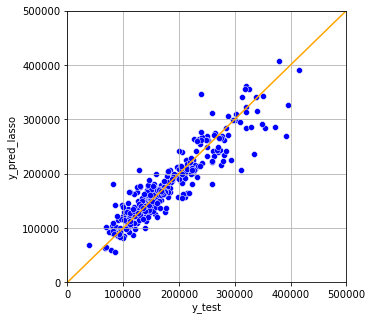

In [128]:
plt.figure(figsize=(5, 5))
sns.scatterplot(y_test[:, 0], y_pred, color = 'blue');
plt.plot([0, 500000], [0, 500000], color = 'orange')
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso')
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.grid()

In [122]:
score['catboost'] = RMSE
print (score)

{'logistic': 40095.21090053441, 'ridge': 31505.13332118197, 'lasso': 31446.069890731153, 'svr': 31624.737988212302, 'random_forest': 28565.789527697874, 'xgboost': 30281.47478869195, 'xgboost_dmatrix': 32341.399814392407, 'ElasticNet': 31458.44135469616, 'lightgbm': 29007.808763559166, 'catboost': 27732.309267803448}


### STEP6. Compare the models

In [131]:
df_score = pd.DataFrame(score.items())

In [132]:
df_score.columns = ['Method', 'RMSE']

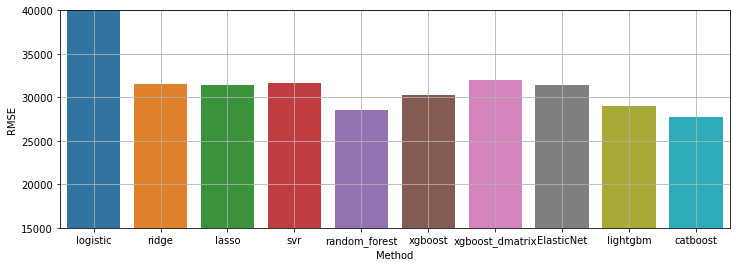

In [133]:
plt.figure(figsize=(12, 4))
sns.barplot(df_score.Method, df_score.RMSE)
plt.grid()
plt.ylim(15000, 40000)
plt.show()

The above RMSE plot shows that Ridge, Lasso, Random Forest, XGBoost_dmatrix, and ElasticNet all have similar error.

Next I am going to use Lasso and xgboost_dmatrix method to run the prediction.

In [134]:
filename = 'lasso_model.sav'
pickle.dump(lr_cv, open(filename, 'wb'))

In [135]:
filename = 'xgboost_dmatrix_model.sav'
pickle.dump(xgb_r, open(filename, 'wb'))

### Summary 

For this linear regression problem, I use several methods and compare the results. Based on the results, we can put them into 3 categories:

Good: Random Forest, lightgbm, catboost

Medium: ridge, lasso, svr, xgboost, xgboost_dmatrix, elasticnet

Poor: Logistic

The indepedent and response variables are original values, and not transformed to log format.